Noise reduced quite a bit for synthetic data compared to 2p1
The losses converges quite well compared 2p1 and 2p1 improvement(25 points)
Working on just this network now to increase variance and reduce noise
AFter creating gen data to compare scaled version you can use dummy 2 and pandas for scaled version
***removed intermediate noise at LSTM in decoder, not really needed

In [1]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [5]:
df_ano1=pd.read_csv(f'Datasets/Rapid Component degradation Vega/WornBlade001.csv')
df_ano2=pd.read_csv(f'Datasets/Rapid Component degradation Vega/WornBlade002.csv')
df_ano3=pd.read_csv(f'Datasets/Rapid Component degradation Vega/WornBlade003.csv')

NameError: name 'df_1' is not defined

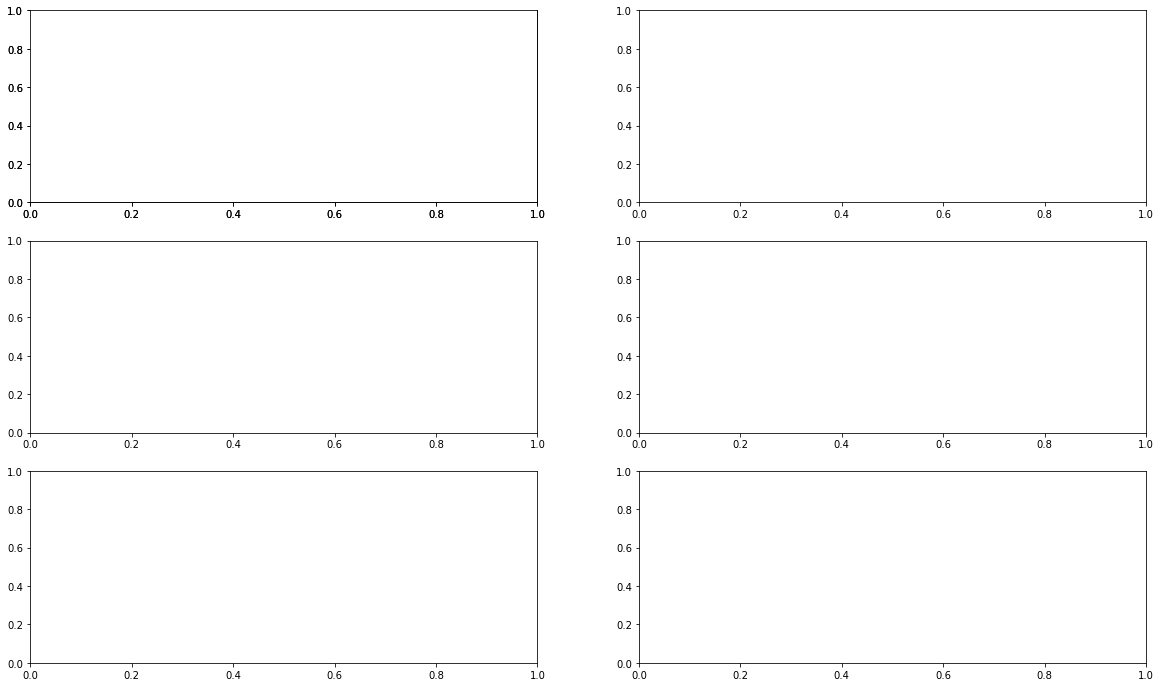

In [6]:
fig, axs=plt.subplots(3,2,figsize=(20,12))
feature_required=4

fig.add_subplot(3,2,1)
fmt='[r][-][*]'
plt.plot(df_1.iloc[:,feature_required].values,  color='green', linewidth=0.5, markersize='0.3')

fig.add_subplot(3,2,2)
plt.plot(df_2.iloc[:,feature_required].values, color='green', linewidth=0.5, markersize='0.3')

fig.add_subplot(3,2,3)
plt.plot(df_3.iloc[:,feature_required].values, color='green', linewidth=0.5, markersize='0.3')

fig.add_subplot(3,2,4)
plt.plot(df_ano1.iloc[:,feature_required].values, linewidth=0.5, markersize='0.3')

fig.add_subplot(3,2,5)
plt.plot(df_ano2.iloc[:,feature_required].values, linewidth=0.5, markersize='0.3')

fig.add_subplot(3,2,6)
plt.plot(df_ano3.iloc[:,feature_required].values, linewidth=0.5, markersize='0.3')

Writing a whole code just for df_1 as all the 3 together are not making sense from what I understand
1)Actually using just Standardization
Gotta do val 2 and 4 definitely
Just avoid doing val 1(strongest outlier),0 and 6...remaining normalize b/w (0,1) and standardize (x-mew/sigma)

In [8]:
df_1=pd.read_csv('Datasets/Rapid Component degradation Vega/NewBlade001.csv')
df_2=pd.read_csv('Datasets/Rapid Component degradation Vega/NewBlade002.csv')
df_3=pd.read_csv('Datasets/Rapid Component degradation Vega/NewBlade003.csv')
##taking 1 and 2 for training data and 3 for test data

In [19]:
df_test=df_3

# Taking relevant batch size

In [9]:
#=========Train tensor========
df_1=df_1.iloc[:,1:]
df_2=df_2.iloc[1:,1:] #to make divisible for a batch of 3
df_train=df_1.append(df_2)
print(df_train.shape)
num=np.array(df_train)
df_1_ten=torch.tensor(num, dtype=torch.float32)
print(df_1_ten, df_1_ten.shape)
#=========Test tensor=========
df_3=df_3.iloc[3:,1:]
#df_test=df_1.iloc[1500:,1:]
num=np.array(df_3)
test_ten=torch.tensor(num, dtype=torch.float32)
print(test_ten, test_ten.shape)

(4095, 7)
tensor([[-1.1213e-01, -2.4900e-03, -8.8461e+05,  ...,  1.1128e+04,
          2.5043e+00,  2.6108e-01],
        [-8.8931e-02, -3.8633e-03, -8.8461e+05,  ...,  1.1128e+04,
         -2.5043e+00,  2.6008e-01],
        [-1.1514e-01,  1.6298e-03, -8.8461e+05,  ...,  1.1128e+04,
          7.5130e+00,  2.5908e-01],
        ...,
        [-2.1498e-01, -3.7651e-03, -8.4861e+05,  ...,  2.0825e+04,
          6.7617e+01,  5.4126e-01],
        [-2.2431e-01, -3.8319e-03, -8.4861e+05,  ...,  2.0825e+04,
          6.5113e+01,  5.3676e-01],
        [-2.3109e-01, -1.1520e-03, -8.4861e+05,  ...,  2.0825e+04,
          5.7600e+01,  5.3631e-01]]) torch.Size([4095, 7])
tensor([[-4.9834e-02,  4.3764e-03, -8.4501e+05,  ...,  2.5528e+04,
          0.0000e+00, -7.9374e-02],
        [-2.3358e-02, -1.1168e-03, -8.4501e+05,  ...,  2.5528e+04,
         -7.5130e+00, -7.6369e-02],
        [-3.1485e-02, -1.1168e-03, -8.4501e+05,  ...,  2.5528e+04,
          0.0000e+00, -7.9374e-02],
        ...,
        [-3.81

In [13]:
num_df1=np.array(df_1_ten)
print(num_df1,num_df1.shape)
dummy=torch.tensor(num_df1)
print(dummy,dummy.shape,dummy.shape[0])

[[-1.1213127e-01 -2.4900441e-03 -8.8460600e+05 ...  1.1128000e+04
   2.5042892e+00  2.6108497e-01]
 [-8.8930510e-02 -3.8633349e-03 -8.8460600e+05 ...  1.1128000e+04
  -2.5042892e+00  2.6008320e-01]
 [-1.1514061e-01  1.6298291e-03 -8.8460600e+05 ...  1.1128000e+04
   7.5130162e+00  2.5908148e-01]
 ...
 [-2.1497728e-01 -3.7651060e-03 -8.4860800e+05 ...  2.0825000e+04
   6.7617218e+01  5.4126126e-01]
 [-2.2430819e-01 -3.8318629e-03 -8.4860800e+05 ...  2.0825000e+04
   6.5112854e+01  5.3675818e-01]
 [-2.3108983e-01 -1.1520390e-03 -8.4860700e+05 ...  2.0825000e+04
   5.7599842e+01  5.3630710e-01]] (4095, 7)
tensor([[-1.1213e-01, -2.4900e-03, -8.8461e+05,  ...,  1.1128e+04,
          2.5043e+00,  2.6108e-01],
        [-8.8931e-02, -3.8633e-03, -8.8461e+05,  ...,  1.1128e+04,
         -2.5043e+00,  2.6008e-01],
        [-1.1514e-01,  1.6298e-03, -8.8461e+05,  ...,  1.1128e+04,
          7.5130e+00,  2.5908e-01],
        ...,
        [-2.1498e-01, -3.7651e-03, -8.4861e+05,  ...,  2.0825e+04,
 

Min max sxalling of data------
not doing in 1)----terrible results again nonconvergence actually
StandardScaler in 2

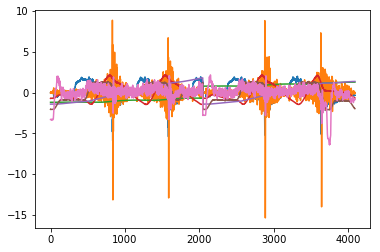

In [14]:
scalex=StandardScaler().fit(df_1_ten)
df_1_tensor=scalex.transform(df_1_ten)
df_1_tensor=torch.tensor(df_1_tensor, dtype=torch.float32)
plt.plot(df_1_tensor)

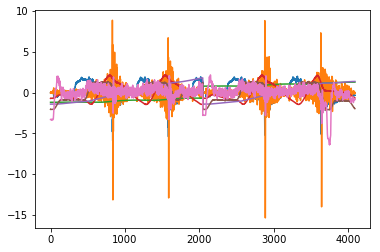

In [15]:
scale_dummy=StandardScaler().fit(dummy)
dummy=scale_dummy.transform(dummy)
dummy=torch.tensor(dummy, dtype=torch.float32)
plt.plot(dummy)

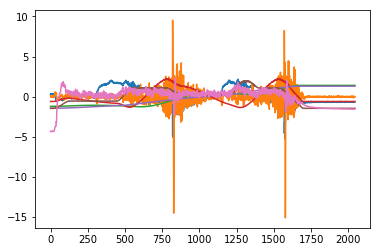

In [16]:
#2048 test points
scalex_test=StandardScaler().fit(test_ten)
test_tensor=scalex_test.transform(test_ten)
test_tensor=torch.tensor(test_tensor, dtype=torch.float32)
plt.plot(test_tensor)

Code to normalize selected features, train_tensor
will use the scalex_objs list to inverse transform the synthetic data

Normalizing test tensor

Creating objects for normalizing individual features

In [17]:
train_rows=df_1_tensor.shape[0]
features=df_1_tensor.shape[1]
test_rows=test_tensor.shape[0]
test_columns=test_tensor.shape[1]
print(train_rows,features,test_rows,test_columns)

4095 7 2045 7


In [377]:
print(4095//5,2045//5)

819.2 409


Reshaping for LSTM-----whole data 

Dummy 1 for neural network, dummy 2 to compare to synthetic data
both are same but dummy will change because of Gradient descent

In [317]:
###after seeting network here

[[-0.01204835 -0.06166188 -1.1908271  ... -1.4158878  -2.05986
  -3.3028686 ]
 [ 0.05071922 -0.09683751 -1.1908271  ... -1.4158878  -2.0679486
  -3.3117447 ]
 [-0.02018986  0.04386504 -1.1908271  ... -1.4158878  -2.0517712
  -3.3206205 ]
 ...
 [-0.29028904 -0.09432147  1.2798761  ...  1.3635595  -1.9547051
  -0.8203743 ]
 [-0.31553298 -0.09603138  1.2798761  ...  1.3635595  -1.9587495
  -0.86027366]
 [-0.3338801  -0.02739006  1.2799447  ...  1.3635595  -1.9708828
  -0.8642705 ]] (4095, 7)
tensor([[-0.0120, -0.0617, -1.1908,  ..., -1.4159, -2.0599, -3.3029],
        [ 0.0507, -0.0968, -1.1908,  ..., -1.4159, -2.0679, -3.3117],
        [-0.0202,  0.0439, -1.1908,  ..., -1.4159, -2.0518, -3.3206],
        ...,
        [-0.2903, -0.0943,  1.2799,  ...,  1.3636, -1.9547, -0.8204],
        [-0.3155, -0.0960,  1.2799,  ...,  1.3636, -1.9587, -0.8603],
        [-0.3339, -0.0274,  1.2799,  ...,  1.3636, -1.9709, -0.8643]]) torch.Size([4095, 7])


In [18]:
print(dummy.shape)
print(df_1_tensor.shape)
print(test_tensor.shape)

torch.Size([4095, 7])
torch.Size([4095, 7])
torch.Size([2045, 7])


In [19]:
#replacing parameter bs by two different parameters 5 i_p and  bs=25(ie 20 noise pts)
#iterating over 4095
#Nested for loop for batch of 25
flag=0
bs=25
noise=1 #wont be used ich denke
for i in range(0, dummy.shape[0]):
    #print(i)
    if(flag<10):
#        print(flag)
        print("no_noise")
#        dummy[i,:]=dummy[i,:]# actually makes no sense I guess
        flag+=1
    elif(flag<25):
        print(flag)
        flag+=1
        print("noise")
        dummy[i,:]=torch.randn([1,features])
    elif(flag==25):
        flag=0
        print(flag)

no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
10
noise
11
noise
12
noise
13
noise
14
noise
15
noise
16
noise
17
noise
18
noise
19
noise
20
noise
21
noise
22
noise
23
noise
24
noise
0
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
10
noise
11
noise
12
noise
13
noise
14
noise
15
noise
16
noise
17
noise
18
noise
19
noise
20
noise
21
noise
22
noise
23
noise
24
noise
0
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
10
noise
11
noise
12
noise
13
noise
14
noise
15
noise
16
noise
17
noise
18
noise
19
noise
20
noise
21
noise
22
noise
23
noise
24
noise
0
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
10
noise
11
noise
12
noise
13
noise
14
noise
15
noise
16
noise
17
noise
18
noise
19
noise
20
noise
21
noise
22
noise
23
noise
24
noise
0
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
10

23
noise
24
noise
0
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
10
noise
11
noise
12
noise
13
noise
14
noise
15
noise
16
noise
17
noise
18
noise
19
noise
20
noise
21
noise
22
noise
23
noise
24
noise
0
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
10
noise
11
noise
12
noise
13
noise
14
noise
15
noise
16
noise
17
noise
18
noise
19
noise
20
noise
21
noise
22
noise
23
noise
24
noise
0
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
10
noise
11
noise
12
noise
13
noise
14
noise
15
noise
16
noise
17
noise
18
noise
19
noise
20
noise
21
noise
22
noise
23
noise
24
noise
0
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
10
noise
11
noise
12
noise
13
noise
14
noise
15
noise
16
noise
17
noise
18
noise
19
noise
20
noise
21
noise
22
noise
23
noise
24
noise
0
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise


22
noise
23
noise
24
noise
0
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
10
noise
11
noise
12
noise
13
noise
14
noise
15
noise
16
noise
17
noise
18
noise
19
noise
20
noise
21
noise
22
noise
23
noise
24
noise
0
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
10
noise
11
noise
12
noise
13
noise
14
noise
15
noise
16
noise
17
noise
18
noise
19
noise
20
noise
21
noise
22
noise
23
noise
24
noise
0
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
10
noise
11
noise
12
noise
13
noise
14
noise
15
noise
16
noise
17
noise
18
noise
19
noise
20
noise
21
noise
22
noise
23
noise
24
noise
0
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
10
noise
11
noise
12
noise
13
noise
14
noise
15
noise
16
noise
17
noise
18
noise
19
noise
20
noise
21
noise
22
noise
23
noise
24
noise
0
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise


23
noise
24
noise
0
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
10
noise
11
noise
12
noise
13
noise
14
noise
15
noise
16
noise
17
noise
18
noise
19
noise
20
noise
21
noise
22
noise
23
noise
24
noise
0
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
10
noise
11
noise
12
noise
13
noise
14
noise
15
noise
16
noise
17
noise
18
noise
19
noise
20
noise
21
noise
22
noise
23
noise
24
noise
0
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
10
noise
11
noise
12
noise
13
noise
14
noise
15
noise
16
noise
17
noise
18
noise
19
noise
20
noise
21
noise
22
noise
23
noise
24
noise
0
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
10
noise
11
noise
12
noise
13
noise
14
noise
15
noise
16
noise
17
noise
18
noise
19
noise
20
noise
21
noise
22
noise
23
noise
24
noise
0
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise


In [16]:
#insert noise
#iterating over 4095
bs=5
for i in range(0, dummy.shape[0]):
    if(i%bs==0):
        print("no_noise")
        dummy[i,:]=dummy[i,:] #actually realizing later this makes no sense
    else:
        print("noise")
        dummy[i,:]=torch.randn([1,features])

no_noise
noise
noise
noise
noise
no_noise
noise
noise
noise
noise
no_noise
noise
noise
noise
noise
no_noise
noise
noise
noise
noise
no_noise
noise
noise
noise
noise
no_noise
noise
noise
noise
noise
no_noise
noise
noise
noise
noise
no_noise
noise
noise
noise
noise
no_noise
noise
noise
noise
noise
no_noise
noise
noise
noise
noise
no_noise
noise
noise
noise
noise
no_noise
noise
noise
noise
noise
no_noise
noise
noise
noise
noise
no_noise
noise
noise
noise
noise
no_noise
noise
noise
noise
noise
no_noise
noise
noise
noise
noise
no_noise
noise
noise
noise
noise
no_noise
noise
noise
noise
noise
no_noise
noise
noise
noise
noise
no_noise
noise
noise
noise
noise
no_noise
noise
noise
noise
noise
no_noise
noise
noise
noise
noise
no_noise
noise
noise
noise
noise
no_noise
noise
noise
noise
noise
no_noise
noise
noise
noise
noise
no_noise
noise
noise
noise
noise
no_noise
noise
noise
noise
noise
no_noise
noise
noise
noise
noise
no_noise
noise
noise
noise
noise
no_noise
noise
noise
noise
noise
no_noise
n

noise
no_noise
noise
noise
noise
noise
no_noise
noise
noise
noise
noise
no_noise
noise
noise
noise
noise
no_noise
noise
noise
noise
noise
no_noise
noise
noise
noise
noise
no_noise
noise
noise
noise
noise
no_noise
noise
noise
noise
noise
no_noise
noise
noise
noise
noise
no_noise
noise
noise
noise
noise
no_noise
noise
noise
noise
noise
no_noise
noise
noise
noise
noise
no_noise
noise
noise
noise
noise
no_noise
noise
noise
noise
noise
no_noise
noise
noise
noise
noise
no_noise
noise
noise
noise
noise
no_noise
noise
noise
noise
noise
no_noise
noise
noise
noise
noise
no_noise
noise
noise
noise
noise
no_noise
noise
noise
noise
noise
no_noise
noise
noise
noise
noise
no_noise
noise
noise
noise
noise
no_noise
noise
noise
noise
noise
no_noise
noise
noise
noise
noise
no_noise
noise
noise
noise
noise
no_noise
noise
noise
noise
noise
no_noise
noise
noise
noise
noise
no_noise
noise
noise
noise
noise
no_noise
noise
noise
noise
noise
no_noise
noise
noise
noise
noise
no_noise
noise
noise
noise
noise
no_n

noise
no_noise
noise
noise
noise
noise
no_noise
noise
noise
noise
noise
no_noise
noise
noise
noise
noise
no_noise
noise
noise
noise
noise
no_noise
noise
noise
noise
noise
no_noise
noise
noise
noise
noise
no_noise
noise
noise
noise
noise
no_noise
noise
noise
noise
noise
no_noise
noise
noise
noise
noise
no_noise
noise
noise
noise
noise
no_noise
noise
noise
noise
noise
no_noise
noise
noise
noise
noise
no_noise
noise
noise
noise
noise
no_noise
noise
noise
noise
noise
no_noise
noise
noise
noise
noise
no_noise
noise
noise
noise
noise
no_noise
noise
noise
noise
noise
no_noise
noise
noise
noise
noise
no_noise
noise
noise
noise
noise
no_noise
noise
noise
noise
noise
no_noise
noise
noise
noise
noise
no_noise
noise
noise
noise
noise
no_noise
noise
noise
noise
noise
no_noise
noise
noise
noise
noise
no_noise
noise
noise
noise
noise
no_noise
noise
noise
noise
noise
no_noise
noise
noise
noise
noise
no_noise
noise
noise
noise
noise
no_noise
noise
noise
noise
noise
no_noise
noise
noise
noise
noise
no_n

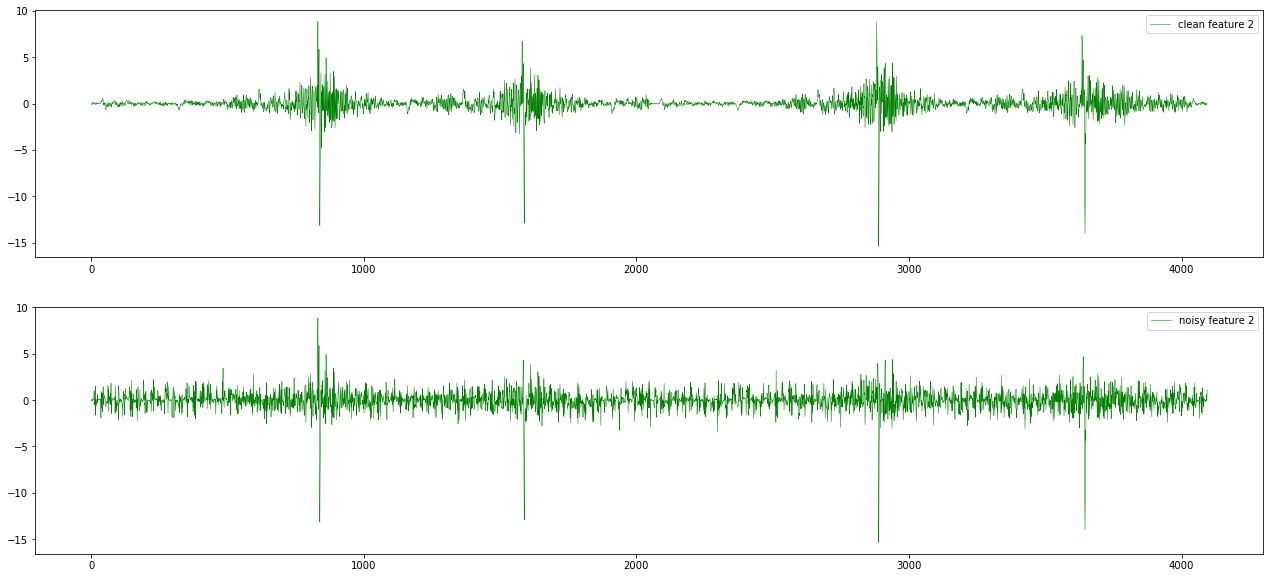

In [20]:
i=1
plt.figure(figsize=(22,10))
plt.subplot(2,1,1)
plt.plot(df_1_tensor[:,i],  color='green', linewidth=0.5, markersize='0.3',label=f'clean feature {i+1}')
plt.legend()

plt.subplot(2,1,2)
plt.plot(dummy[:,i],  color='green', linewidth=0.5, markersize='0.3',label=f'noisy feature {i+1}')
plt.legend()

In [1]:
feature_required=6
plt.figure(figsize=(20,6))
plt.subplot(2,1,1)
fmt='[r][-][*]'
plt.plot(df_1_tensor[:,feature_required],  color='green', linewidth=0.5, markersize='0.3',label='clean')
plt.xlabel('clean')

plt.subplot(2,1,1)
fmt='[r][-][*]'
plt.plot(dummy[:,feature_required],  color='green', linewidth=0.5, markersize='0.3')
plt.xlabel('noisy')

NameError: name 'plt' is not defined

In [99]:
Wont use most probably
df_1_tensor=df_1_tensor.reshape((1,train_rows,features))
test_tensor=test_tensor.reshape((1,test_rows,test_columns))
print(df_1_tensor.shape,test_tensor.shape)

torch.Size([1, 4095, 7]) torch.Size([1, 2045, 7])


If you change the values of df_1_tensor, dummy changes too

In [27]:
print(df_1_tensor.shape)
plt.plot(dummy[:,0,5])

torch.Size([4095, 7])


IndexError: too many indices for tensor of dimension 2

Reshaping for LSTM ---- batches data...Manually making batches of 3 for req 2) later automate for no. of batches

# Batch_size

In [24]:
# This is the batch sizeeee
bs=5

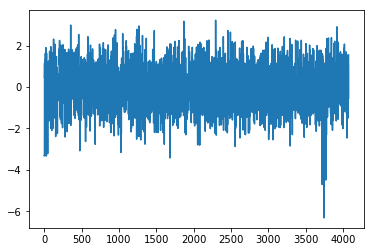

In [95]:
plt.plot(dummy[0,:,6])

In [442]:
df_1=pd.read_csv('Datasets/Rapid Component degradation Vega/NewBlade001.csv')
df_2=pd.read_csv('Datasets/Rapid Component degradation Vega/NewBlade002.csv')
df_3=pd.read_csv('Datasets/Rapid Component degradation Vega/NewBlade003.csv')
##taking 1 and 2 for training data and 3 for test data


Making the tensor as required....Every third, then 5th data point taken with noise elsewhere

In [105]:
df_old=df_1_tensor.detach()

torch.Size([1, 4096, 7])


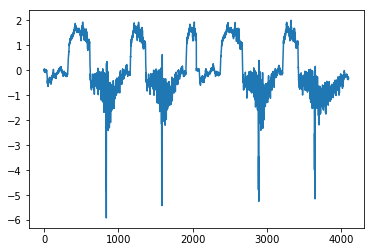

In [108]:
print(df_old.shape)
plt.plot(df_old[0,:,0])

In [23]:
print(df_1_tensor.shape)

torch.Size([4095, 7])


torch.Size([819, 5, 7])


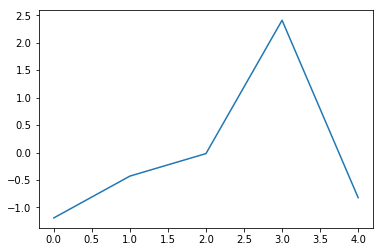

In [656]:
print(df_1_tensor.shape)
plt.plot(df_1_tensor[1,:,2])
#correct

torch.Size([682, 3, 7])


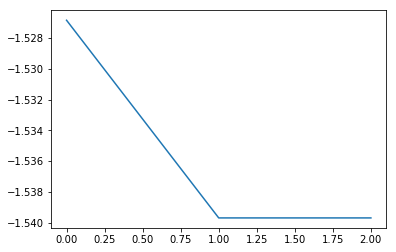

In [258]:
print(test_tensor.shape)
plt.plot(test_tensor[680,:,6])

# Constructing training process(batches) Automates size

In [204]:
for i in range(1,train_rows+1):
    if(i%bs==0):
        new_len=i
print(new_len)
print(train_rows//bs)

4075
163


In [205]:
dummy=dummy[:new_len,:]
df_1_tensor=df_1_tensor[:new_len,:]
print(dummy.shape,df_1_tensor.shape)

torch.Size([4075, 7]) torch.Size([4075, 7])


In [206]:
for i in range(1,test_rows+1):
    if(i%bs==0):
        new_len=i
print(new_len)

2025


In [207]:
test_tensor=test_tensor[:new_len,:]
print(test_tensor.shape)

torch.Size([2025, 7])


In [231]:
df_1_tensor=df_1_tensor.reshape((train_rows//bs,bs,features))
test_tensor=test_tensor.reshape((test_rows//bs,bs,features))
print(df_1_tensor.shape,test_tensor.shape)
dummy=dummy.reshape((train_rows//bs,bs,features))
print(dummy.shape)

torch.Size([163, 25, 7]) torch.Size([81, 25, 7])
torch.Size([163, 25, 7])


In [232]:
print(df_1_tensor.shape)

torch.Size([163, 25, 7])


# Neural Network

In [360]:
##making an LSTM to understand
##Made the whole thing, atleast I can say that I embedded an LSTM into the network somehow with a linear layer using dictionaries
class Test(nn.Module): ## var=LSTM_size, bottleneck_nodes=bot_nodes
    def __init__(self,n_features, lstm, bottleneck_nodes,noise):
        super().__init__()
        
        self.x1_cap=torch.zeros((1,bs,n_features))# ------Hardcoded bs should be entered actually
        self.n_features, self.lstm, self.noise=n_features,lstm,noise
        self.bot_nodes=bottleneck_nodes
        ##took me a full evenings and frustration, LSTM always takes 3 dimesions, let the first one be 1
        self.encoder=nn.ModuleDict({
            'Lstm1':nn.LSTM(
                input_size=self.n_features,
                hidden_size=self.lstm*3,
            ),
            'Lstm2':nn.LSTM(
                input_size=self.lstm*3,
                hidden_size=self.lstm*2,
            ),
            'Lstm3':nn.LSTM(
                input_size=self.lstm*2,
                hidden_size=self.lstm,
            ),

            'Linear':nn.Linear(self.lstm, self.bot_nodes*2),# Can vary the bottle neck
        })
        
        self.decoder=nn.ModuleDict({
            'Lstm4':nn.LSTM(
                input_size=self.bot_nodes,#+self.noise, redundant from last meet
                hidden_size=self.lstm*3
            ),
            'Lstm5':nn.LSTM(
                input_size=self.lstm*3,
                hidden_size=self.lstm*2
            ),
            'Lstm6':nn.LSTM(
                input_size=self.lstm*2,
                hidden_size=self.lstm
            ),
            'Linear':nn.Linear(self.lstm+self.n_features,self.n_features*2),
        })
    def getsample(self, mu, logvar):
        if self.training: #inbuilt object which according to me is inherited from nn.Module, comes when model.train() used
            stan_dev=logvar.mul(0.5).exp_()
            eps = stan_dev.data.new(stan_dev.size()).normal_()#acually epsilon is from normal dis table, sample is the whole Mew+X*sigma
            return eps.mul(stan_dev).add_(mu)#Mew+X*sigma
        else:
            return mu
    
    def forward(self,x):
        length=x.shape[0]#to get seq_len
        x=x.reshape((1, length, self.n_features))# batch sends the whole things, not using SGD,
        x,_=self.encoder['Lstm1'](x)
        x,_=self.encoder['Lstm2'](x)
        x,_=self.encoder['Lstm3'](x)
        mu_logvar=self.encoder['Linear'](x)
        #a leap of faith, for knowing how mu is [:0:] and logvar[:1:], actually just a bunch of the outputs 
        #taken as mean and variance
        mu1=mu_logvar[:, :, 0:self.bot_nodes]# dimension at mu_logvar1/bottleneck               
        logvar1 = mu_logvar[:,:, self.bot_nodes:self.bot_nodes*2]
        z=self.getsample(mu1,logvar1)#need to feed this to the decoder, not used actually---not needed this z
        #reshape it into (hidden_dim x features)
#        z=z.reshape((1, length, self.n_features)) #dont need the reshape anymore
#        z=z+torch.randn([1,2,7]) #added some noise in decoder to try and train with some noise----will make z=randn
#        n=torch.randn([1,length,self.noise])
#        d=torch.cat((z,n),2)
        d,_=self.decoder['Lstm4'](z)
        d,_=self.decoder['Lstm5'](d)
        d,_=self.decoder['Lstm6'](d)
        #and then added x1cap to it and see what happens---shouldnt literally plus add columns
        d=torch.cat((d,self.x1_cap),2) #2 because basically adding columns so in the last dimension,ie making 7 to (7 + bot_nodes)
#       #z=z.reshape((1, self,self.var*2))
#         m = nn.Dropout(p=0.2)
#         d=m(d)
#        d=d.reshape([-1])
        d=self.decoder['Linear'](d)
    #Still need to know the perfect reason why these are means and logvariances
        mu2=d[:,:,0:self.n_features]
        logvar2=d[:,:,self.n_features:self.n_features*2]
        self.x1_cap=self.getsample(mu2.detach(),logvar2.detach())
        #print("x1_cap",self.x1_cap.shape)
        return mu2,logvar2,mu1,logvar1

In [210]:
class Encoder(nn.Module):
    def __init__(self,n_features, lstm, bottleneck_nodes): # noise mostly obsolete
        super(Encoder, self).__init__()
        self.n_features, self.lstm=n_features,lstm
        self.bot_nodes=bottleneck_nodes
        
        self.layer1=nn.Sequential(
            nn.LSTM(n_features,lstm*3),
        )
        self.layer2=nn.Sequential(
            nn.LSTM(lstm*3,lstm*2),
        )
        self.layer3=nn.Sequential(
            nn.LSTM(lstm*2,lstm),
        )
        
        self.layer4 = nn.Sequential(
            nn.Linear(lstm,bottleneck_nodes*2),
            #nn.Sigmoid() #for BCE
        )
    def getsample(self, mu, logvar):
        if self.training: #inbuilt object which according to me is inherited from nn.Module, comes when model.train() used
            stan_dev=logvar.mul(0.5).exp_()
            eps = stan_dev.data.new(stan_dev.size()).normal_()#acually epsilon is from normal dis table, sample is the whole Mew+X*sigma
            return eps.mul(stan_dev).add_(mu)#Mew+X*sigma
        else:
            return mu
        
    def forward(self,x):
        length=x.shape[0]#to get seq_len
        x=x.reshape((1, length, self.n_features))# batch sends the whole things, not using SGD,
        x,_=self.layer1(x)
        x,_=self.layer2(x)
        x,_=self.layer3(x)
        m = nn.Dropout(p=0.2)
        d=m(x)
        mu_logvar=self.layer4(d)
        #a leap of faith, for knowing how mu is [:0:] and logvar[:1:], actually just a bunch of the outputs 
        #taken as mean and variance
        mu1=mu_logvar[:, :, 0:self.bot_nodes]# dimension at mu_logvar1/bottleneck               
        logvar1 = mu_logvar[:,:, self.bot_nodes:self.bot_nodes*2]
        z=self.getsample(mu1,logvar1)
        return mu1,logvar1, z
#encoder = Encoder(features, lstm_size, bot_nodes)

In [25]:
bot_nodes=80
lstm_size=50 # two major hyperparamertes

In [76]:
torch.zeros((1,bs,features)).shape

torch.Size([1, 5, 7])

In [211]:
class Decoder(nn.Module):
    def __init__(self,n_features, lstm, bottleneck_nodes):
        super(Decoder, self).__init__()
        self.n_features, self.lstm=n_features,lstm
        self.bot_nodes=bottleneck_nodes
        self.x1_cap=torch.zeros((1,bs,n_features))
        
        self.layer1=nn.Sequential(
                nn.LSTM(bottleneck_nodes,lstm*3),
            )
        self.layer2=nn.Sequential(
                nn.LSTM(lstm*3,lstm*2),
            )
        self.layer3=nn.Sequential(
                nn.LSTM(lstm*2,lstm),
            )
        self.layer4 = nn.Sequential(
                nn.Linear(lstm,n_features*2)
                #nn.Linear(lstm+features,n_features*2),
                #nn.Sigmoid() #for BCE
            )
    def getsample(self, mu, logvar):
        if self.training: #inbuilt object which according to me is inherited from nn.Module, comes when model.train() used
            stan_dev=logvar.mul(0.5).exp_() 
            eps = stan_dev.data.new(stan_dev.size()).normal_()#acually epsilon is from normal dis table, sample is the whole Mew+X*sigma
            return eps.mul(stan_dev).add_(mu)#Mew+X*sigma
        else:
            return mu
    ##start changing this
    def forward(self,z):
        d,_=self.layer1(z)
        d,_=self.layer2(d)
        d,_=self.layer3(d)
        #and then added x1cap to it and see what happens---shouldnt literally plus add columns
#        d=torch.cat((d,self.x1_cap),2) #2 because basically adding columns so in the last dimension,ie making 7 to (7 + bot_nodes)
#       #z=z.reshape((1, self,self.var*2))
#         m = nn.Dropout(p=0.2)
#         d=m(d)
#        d=d.reshape([-1])
        d=self.layer4(d)
        #Still need to know the perfect reason why these are means and logvariances
        mu2=d[:,:,0:self.n_features]
        logvar2=d[:,:,self.n_features:self.n_features*2]
#        self.x1_cap=self.getsample(mu2.detach(),logvar2.detach())
        #print("x1_cap",self.x1_cap.shape)
        return mu2,logvar2
#decoder = Decoder(features, lstm_size, bot_nodes)

In [285]:
df_1_tensor=df_1_tensor.reshape((train_rows//bs,bs,features))

In [286]:
# delete soon
print(df_1_tensor.shape)
print(test_tensor.shape)
print(dummy.shape)

torch.Size([163, 25, 7])
torch.Size([81, 25, 7])
torch.Size([163, 25, 7])


# Training new model

In [142]:
class join_enc_dec(nn.Module):
    def __init__(self, features, lstm_size, bot_nodes):
        super(join_enc_dec, self).__init__()
        
        self.encoder = Encoder(features, lstm_size, bot_nodes)
        self.decoder = Decoder(features, lstm_size, bot_nodes)
        
    def forward(self,x):
        mu1,logvar1,z=self.encoder(x)
        mu2,logvar2=self.decoder(z)
        
        return mu2,logvar2,mu1,logvar1
        
    def gen_syn_data(self,z):
        mu2,logvar2=self.decoder(z)
        d=self.decoder.getsample(mu2,logvar2)        
            
        return d

In [270]:
model.encoder.state_dict()["layer1.0.weight_ih_l0"][:] = torch.zeros([600,7])
model.encoder.state_dict()["layer1.0.weight_hh_l0"][:] = torch.zeros([600,150])
model.encoder.state_dict()["layer2.0.weight_ih_l0"][:] = torch.zeros([400,150])
model.encoder.state_dict()["layer2.0.weight_hh_l0"][:] = torch.zeros([400,100])
model.encoder.state_dict()["layer3.0.weight_ih_l0"][:] = torch.zeros([200,100])
model.encoder.state_dict()["layer3.0.weight_hh_l0"][:] = torch.zeros([200,50])

In [292]:
model.parametersj

<bound method Module.parameters of join_enc_dec(
  (encoder): Encoder(
    (layer1): Sequential(
      (0): LSTM(7, 150)
    )
    (layer2): Sequential(
      (0): LSTM(150, 100)
    )
    (layer3): Sequential(
      (0): LSTM(100, 50)
    )
    (layer4): Sequential(
      (0): Linear(in_features=50, out_features=160, bias=True)
    )
  )
  (decoder): Decoder(
    (layer1): Sequential(
      (0): LSTM(80, 150)
    )
    (layer2): Sequential(
      (0): LSTM(150, 100)
    )
    (layer3): Sequential(
      (0): LSTM(100, 50)
    )
    (layer4): Sequential(
      (0): Linear(in_features=50, out_features=14, bias=True)
    )
  )
)>

In [288]:
model.encoder.state_dict()

OrderedDict([('layer1.0.weight_ih_l0',
              tensor([[ 0.0694, -0.0502,  0.0666,  ...,  0.0652, -0.0120,  0.0446],
                      [-0.0255, -0.0383, -0.0468,  ..., -0.0415, -0.0538, -0.0163],
                      [ 0.0154, -0.0273, -0.0742,  ...,  0.0496,  0.0596,  0.0771],
                      ...,
                      [ 0.0646,  0.0178, -0.0540,  ..., -0.0529,  0.0505,  0.0076],
                      [ 0.0328, -0.0414,  0.0748,  ...,  0.0077,  0.0213,  0.0815],
                      [-0.0485, -0.0439, -0.0732,  ...,  0.0037,  0.0494,  0.0813]])),
             ('layer1.0.weight_hh_l0',
              tensor([[-0.0650, -0.0109,  0.0748,  ...,  0.0776,  0.0800, -0.0140],
                      [-0.0744, -0.0098, -0.0185,  ..., -0.0488, -0.0677,  0.0199],
                      [ 0.0189, -0.0280,  0.0493,  ..., -0.0380, -0.0571,  0.0159],
                      ...,
                      [ 0.0776,  0.0690, -0.0215,  ...,  0.0432, -0.0601, -0.0790],
                      [ 0

In [266]:
k=model.encoder.state_dict()
k=k.get("layer3.0.weight_ih_l0")
print(k.shape)

torch.Size([200, 100])


In [ ]:
Not using
def joiner(x):
    mu1,logvar1,z=encoder(x)
    mu2,logvar2=decoder(z)
        
    return mu2,logvar2,mu1,logvar1

In [290]:
print(df_1_tensor.shape,dummy.shape,test_tensor.shape)

torch.Size([163, 25, 7]) torch.Size([163, 25, 7]) torch.Size([81, 25, 7])


In [812]:
df_1_tensor=df_1_tensor.reshape(1,4095,7)
dummy=dummy.reshape(1,4095,7)
test_tensor=test_tensor.reshape(1,2045,7)

In [30]:
#changed the next two from 50, 30 to 80,50

Will enter encoder and decoeder in join and make object of that and send that object and that optimizer in the train
method instead, wont need to send two object optimizer that way and now instead of writing the initialization below
the classes I write em in the join function and values will be sent when we initialize join(seq_len, etc etc)

Have to ask the professor about if E,D and Disc work in parallel or first  E,D and then Disc


NameError: name 'model' is not defined

In [95]:
 for i in range(0,train_rows//bs):
        mu2,logvar2,mu1,logvar1=model(dummy[i,:,:])  
#             optimizer.zero_grad()
#             #============forward=========
#             mu2,logvar2,mu1,logvar1,z=model(dummy[i,:,:])

In [97]:
for x in test_tensor:
        mu2,logvar2,mu1,logvar1=model(x) 

In [287]:
#join_enc_dec()
bot_nodes=80
lstm_size=50
model=join_enc_dec(features, lstm_size, bot_nodes)

In [293]:
epochs=20
learn_rate=1e-3
optimizer=torch.optim.Adam(
     model.parameters(), lr=learn_rate
)
train_VAE(epochs,optimizer,model,df_1_tensor,test_tensor)

train loss in epoch 0 1.419933581788898
test loss in epoch 0 3.300208628177643
train loss in epoch 1 1.4293775910131805
test loss in epoch 1 3.7431046962738037
train loss in epoch 2 1.427020309317825
test loss in epoch 2 3.7595196962356567
train loss in epoch 3 1.4236862634418939
test loss in epoch 3 3.77053040266037
train loss in epoch 4 1.421296173486954
test loss in epoch 4 3.7761479020118713
train loss in epoch 5 1.4093876467228519
test loss in epoch 5 3.775679290294647
train loss in epoch 6 1.3946383889632639
test loss in epoch 6 3.7388437390327454
train loss in epoch 7 1.392127899896531
test loss in epoch 7 3.7623801231384277
train loss in epoch 8 1.3838658021919894
test loss in epoch 8 3.66581654548645
train loss in epoch 9 1.3776635469243348
test loss in epoch 9 3.6726279258728027
train loss in epoch 10 1.3782244206057073
test loss in epoch 10 3.801217496395111
train loss in epoch 11 1.3714515169024903
test loss in epoch 11 3.166073441505432
train loss in epoch 12 1.36648125328

In [148]:
train_losses=[]
test_losses=[]
def train_VAE(epochs,optimizer,model,train_data,test_data):
    for epoch in range(0,epochs+1):
    #training
        model.train()
#         encoder.train()
#         decoder.train()
        train_loss=0
    ##x happens only once since that is how the data has been split, no batch SGD is used
    #    for x in df_1_tensor:
        for i in range(0,train_rows//bs):
            optimizer.zero_grad()
            #============forward=========
            mu2,logvar2,mu1,logvar1=model(dummy[i,:,:])
#             mu2,logvar2,mu1,logvar1=joiner(dummy[i,:,:]) #noisy data fed here
            #print(mu2.shape,logvar2.shape,mu1.shape,logvar1.shape,x.shape)
            loss=loss_function_comb(mu2,logvar2,mu1,logvar1,df_1_tensor[i,:,:]) #loss function is wrt to actual data
            train_loss+=loss.item()
            #=====backpropagation=======
            #print(train_loss)
            loss.backward()
            optimizer.step()
        train_losses.append(train_loss)    
        print("train loss in epoch",epoch,train_loss/train_rows)
        with torch.no_grad():
            model.eval()
#             encoder.eval()
#             decoder.eval()#switch to let the network know, to prevent gradient evaluation during testing alongwith torch.no_grad()
            test_loss=0
            MSE=0
            L1=0
            for x in test_tensor:
                seq_len=x.shape[0]
                points=x.shape[1]
                #==============forward=========
                mu2,logvar2,mu1,logvar1=model(x)
#                 mu2,logvar2,mu1,logvar1 = joiner(x)
                test_loss= loss_function(mu2,logvar2,mu1,logvar1,x).item()    ##same as training
                mu2=mu2.reshape([bs,features])
                L1=nn.L1Loss()
                L1=L1(x,mu2)
                MSE=nn.MSELoss()
                MSE=MSE(x,mu2)
                test_loss+=L1.item()+MSE.item()
            test_losses.append(test_loss)    
            print("test loss in epoch",epoch,test_loss)

In [294]:
noise_len=163
feed_noise=torch.randn(noise_len,bs,bot_nodes)
with torch.no_grad():
    model.eval()
    d=model.gen_syn_data(feed_noise)
#     def gen_syn_data():
#         with torch.no_grad():
#             model.eval()
#             z=feed_noise # finally parameterized
#             z,_=decoder.layer1(z)
#             d,_=decoder.layer2(z)
#             d,_=decoder.layer3(d)
#         #    d=nn.functional.sigmoid(d)
#             x1_cap=torch.zeros((1000,bs,features))
#             #x1_cap=torch.randn((1000,5,features))
#             d=torch.cat((d,x1_cap),2) 
#             d=decoder.layer4(d)
#         #    d=nn.Sigmoid(d)
#             mu2=d[:,:,0:features]
#             logvar2=d[:,:,features:features*2]
#             d=decoder.getsample(mu2,logvar2)
#             return d
#     d=gen_syn_data()

In [295]:
d=d.reshape(noise_len*bs,features)
df_1_tensor=df_1_tensor.reshape(noise_len*bs,features)

In [296]:
print(d.shape,df_1_tensor.shape)

torch.Size([4075, 7]) torch.Size([4075, 7])


In [297]:
p=torch.tensor(scalex.inverse_transform(d))
print(p.shape)

torch.Size([4075, 7])


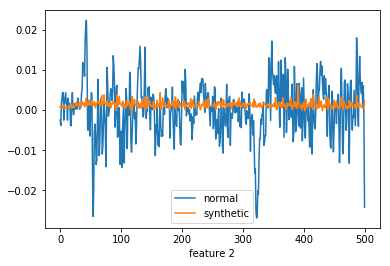

In [315]:
#AS seen the ssynthetic data is trying to take the shape of of the input.
i=1
# plt.figure(figsize=(22,15))
# plt.subplot(2,2,1)
plt.plot(df_1_ten[:500,i], label="normal")
plt.legend()
# plt.subplot(2,2,2)
plt.plot(p[:500,i],label="synthetic")
plt.xlabel(f'feature {i+1}')
plt.legend()

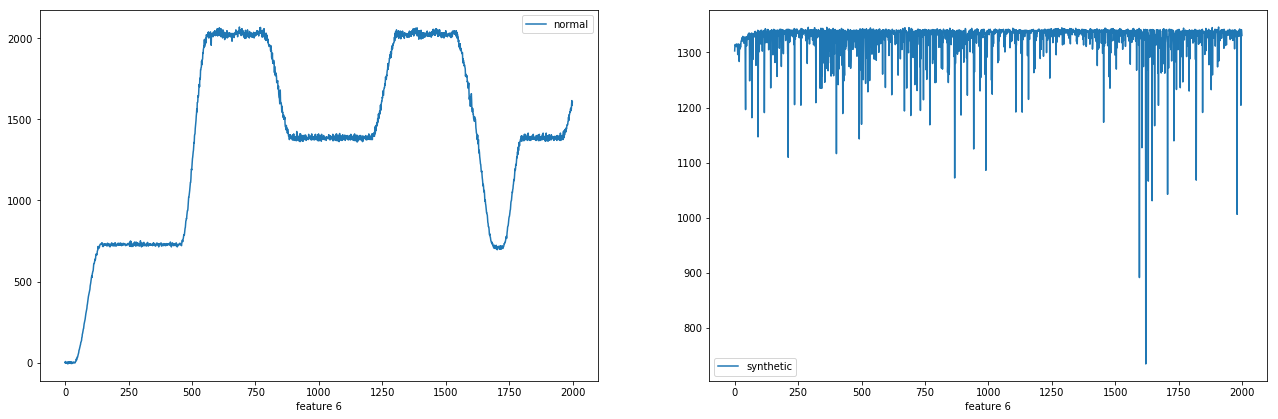

In [308]:
i=5
plt.figure(figsize=(22,15))
plt.subplot(2,2,1)
plt.plot(df_1_ten[:2000,i], label="normal")
plt.xlabel(f'feature {i+1}')
plt.legend()
plt.subplot(2,2,2)
plt.plot(p[:2000,i],label="synthetic")
plt.xlabel(f'feature {i+1}')
plt.legend()

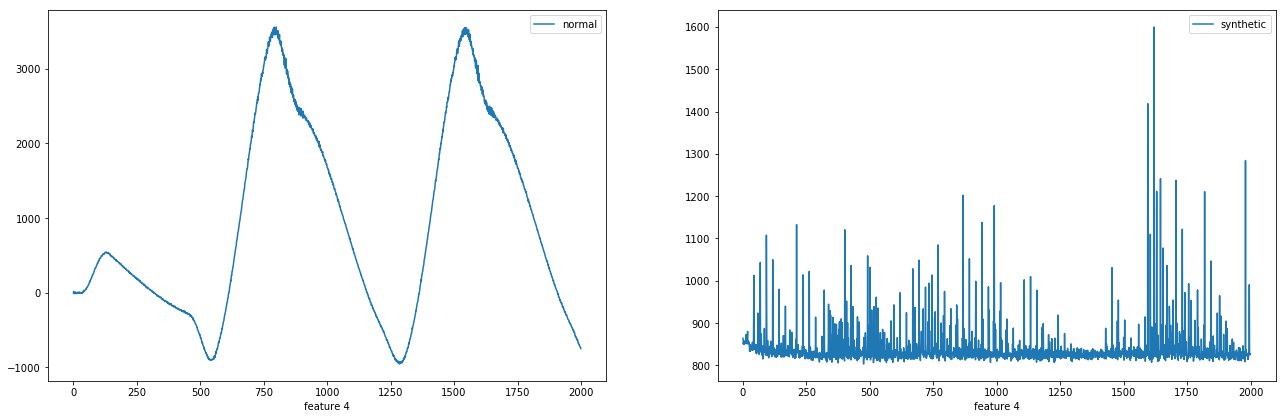

In [309]:
#Another instance of data trying to take the shape of input however there is extreme parity in the range of values
#covered by the synthetic data in contrast to the input data
i=3
plt.figure(figsize=(22,15))
plt.subplot(2,2,1)
plt.plot(df_1_ten[:2000,i], label="normal")
plt.xlabel(f'feature {i+1}')
plt.legend()
plt.subplot(2,2,2)
plt.plot(p[:2000,i],label="synthetic")
plt.xlabel(f'feature {i+1}')
plt.legend()

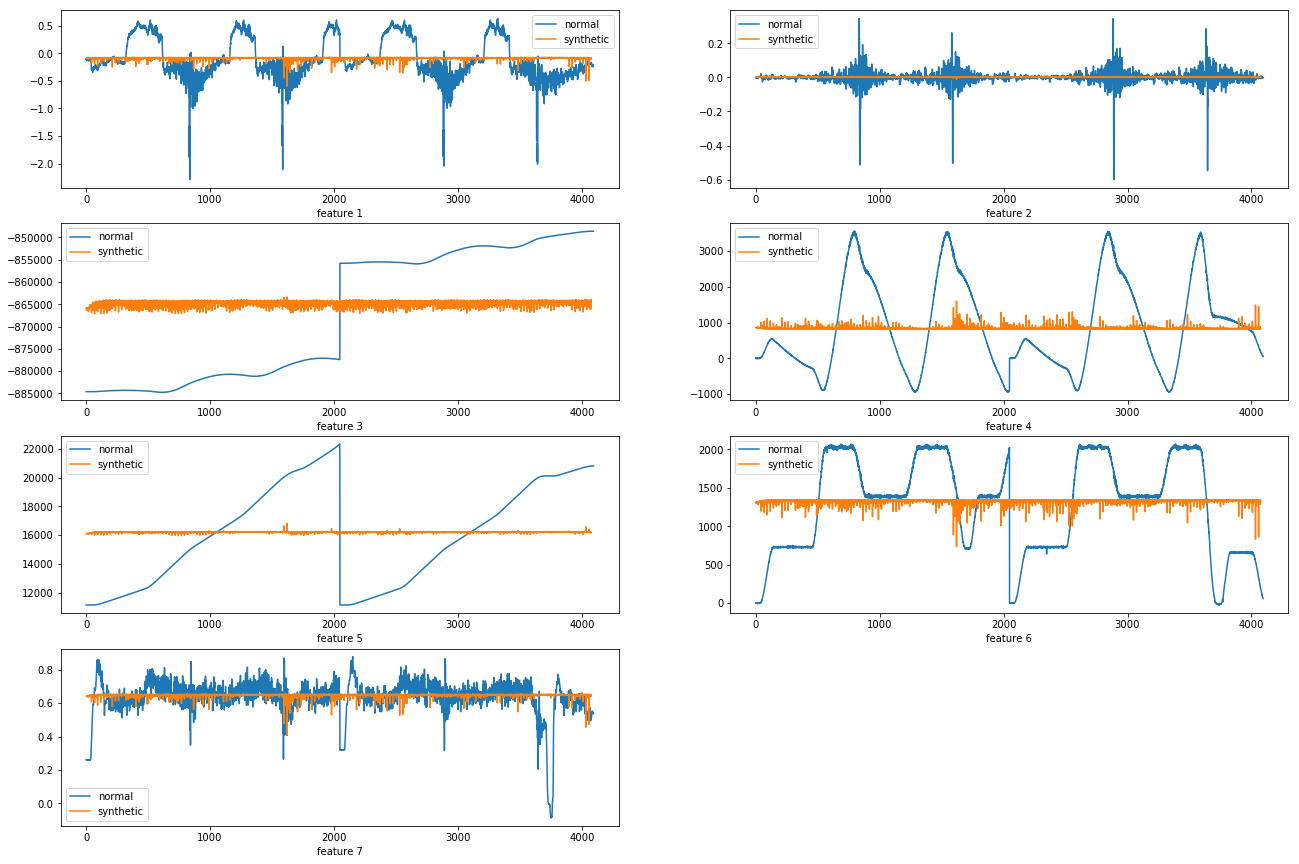

In [303]:
plt.figure(figsize=(22,15))
for i in range(0,df_1_ten.shape[1]):
    plt.subplot(4,2,i+1)
    plt.plot(df_1_ten[:,i], label="normal")
    plt.legend()
    plt.plot(p[:,i],label="synthetic")
    plt.legend()
    plt.xlabel(f'feature {i+1}')

In [95]:
# didnt realize but this loss function wont work for a 25 batch, not too difficult but will make changes now, 
#might even write it in the project sounds interesting
##KL divergence isnt teaching it well?????
def loss_function_comb(mu2,logvar2,mu1,logvar1,x):
    NLL_send=0
    KLD=0
    torch.pi =torch.acos(torch.zeros(1)).item() * 2
    torch.pi=torch.tensor(torch.pi)
    #print(mu2.shape,logvar2.shape,mu1.shape,logvar1.shape)
    for i in range(0,mu1.shape[1]):
            if(i<10):
                #print(mu2[i,:],logvar2[i,:])
                KLD=-0.5*torch.mean(logvar1[0,i,:]+1-(torch.exp(logvar1[0,i,:])+torch.square(mu1[0,i,:])))
                c=torch.log(2*torch.pi)
                b=logvar2[0,i,:]
                a= torch.square(x[i,:]-mu2[0,i,:])/torch.exp(logvar2[0,i,:])
                NLL=0.5*(a+b+c)
                NLL_send+=torch.mean(NLL)+KLD
            else:
                c=torch.log(2*torch.pi)
                b=logvar2[0,i,:]
                a= torch.square(x[i,:]-mu2[0,i,:])/torch.exp(logvar2[0,i,:])
                NLL=0.5*(a+b+c)
                NLL_send+=torch.mean(NLL)
    return NLL_send

In [96]:
def loss_function(mu2,logvar2,mu1,logvar1,x):
    torch.pi = torch.acos(torch.zeros(1)).item() * 2
    torch.pi=torch.tensor(torch.pi)
#     BCE=nn.functional.nll_loss( #trying MSE loss
#         x_hat, x.view(-1,7), reduction='sum'
#     )
#     Log probability: 
#         log(p(x | \mu, \sigma)) = -0.5 (\log(2\pi) + (x-mu)^2/\sigma^2 + \log(\sigma^2))
##using my custom negative log likelihood funciton
    #KLD= -0.5 * torch.mean(torch.exp(logvar1) - logvar1 - 1 + mu1.pow(2))
    KLD=-0.5*torch.mean(logvar1+1-(torch.exp(logvar1)+torch.square(mu1)))
    #NLL=0.5*torch.sum(torch.log(2*torch.pi) + torch.square(x-mu2)/logvar2.exp()+logvar2)
    c=torch.log(2*torch.pi)
    b=logvar2
    a= torch.square(x-mu2)/torch.exp(logvar2)
    NLL=0.5*(a+b+c)
    NLL=torch.mean(NLL)
    MSE=torch.mean((x-mu2)**2)
    
    return NLL+KLD

In [2]:
#print(train_rows)
print(train_losses)
l=[]
for i in train_losses:
    l.append(i/train_rows)
plt.plot(l,color='green',label='train_loss')
plt.legend()
plt.plot(test_losses, label='test_loss')
plt.legend()
# plt.plot(MSE_loss, color='pink', label='MSE')
# plt.legend()
# for i in train_losses:
#     print(i)

NameError: name 'train_losses' is not defined

In [1]:
#print(train_rows)
print(train_losses)
l=[]
for i in train_losses:
    l.append(i/train_rows)
plt.plot(l,color='green',label='train_loss')
plt.legend()
plt.plot(test_losses, label='test_loss')
plt.legend()
# plt.plot(MSE_loss, color='pink', label='MSE')
# plt.legend()
# for i in train_losses:
#     print(i)

NameError: name 'train_losses' is not defined

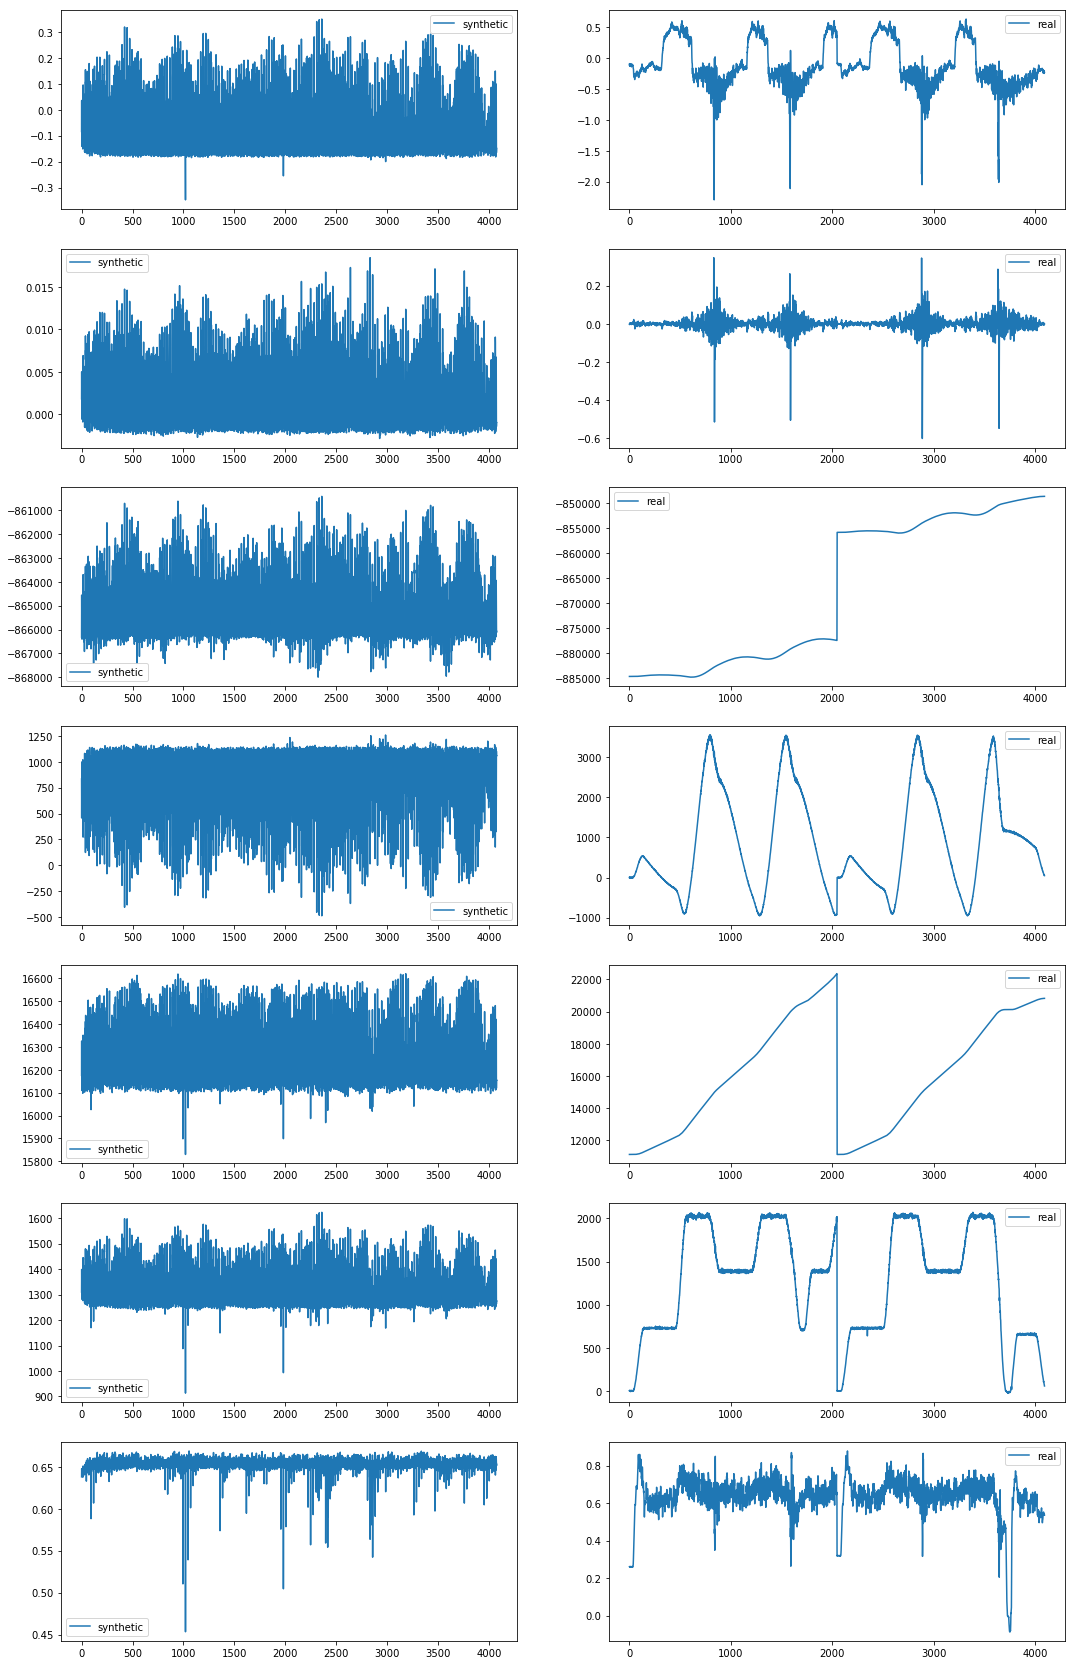

In [101]:
plt.figure(figsize=(18,30))
for i in range(0,7):
    #print(i)
#     print(i*2+1)
#     print(i*2+2)
    plt.subplot(7,2,i*2+1)
    plt.plot(p[:,i], label="synthetic")
    plt.legend()
    plt.subplot(7,2,i*2+2)
#     plt.figure(figsize=(15,20))
    plt.plot(df_1_ten[:,i], label="real")
    plt.legend()

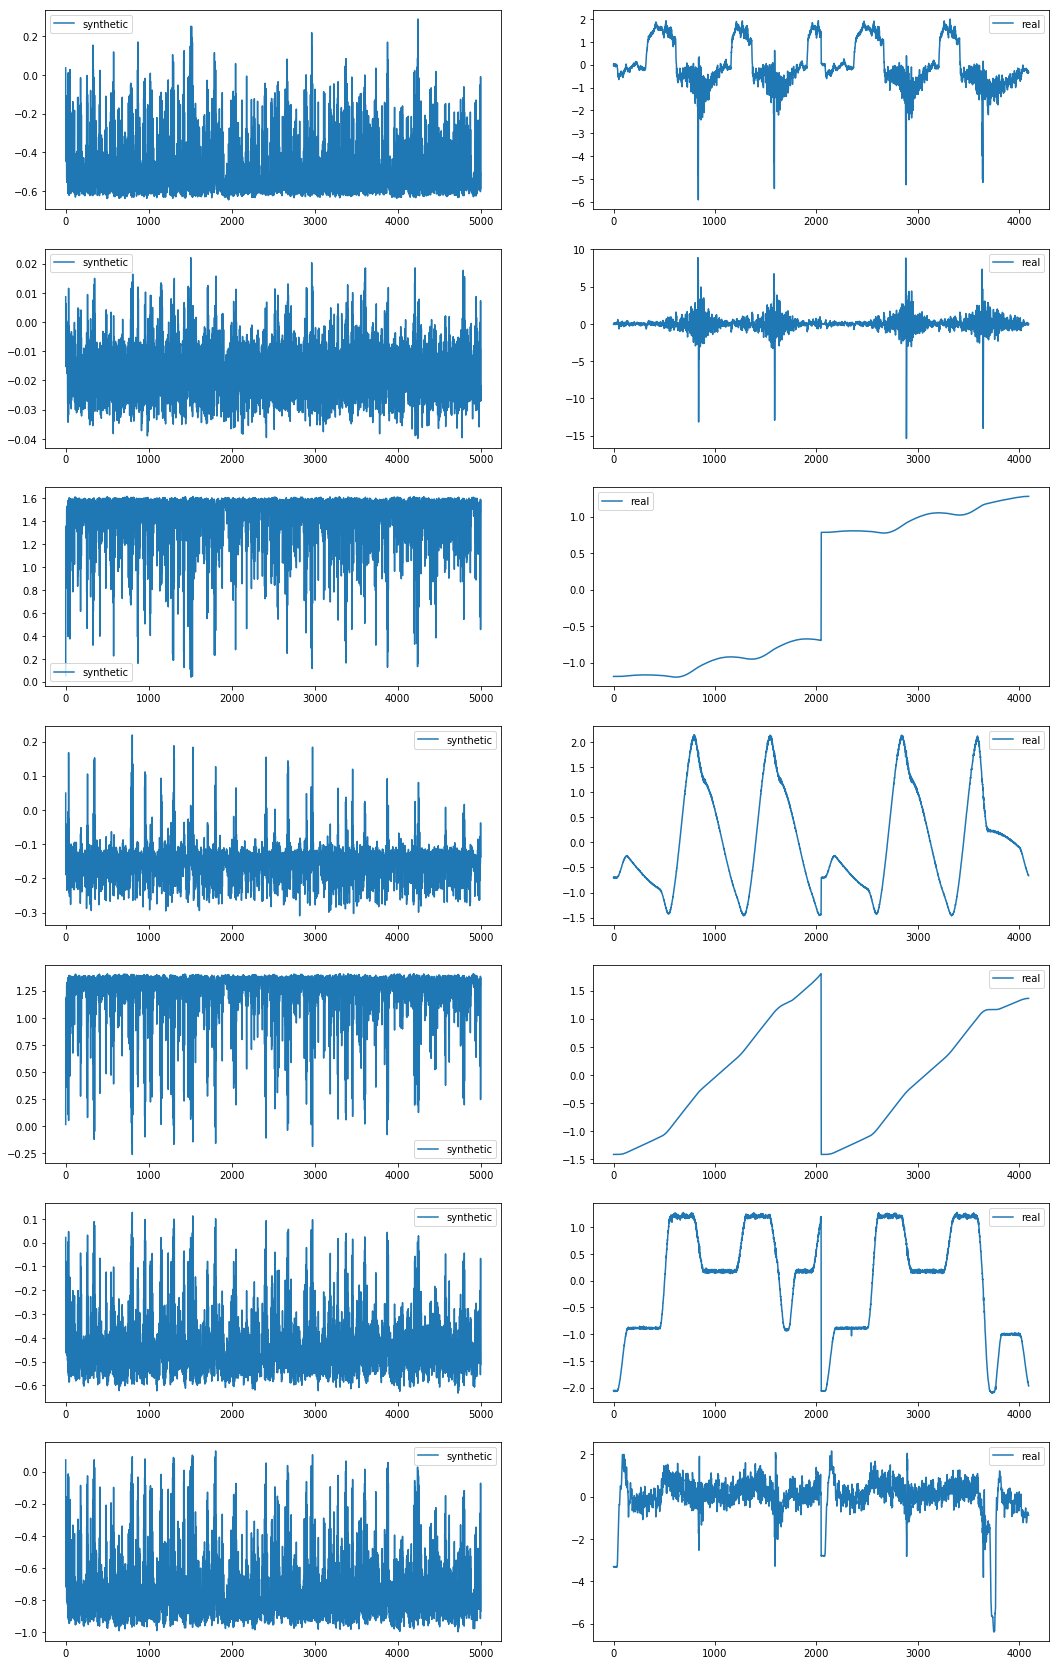

In [140]:
plt.figure(figsize=(18,30))
for i in range(0,7):
    #print(i)
#     print(i*2+1)
#     print(i*2+2)
    plt.subplot(7,2,i*2+1)
    plt.plot(d[:,i], label="synthetic")
    plt.legend()
    plt.subplot(7,2,i*2+2)
#     plt.figure(figsize=(15,20))
    plt.plot(df_1_tensor[:,i], label="real")
    plt.legend()

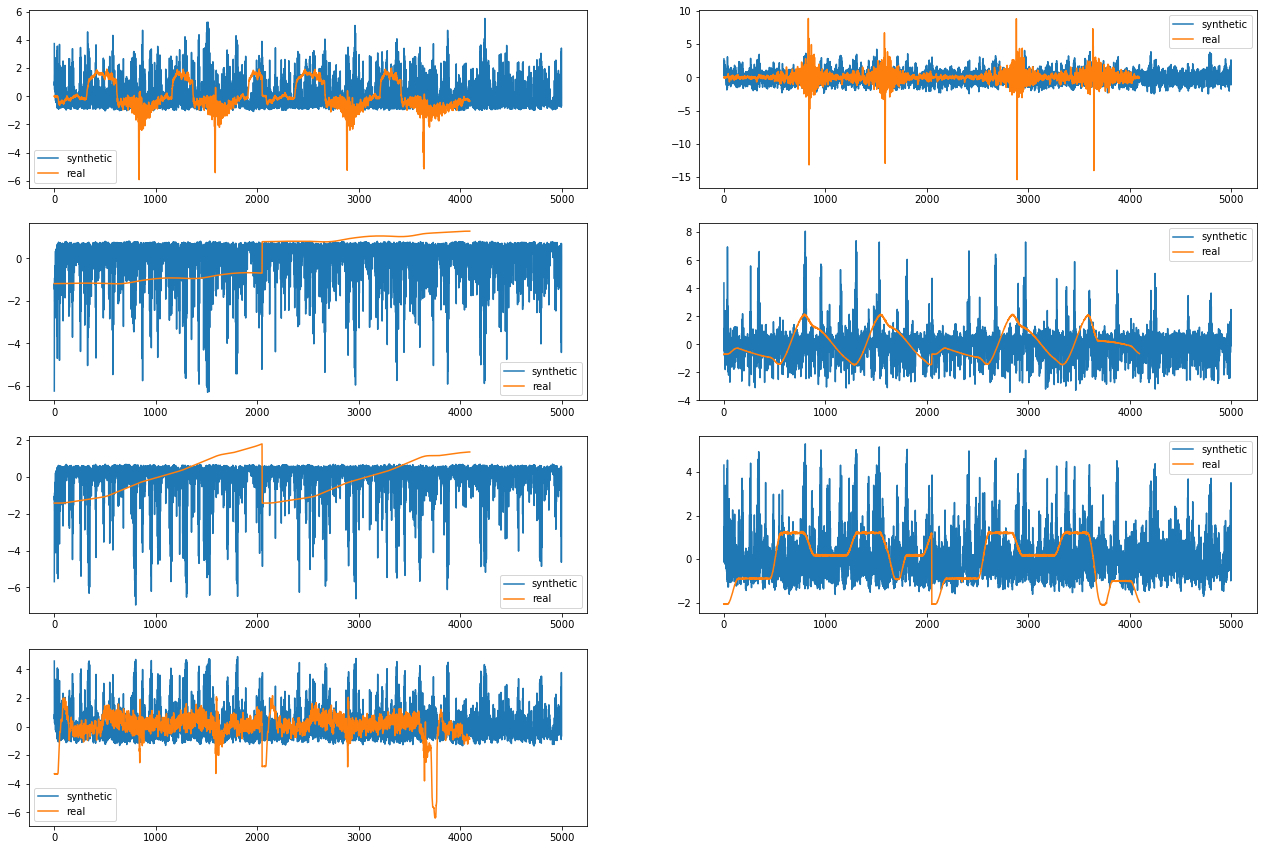

In [157]:
plt.figure(figsize=(22,15))
for i in range(0,7):
#     print("Synthetic data values",torch.max(d[:,0,i]), torch.min(d[:,0,i]))
#     print("i/p scaled value",torch.max(df_1_tensor[:,0,i]), torch.min(df_1_tensor[:,0,i]))
    plt.subplot(4,2,i+1)
    #plt.plot(d[:,i], label="synthetic")
    plt.plot(scal_objs[i].fit_transform(d[:,i].reshape(-1,1)), label="synthetic")
    plt.legend()
#     plt.plot(dummy[0,:,i], label="noisy")
#     plt.legend()
    plt.plot(df_1_tensor[:,i], label="real")
    plt.legend()

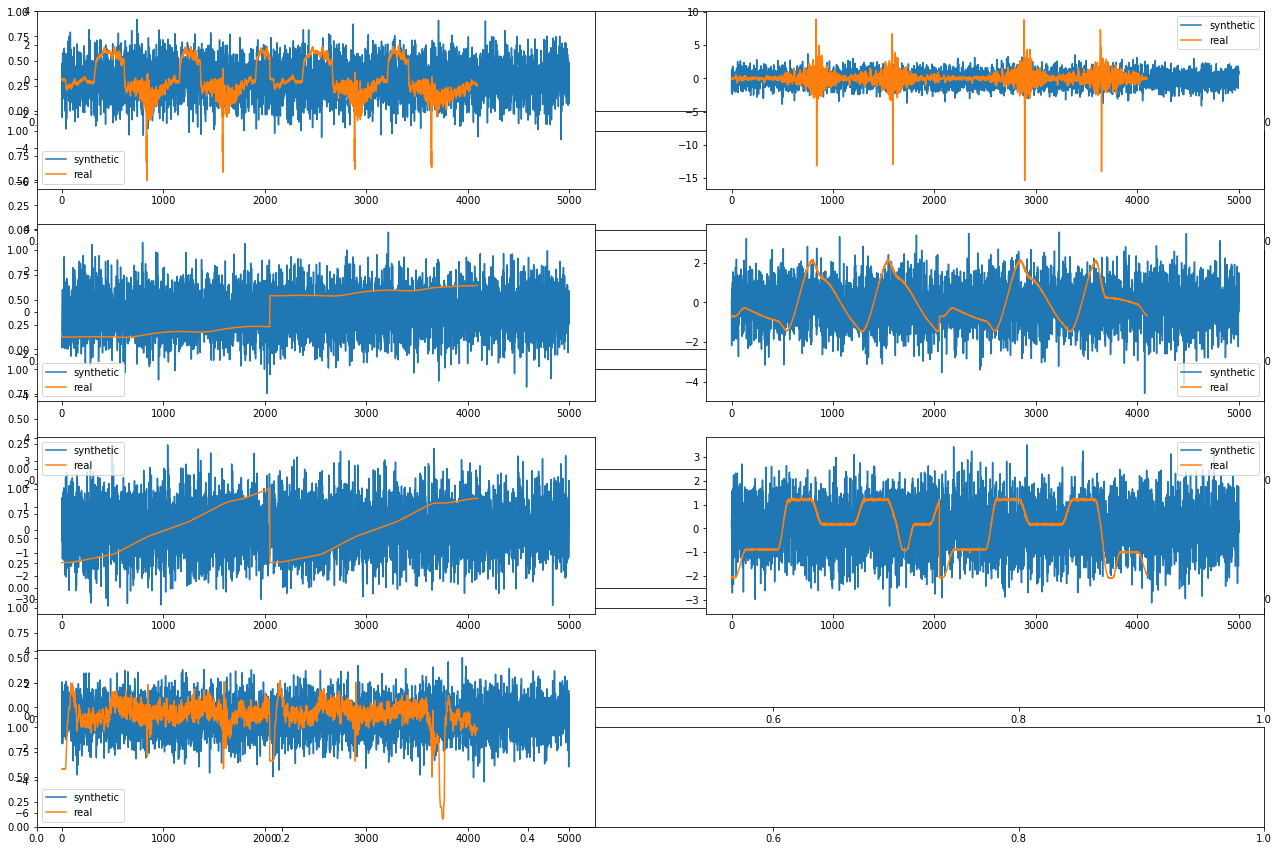

In [160]:
fig, axs=plt.subplots(7,1,figsize=(22,15))

var=4
for i in range(0,7):
#     print("Synthetic data values",torch.max(d[:,0,i]), torch.min(d[:,0,i]))
#     print("i/p scaled value",torch.max(df_1_tensor[:,0,i]), torch.min(df_1_tensor[:,0,i]))
    fig.add_subplot(4,2,i+1)
    plt.plot(scaled[:,i], label="synthetic")
    plt.legend()
#     plt.plot(dummy[0,:,i], label="noisy")
#     plt.legend()
    plt.plot(df_1_tensor[:,i], label="real")
    plt.legend()

# Inverse scalling

In [143]:
for i in range(0,)

7

In [270]:
p=0
sns.distplot(d[:,0,p], label="synthetic", axlabel='synthetic')
#sns.distplot(df_1_tensor[:,0,p], label="real", axlabel='real', color='green')

IndexError: too many indices for tensor of dimension 2

# Below rough and old code

In [140]:
print(d.shape)

torch.Size([1000, 5, 7])


In [146]:
d=d.reshape(5000,7)

In [150]:
print(df_1_tensor.shape)

torch.Size([819, 5, 7])


In [151]:
df_1_tensor=df_1_tensor.reshape(train_rows,features)

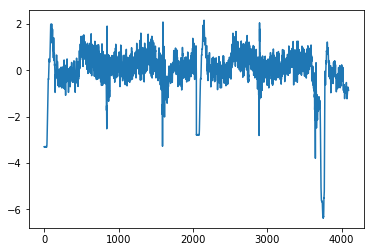

In [157]:
plt.plot(df_1_tensor[:,6])

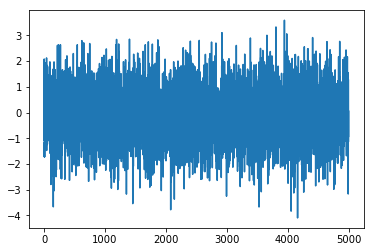

In [156]:
plt.plot(d[:,6])

In [804]:
train_VAE(epochs,optimizer, encoder,decoder,df_1_tensor,test_tensor)

TypeError: train_VAE() takes 0 positional arguments but 6 were given

In [789]:
epochs=50
#changed the next two from 50, 30 to 80,50

learn_rate=1e-3
optimizer=torch.optim.Adam(
     model.parameters(), lr=learn_rate
)
#based on flag neural netwokr know if data is 
for epoch in range(0,epochs+1):
    #training
    model.train()
    train_loss=0
##x happens only once since that is how the data has been split, no batch SGD is used
#    for x in df_1_tensor:
    for i in range(0,train_rows//bs):
        optimizer.zero_grad()
        #============forward=========
        mu2,logvar2,mu1,logvar1=model(dummy[i,:,:]) #noisy data fed here
        #print(mu2.shape,logvar2.shape,mu1.shape,logvar1.shape,x.shape)
        loss=loss_function_comb(mu2,logvar2,mu1,logvar1,df_1_tensor[i,:,:],) #loss function is wrt to actual data
        train_loss+=loss.item()
        #=====backpropagation=======
        #print(train_loss)
        loss.backward()
        optimizer.step()
    train_losses.append(train_loss)    
    print("train loss in epoch",epoch,train_loss/train_rows)
    with torch.no_grad():
        model.eval()#switch to let the network know, to prevent gradient evaluation during testing alongwith torch.no_grad()
        test_loss=0
        MSE=0
        L1=0
        for x in test_tensor:
            seq_len=x.shape[0]
            points=x.shape[1]
            #==============forward=========
            mu2,logvar2,mu1,logvar1 = model(x)
            test_loss= loss_function(mu2,logvar2,mu1,logvar1,x).item()    ##same as training
            mu2=mu2.reshape([bs,features])
            L1=nn.L1Loss()
            L1=L1(x,mu2)
            MSE=nn.MSELoss()
            MSE=MSE(x,mu2)
            test_loss+=L1.item()+MSE.item()
        test_losses.append(test_loss)    
        print("test loss in epoch",epoch,test_loss)

model=VAR(features,lstm_size,bot_nodes)

In [790]:
mu2,logvar2,mu1,logvar1=model(df_1_tensor)

In [791]:
print(mu2.shape,mu1.shape,logvar1.shape,logvar2.shape)

torch.Size([1, 4095, 7]) torch.Size([1, 4095, 80]) torch.Size([1, 4095, 80]) torch.Size([1, 4095, 7])


In [403]:
epochs=50
#changed the next two from 50, 30 to 80,50
bot_nodes=80
lstm_size=50
noise=5# doenst matter, removed
model=Test(features,lstm_size,bot_nodes,noise)
train_losses=[]
test_losses=[]
MSE_loss=[]


torch.Size([4095, 7])


In [429]:
mu1,logvar1,z=encoder(df_1_tensor)
print(mu1.shape,logvar1.shape,z.shape)

torch.Size([1, 4095, 20]) torch.Size([1, 4095, 20]) torch.Size([1, 4095, 20])


In [169]:
#see the shape of Mew1,logvar1
lstm_size,bot_nodes=7,7
noise=5
model=Test(features,lstm_size,bot_nodes,noise)
print(df_1_tensor.shape)
for i in range(0,train_rows//bs):
    mu2,logvar2,mu1,logvar1=model(x)
#     print(mu2,"shape",mu2.shape,"\n", logvar2,"shape",logvar2.shape,"\n",mu1,"shape",
#     mu1.shape,"\n",logvar1,"shape",logvar1.shape,sample,"\nsample",sample.shape)
    print(mu1.shape,logvar1,mu1.shape,logvar1)

torch.Size([163, 25, 7])
torch.Size([1, 25, 7]) tensor([[[-0.2178,  0.1473, -0.1475, -0.2431,  0.1130,  0.1983, -0.2265],
         [-0.2178,  0.1473, -0.1475, -0.2431,  0.1130,  0.1983, -0.2265],
         [-0.2178,  0.1473, -0.1475, -0.2431,  0.1130,  0.1983, -0.2265],
         [-0.2178,  0.1473, -0.1475, -0.2431,  0.1130,  0.1983, -0.2265],
         [-0.2178,  0.1473, -0.1475, -0.2431,  0.1130,  0.1983, -0.2265],
         [-0.2178,  0.1473, -0.1475, -0.2430,  0.1130,  0.1983, -0.2265],
         [-0.2178,  0.1473, -0.1475, -0.2430,  0.1130,  0.1983, -0.2265],
         [-0.2178,  0.1473, -0.1475, -0.2431,  0.1130,  0.1983, -0.2265],
         [-0.2178,  0.1473, -0.1475, -0.2431,  0.1130,  0.1983, -0.2265],
         [-0.2178,  0.1472, -0.1475, -0.2432,  0.1131,  0.1983, -0.2265],
         [-0.2178,  0.1473, -0.1475, -0.2431,  0.1130,  0.1983, -0.2265],
         [-0.2178,  0.1473, -0.1475, -0.2431,  0.1130,  0.1983, -0.2265],
         [-0.2178,  0.1473, -0.1475, -0.2431,  0.1130,  0.1983, 

torch.Size([1, 25, 7]) tensor([[[-0.2178,  0.1473, -0.1475, -0.2431,  0.1130,  0.1983, -0.2265],
         [-0.2178,  0.1473, -0.1475, -0.2431,  0.1130,  0.1983, -0.2265],
         [-0.2178,  0.1473, -0.1475, -0.2431,  0.1130,  0.1983, -0.2265],
         [-0.2178,  0.1473, -0.1475, -0.2431,  0.1130,  0.1983, -0.2265],
         [-0.2178,  0.1473, -0.1475, -0.2431,  0.1130,  0.1983, -0.2265],
         [-0.2178,  0.1473, -0.1475, -0.2430,  0.1130,  0.1983, -0.2265],
         [-0.2178,  0.1473, -0.1475, -0.2430,  0.1130,  0.1983, -0.2265],
         [-0.2178,  0.1473, -0.1475, -0.2431,  0.1130,  0.1983, -0.2265],
         [-0.2178,  0.1473, -0.1475, -0.2431,  0.1130,  0.1983, -0.2265],
         [-0.2178,  0.1472, -0.1475, -0.2432,  0.1131,  0.1983, -0.2265],
         [-0.2178,  0.1473, -0.1475, -0.2431,  0.1130,  0.1983, -0.2265],
         [-0.2178,  0.1473, -0.1475, -0.2431,  0.1130,  0.1983, -0.2265],
         [-0.2178,  0.1473, -0.1475, -0.2431,  0.1130,  0.1983, -0.2265],
         [-0.21

torch.Size([1, 25, 7]) tensor([[[-0.2178,  0.1473, -0.1475, -0.2431,  0.1130,  0.1983, -0.2265],
         [-0.2178,  0.1473, -0.1475, -0.2431,  0.1130,  0.1983, -0.2265],
         [-0.2178,  0.1473, -0.1475, -0.2431,  0.1130,  0.1983, -0.2265],
         [-0.2178,  0.1473, -0.1475, -0.2431,  0.1130,  0.1983, -0.2265],
         [-0.2178,  0.1473, -0.1475, -0.2431,  0.1130,  0.1983, -0.2265],
         [-0.2178,  0.1473, -0.1475, -0.2430,  0.1130,  0.1983, -0.2265],
         [-0.2178,  0.1473, -0.1475, -0.2430,  0.1130,  0.1983, -0.2265],
         [-0.2178,  0.1473, -0.1475, -0.2431,  0.1130,  0.1983, -0.2265],
         [-0.2178,  0.1473, -0.1475, -0.2431,  0.1130,  0.1983, -0.2265],
         [-0.2178,  0.1472, -0.1475, -0.2432,  0.1131,  0.1983, -0.2265],
         [-0.2178,  0.1473, -0.1475, -0.2431,  0.1130,  0.1983, -0.2265],
         [-0.2178,  0.1473, -0.1475, -0.2431,  0.1130,  0.1983, -0.2265],
         [-0.2178,  0.1473, -0.1475, -0.2431,  0.1130,  0.1983, -0.2265],
         [-0.21

       grad_fn=<SliceBackward>)
torch.Size([1, 25, 7]) tensor([[[-0.2178,  0.1473, -0.1475, -0.2431,  0.1130,  0.1983, -0.2265],
         [-0.2178,  0.1473, -0.1475, -0.2431,  0.1130,  0.1983, -0.2265],
         [-0.2178,  0.1473, -0.1475, -0.2431,  0.1130,  0.1983, -0.2265],
         [-0.2178,  0.1473, -0.1475, -0.2431,  0.1130,  0.1983, -0.2265],
         [-0.2178,  0.1473, -0.1475, -0.2431,  0.1130,  0.1983, -0.2265],
         [-0.2178,  0.1473, -0.1475, -0.2430,  0.1130,  0.1983, -0.2265],
         [-0.2178,  0.1473, -0.1475, -0.2430,  0.1130,  0.1983, -0.2265],
         [-0.2178,  0.1473, -0.1475, -0.2431,  0.1130,  0.1983, -0.2265],
         [-0.2178,  0.1473, -0.1475, -0.2431,  0.1130,  0.1983, -0.2265],
         [-0.2178,  0.1472, -0.1475, -0.2432,  0.1131,  0.1983, -0.2265],
         [-0.2178,  0.1473, -0.1475, -0.2431,  0.1130,  0.1983, -0.2265],
         [-0.2178,  0.1473, -0.1475, -0.2431,  0.1130,  0.1983, -0.2265],
         [-0.2178,  0.1473, -0.1475, -0.2431,  0.1130,  0

torch.Size([1, 25, 7]) tensor([[[-0.2178,  0.1473, -0.1475, -0.2431,  0.1130,  0.1983, -0.2265],
         [-0.2178,  0.1473, -0.1475, -0.2431,  0.1130,  0.1983, -0.2265],
         [-0.2178,  0.1473, -0.1475, -0.2431,  0.1130,  0.1983, -0.2265],
         [-0.2178,  0.1473, -0.1475, -0.2431,  0.1130,  0.1983, -0.2265],
         [-0.2178,  0.1473, -0.1475, -0.2431,  0.1130,  0.1983, -0.2265],
         [-0.2178,  0.1473, -0.1475, -0.2430,  0.1130,  0.1983, -0.2265],
         [-0.2178,  0.1473, -0.1475, -0.2430,  0.1130,  0.1983, -0.2265],
         [-0.2178,  0.1473, -0.1475, -0.2431,  0.1130,  0.1983, -0.2265],
         [-0.2178,  0.1473, -0.1475, -0.2431,  0.1130,  0.1983, -0.2265],
         [-0.2178,  0.1472, -0.1475, -0.2432,  0.1131,  0.1983, -0.2265],
         [-0.2178,  0.1473, -0.1475, -0.2431,  0.1130,  0.1983, -0.2265],
         [-0.2178,  0.1473, -0.1475, -0.2431,  0.1130,  0.1983, -0.2265],
         [-0.2178,  0.1473, -0.1475, -0.2431,  0.1130,  0.1983, -0.2265],
         [-0.21

torch.Size([1, 25, 7]) tensor([[[-0.2178,  0.1473, -0.1475, -0.2431,  0.1130,  0.1983, -0.2265],
         [-0.2178,  0.1473, -0.1475, -0.2431,  0.1130,  0.1983, -0.2265],
         [-0.2178,  0.1473, -0.1475, -0.2431,  0.1130,  0.1983, -0.2265],
         [-0.2178,  0.1473, -0.1475, -0.2431,  0.1130,  0.1983, -0.2265],
         [-0.2178,  0.1473, -0.1475, -0.2431,  0.1130,  0.1983, -0.2265],
         [-0.2178,  0.1473, -0.1475, -0.2430,  0.1130,  0.1983, -0.2265],
         [-0.2178,  0.1473, -0.1475, -0.2430,  0.1130,  0.1983, -0.2265],
         [-0.2178,  0.1473, -0.1475, -0.2431,  0.1130,  0.1983, -0.2265],
         [-0.2178,  0.1473, -0.1475, -0.2431,  0.1130,  0.1983, -0.2265],
         [-0.2178,  0.1472, -0.1475, -0.2432,  0.1131,  0.1983, -0.2265],
         [-0.2178,  0.1473, -0.1475, -0.2431,  0.1130,  0.1983, -0.2265],
         [-0.2178,  0.1473, -0.1475, -0.2431,  0.1130,  0.1983, -0.2265],
         [-0.2178,  0.1473, -0.1475, -0.2431,  0.1130,  0.1983, -0.2265],
         [-0.21

torch.Size([1, 25, 7]) tensor([[[-0.2178,  0.1473, -0.1475, -0.2431,  0.1130,  0.1983, -0.2265],
         [-0.2178,  0.1473, -0.1475, -0.2431,  0.1130,  0.1983, -0.2265],
         [-0.2178,  0.1473, -0.1475, -0.2431,  0.1130,  0.1983, -0.2265],
         [-0.2178,  0.1473, -0.1475, -0.2431,  0.1130,  0.1983, -0.2265],
         [-0.2178,  0.1473, -0.1475, -0.2431,  0.1130,  0.1983, -0.2265],
         [-0.2178,  0.1473, -0.1475, -0.2430,  0.1130,  0.1983, -0.2265],
         [-0.2178,  0.1473, -0.1475, -0.2430,  0.1130,  0.1983, -0.2265],
         [-0.2178,  0.1473, -0.1475, -0.2431,  0.1130,  0.1983, -0.2265],
         [-0.2178,  0.1473, -0.1475, -0.2431,  0.1130,  0.1983, -0.2265],
         [-0.2178,  0.1472, -0.1475, -0.2432,  0.1131,  0.1983, -0.2265],
         [-0.2178,  0.1473, -0.1475, -0.2431,  0.1130,  0.1983, -0.2265],
         [-0.2178,  0.1473, -0.1475, -0.2431,  0.1130,  0.1983, -0.2265],
         [-0.2178,  0.1473, -0.1475, -0.2431,  0.1130,  0.1983, -0.2265],
         [-0.21

In [394]:
Old
class Discriminator(nn.Module):
    def __init__(self, features, hidden_len):#, output_len=1):
        super(Discriminator, self).__init__()
        self.hidden_len=hidden_len
        self.n_features=features
        
        self.layer1 = nn.Sequential(
            nn.Linear(features,hidden_len),
            nn.LeakyReLU(0.2)
            #nn.Dropout(0.3)
        )
        self.layer2 = nn.Sequential(
            nn.LSTM(hidden_len,hidden_len),
            #nn.LeakyReLU(0.2)
            #nn.Dropout(0.3)
        )
        self.layer3 = nn.Sequential(
            nn.LSTM(hidden_len, hidden_len),#to get mu and logvar that we use to get samples of the distribution
            #nn.Sigmoid() #forBCE
        )
        self.layer4=nn.Sequential(
            nn.LSTM(hidden_len,features) # features or feature*2 based on the loss function
        )
    
    def forward(self, x):
        length=x.shape[0]
        x= self.layer1(x)
        x=x.reshape(1,4096,self.hidden_len) ###frustrtated 
        x,_= self.layer2(x)
        x= self.layer3(x)
        return x
hidden_len=16
discriminator = Discriminator(features,16)

Data seems to be ready....going to use this for loop during training
1)Feed df_1_tensor for loss function
2)Feed dummy to the neural network

In [81]:
for i in range(0,train_rows//bs):
    print(i)
    print("df_1_tensor\n\"",df_1_tensor[i,:,:],df_1_tensor[i,:,:].shape)
    #print("test_tensor\n\"",test_tensor[i,:,:],test_tensor[i,:,:].shape)
    print("dummy\n\"",dummy[i,:,:],dummy[i,:,:].shape)

0
df_1_tensor
" tensor([[-0.0120, -0.0617, -1.1908, -0.7015, -1.4159, -2.0599, -3.3029],
        [ 0.0507, -0.0968, -1.1908, -0.6878, -1.4159, -2.0679, -3.3117],
        [-0.0202,  0.0439, -1.1908, -0.7070, -1.4159, -2.0518, -3.3206],
        [-0.0112,  0.0790, -1.1908, -0.7125, -1.4159, -2.0679, -3.3117],
        [-0.0630,  0.1142, -1.1908, -0.7070, -1.4159, -2.0639, -3.3029]]) torch.Size([5, 7])
dummy
" tensor([[-0.0120, -0.0617, -1.1908, -0.7015, -1.4159, -2.0599, -3.3029],
        [-0.3038,  0.6166, -0.2509,  0.4851, -0.9962,  1.5925, -0.3062],
        [-0.2756, -0.0321,  1.1073,  0.2870, -0.8853, -0.5548,  0.7700],
        [ 0.0830, -0.2067, -0.2067,  0.8789,  1.1379,  0.6948, -0.1117],
        [-1.5802,  0.6812,  0.5676,  0.8123,  0.3949,  1.7700, -0.7282]]) torch.Size([5, 7])
1
df_1_tensor
" tensor([[-0.0623,  0.1142, -1.1908, -0.7015, -1.4159, -2.0639, -3.3029],
        [ 0.0396, -0.0617, -1.1908, -0.7015, -1.4159, -2.0679, -3.3117],
        [-0.0169,  0.0439, -1.1908, -0.6961,

" tensor([[ 0.0980,  0.0926, -1.1732, -0.4878, -1.3061, -0.8748, -0.2505],
        [-0.4556, -1.1565, -0.9497, -1.4541,  0.0209, -0.1231, -0.4921],
        [ 1.5795,  0.4530, -0.5280, -0.7835,  0.9335,  1.2170,  1.0771],
        [ 1.7306,  0.3765,  0.4551,  0.9898,  0.8242,  0.6195,  0.1914],
        [ 0.6976,  0.2282,  0.0253,  0.4863,  0.4443, -0.2410, -0.4588]]) torch.Size([5, 7])
45
df_1_tensor
" tensor([[ 0.1062,  0.0783, -1.1728, -0.4933, -1.3018, -0.8951, -0.3370],
        [ 0.1086,  0.1172, -1.1728, -0.4988, -1.3009, -0.8910, -0.1875],
        [ 0.1306,  0.0581, -1.1727, -0.4960, -1.3004, -0.8910,  0.0064],
        [ 0.1055,  0.0774, -1.1726, -0.5042, -1.2995, -0.8910,  0.1382],
        [ 0.1140,  0.1399, -1.1726, -0.5042, -1.2987, -0.8748,  0.0036]]) torch.Size([5, 7])
dummy
" tensor([[ 0.1062,  0.0783, -1.1728, -0.4933, -1.3018, -0.8951, -0.3370],
        [ 0.9764, -1.1499, -0.9661, -0.2358, -0.8855,  0.2077, -0.1412],
        [-2.1057, -0.0059,  0.4638,  1.3437,  1.0320,  2.

" tensor([[ 1.5251,  0.1526, -1.1761, -0.9536, -1.1058, -0.8708,  0.3488],
        [ 1.5087,  0.2692, -1.1761, -0.9399, -1.1049, -0.8465,  0.1269],
        [ 1.5651,  0.0402, -1.1762, -0.9454, -1.1040, -0.8465, -0.2008],
        [ 1.6460, -0.2550, -1.1763, -0.9482, -1.1032, -0.8506, -0.3809],
        [ 1.6785, -0.2768, -1.1764, -0.9591, -1.1023, -0.8587, -0.1912]]) torch.Size([5, 7])
dummy
" tensor([[ 1.5251,  0.1526, -1.1761, -0.9536, -1.1058, -0.8708,  0.3488],
        [ 0.0522,  2.0897, -0.3289,  1.3452, -0.5336, -0.7248,  0.5877],
        [ 1.1348, -0.7173, -0.5576, -0.4998,  0.3530,  0.9771,  1.5162],
        [-0.8244,  1.3246,  0.0380, -1.2629, -1.8674,  0.0105, -0.6773],
        [-1.6425,  1.4169,  1.8244,  0.7145,  0.9913,  0.1885, -0.0486]]) torch.Size([5, 7])
93
df_1_tensor
" tensor([[ 1.6124, -0.0178, -1.1765, -0.9536, -1.1015, -0.8344,  0.0234],
        [ 1.5626,  0.1823, -1.1766, -0.9619, -1.1006, -0.8263, -0.0292],
        [ 1.5441,  0.1948, -1.1766, -0.9619, -1.0997, -0.

        [-1.4914, -0.0137, -0.7527, -0.4457,  0.2334, -1.0851, -1.1633]]) torch.Size([5, 7])
141
df_1_tensor
" tensor([[-0.2228, -0.2395, -1.1737,  1.0276, -0.6099,  1.2161,  0.2309],
        [-0.1037, -0.6062, -1.1731,  1.0358, -0.6076,  1.1757,  0.2104],
        [-0.4348,  0.2437, -1.1725,  1.0166, -0.6053,  1.2080,  0.5059],
        [-0.3697,  0.3633, -1.1719,  1.0523, -0.6027,  1.1635,  0.8050],
        [-0.4011,  0.4151, -1.1713,  1.0934, -0.6004,  1.2121,  0.7669]]) torch.Size([5, 7])
dummy
" tensor([[-0.2228, -0.2395, -1.1737,  1.0276, -0.6099,  1.2161,  0.2309],
        [ 0.8718,  0.1404, -0.7765,  0.5924, -1.2078, -1.9588, -1.3335],
        [-0.6785, -0.6399,  0.2383, -0.5239, -0.1798,  0.0958,  0.7652],
        [ 0.5232,  1.0186, -0.3341, -1.9746,  0.3221, -1.5955, -0.9995],
        [ 0.2938,  0.9273, -1.4376, -0.0780,  0.1525,  0.5860, -1.3798]]) torch.Size([5, 7])
142
df_1_tensor
" tensor([[-0.7033,  1.2763, -1.1706,  1.1208, -0.5981,  1.1838,  0.8175],
        [-0.7262,  0

" tensor([[-1.0838,  0.7086, -0.9820,  0.9728, -0.1149,  0.1605,  0.2670],
        [-0.7306, -0.5611, -0.9815,  0.9728, -0.1132,  0.1767,  0.4855],
        [-0.8127, -0.4785, -0.9809,  0.9399, -0.1117,  0.1727,  0.5797],
        [-0.9313,  0.1765, -0.9803,  0.9289, -0.1100,  0.1565,  0.4964],
        [-0.6893, -0.6073, -0.9798,  0.9289, -0.1083,  0.1646,  0.9634]]) torch.Size([5, 7])
dummy
" tensor([[-1.0838,  0.7086, -0.9820,  0.9728, -0.1149,  0.1605,  0.2670],
        [ 0.5492, -0.7629,  0.4832,  0.8774, -0.0952,  0.1743, -0.8445],
        [-2.8289,  1.3598, -0.7123, -0.0336, -0.1203, -0.5183,  1.6256],
        [ 0.5435,  0.5199,  1.0402, -0.4262, -0.2781,  0.1664,  0.5537],
        [-0.8964, -0.6405,  0.8556,  0.5905,  1.7795,  0.3823,  0.6096]]) torch.Size([5, 7])
192
df_1_tensor
" tensor([[-0.9112,  0.4355, -0.9792,  0.9509, -0.1069,  0.2091,  0.7559],
        [-1.0219,  0.3091, -0.9787,  0.9289, -0.1051,  0.1686,  0.3359],
        [-0.5116, -1.1684, -0.9781,  0.9125, -0.1037,  0

" tensor([[ 1.3672,  0.3128, -0.9239, -0.9235,  0.2583,  0.1605, -0.1981],
        [ 1.3002,  0.4866, -0.9240, -0.9372,  0.2600,  0.1605,  0.2340],
        [ 1.4350, -0.0302, -0.9240, -0.9482,  0.2618,  0.1565,  0.4075],
        [ 1.4203, -0.0299, -0.9242, -0.9454,  0.2632,  0.1929,  0.3603],
        [ 1.3778,  0.3150, -0.9243, -0.9591,  0.2649,  0.1848,  0.1610]]) torch.Size([5, 7])
dummy
" tensor([[ 1.3672,  0.3128, -0.9239, -0.9235,  0.2583,  0.1605, -0.1981],
        [ 0.8065, -0.1445,  0.3645, -1.3432, -0.9947,  0.0253, -0.8890],
        [ 0.8083, -0.7573,  0.7266, -1.1958, -0.3353,  1.0089, -0.1515],
        [-1.3695, -0.2091,  0.6675,  0.2826, -2.5558, -0.7118,  0.3151],
        [-1.6907,  0.6310,  0.0992, -1.6940,  1.5391, -1.1709,  0.3155]]) torch.Size([5, 7])
239
df_1_tensor
" tensor([[ 1.3891,  0.2692, -0.9243, -0.9619,  0.2663,  0.1646,  0.0961],
        [ 1.5308, -0.2285, -0.9244, -0.9591,  0.2681,  0.1767,  0.5016],
        [ 1.5623, -0.1839, -0.9245, -0.9701,  0.2695,  0

        [-0.3290, -0.9011, -0.9398,  0.5179,  0.7631,  1.1838,  0.6268]]) torch.Size([5, 7])
dummy
" tensor([[-0.9664,  1.2318, -0.9414,  0.4466,  0.7536,  1.1919,  1.0760],
        [-1.5876, -0.2083, -0.7593,  3.3819, -0.6599,  0.5031,  0.0342],
        [-1.0504,  0.4476,  1.6915, -0.6075,  0.5118,  0.8720, -0.8392],
        [ 0.0673,  1.0169, -1.6816,  0.7293,  0.2432,  0.6826,  0.1973],
        [-0.1582,  2.8213,  0.5826, -0.1090,  1.0475,  0.5819,  2.2113]]) torch.Size([5, 7])
286
df_1_tensor
" tensor([[-0.5936,  0.1215, -0.9394,  0.5316,  0.7654,  1.1999,  0.7661],
        [-0.5765,  0.1179, -0.9389,  0.5590,  0.7677,  1.1918,  1.1363],
        [-0.6708,  0.4173, -0.9385,  0.5754,  0.7699,  1.1999,  0.8814],
        [-0.2584, -0.8803, -0.9380,  0.6056,  0.7722,  1.2121,  0.9143],
        [-0.1360, -1.0017, -0.9376,  0.6165,  0.7745,  1.1838,  0.9294]]) torch.Size([5, 7])
dummy
" tensor([[-0.5936,  0.1215, -0.9394,  0.5316,  0.7654,  1.1999,  0.7661],
        [-1.6905,  0.1464, -0.

        [ 0.6458,  0.6457, -0.2058, -1.1318, -0.0750, -0.0041, -0.8399]]) torch.Size([5, 7])
337
df_1_tensor
" tensor([[-1.1392,  0.8781, -0.7468,  1.0769,  1.2607, -0.8789, -0.3377],
        [-1.2269,  1.0105, -0.7461,  1.0742,  1.2615, -0.8991, -0.4494],
        [-1.0313, -0.0065, -0.7455,  1.0550,  1.2624, -0.8991, -0.4219],
        [-0.9088, -0.3055, -0.7449,  1.0468,  1.2632, -0.9112, -0.3979],
        [-1.3916,  1.2673, -0.7443,  1.0577,  1.2641, -0.9193, -0.2092]]) torch.Size([5, 7])
dummy
" tensor([[-1.1392,  0.8781, -0.7468,  1.0769,  1.2607, -0.8789, -0.3377],
        [ 1.7341,  1.2119, -2.0170,  0.5936, -1.0715, -0.0127, -1.4237],
        [ 0.4994,  1.5512,  1.8105, -0.8698, -1.1778, -0.9983, -0.2596],
        [-1.6934, -0.5480,  0.7754,  0.5413,  1.4943, -0.1260,  0.6363],
        [-0.1652,  0.3044,  1.0339,  1.8762,  0.3223,  0.9885, -0.0584]]) torch.Size([5, 7])
338
df_1_tensor
" tensor([[-1.2578,  0.7907, -0.7437,  1.0632,  1.2650, -0.9234,  0.0459],
        [-0.8518, -0

" tensor([[-0.1908,  0.6388, -0.6890,  0.1370,  1.3991,  0.2091, -0.2296],
        [-0.2113,  0.4539, -0.6887,  0.1233,  1.4008,  0.1565, -0.2945],
        [-0.1321,  0.2103, -0.6884,  0.1233,  1.4023,  0.1565,  0.0210],
        [-0.0627, -0.1278, -0.6881,  0.1014,  1.4040,  0.2091, -0.0440],
        [-0.0996,  0.0019, -0.6879,  0.0932,  1.4057,  0.1727, -0.2344]]) torch.Size([5, 7])
dummy
" tensor([[-0.1908,  0.6388, -0.6890,  0.1370,  1.3991,  0.2091, -0.2296],
        [-0.0129, -0.0433,  0.4808, -0.0620,  1.6780,  1.3501,  1.7018],
        [ 0.6002,  1.4813,  0.6808,  0.9025,  1.9672,  0.1388,  1.3552],
        [-0.2214,  0.6980, -1.3131, -0.5441,  0.8504, -1.2841, -1.7265],
        [ 0.0920, -0.5221,  0.8676,  0.3259, -0.0776, -1.6331, -1.5080]]) torch.Size([5, 7])
363
df_1_tensor
" tensor([[-0.2909,  0.6691, -0.6876,  0.0877,  1.4071,  0.1565, -0.1218],
        [-0.2181,  0.3609, -0.6873,  0.0794,  1.4088,  0.1807, -0.1334],
        [-0.1577, -0.0438, -0.6871,  0.0712,  1.4103,  0

df_1_tensor
" tensor([[ 1.4300, -0.2873, -0.6949, -1.4524,  1.7878,  1.0705,  0.7688],
        [ 1.2119,  0.5138, -0.6952, -1.4442,  1.7901,  1.0907,  0.8727],
        [ 1.2229,  0.1541, -0.6955, -1.4332,  1.7924,  1.1312,  1.0590],
        [ 1.4789, -0.5927, -0.6957, -1.4414,  1.7947,  1.1878,  0.0874],
        [ 1.4474, -0.4851, -0.6960, -1.4469,  1.7969,  1.1150,  0.2197]]) torch.Size([5, 7])
dummy
" tensor([[ 1.4300, -0.2873, -0.6949, -1.4524,  1.7878,  1.0705,  0.7688],
        [-0.8220,  0.0386, -0.3600, -2.4130,  2.0514,  0.7224,  0.6081],
        [-0.3690,  0.8237, -0.0762, -0.1583,  1.8077,  0.1441, -0.8698],
        [-0.5093, -0.6115, -0.6599,  0.3064, -0.4161,  0.5262, -0.7268],
        [ 0.2151,  0.0335, -1.1919,  2.4831, -0.9184,  0.4406, -0.7257]]) torch.Size([5, 7])
409
df_1_tensor
" tensor([[ 1.2126,  0.3088, -0.6962, -1.4442,  1.7989,  1.1554,  0.2047],
        [ 1.2110,  0.3893, -0.6965, -1.4332,  1.8012,  1.1352,  0.0757],
        [ 1.2733, -0.0631, -0.6967, -1.4277,

" tensor([[-0.0363,  0.1042,  0.8048, -0.5262, -1.2892, -0.8951, -0.0599],
        [-0.0334,  0.0661,  0.8049, -0.5344, -1.2883, -0.8870, -0.0698],
        [-0.0400,  0.0048,  0.8049, -0.5399, -1.2875, -0.8829, -0.1958],
        [-0.0723,  0.1317,  0.8049, -0.5371, -1.2866, -0.8708, -0.4898],
        [-0.0838,  0.0603,  0.8050, -0.5426, -1.2858, -0.8829, -0.4731]]) torch.Size([5, 7])
dummy
" tensor([[-0.0363,  0.1042,  0.8048, -0.5262, -1.2892, -0.8951, -0.0599],
        [-0.7752,  0.0835, -0.4440, -0.9516,  0.8291,  1.6060,  0.0877],
        [ 0.3817, -0.7515,  1.3257, -0.6227,  0.8553,  0.3802, -2.7259],
        [ 1.7389,  1.0770, -1.3428,  0.7403, -1.3989, -1.4652,  0.6318],
        [-1.3927, -1.1404, -1.8588,  0.2962,  0.7437,  0.4415, -1.0666]]) torch.Size([5, 7])
459
df_1_tensor
" tensor([[-0.0451,  0.0740,  0.8051, -0.5371, -1.2849, -0.9032, -0.1908],
        [-0.0686, -0.0063,  0.8051, -0.5426, -1.2840, -0.8951,  0.0744],
        [-0.1079,  0.0679,  0.8052, -0.5481, -1.2832, -0

" tensor([[ 1.5625,  0.1209,  0.8007, -0.9345, -1.1055, -0.8587, -0.1336],
        [ 1.5355,  0.2044,  0.8006, -0.9317, -1.1046, -0.8546, -0.3274],
        [ 1.5544,  0.0237,  0.8005, -0.9454, -1.1037, -0.8546, -0.3767],
        [ 1.7139, -0.2724,  0.8004, -0.9399, -1.1029, -0.8668, -0.1376],
        [ 1.6789, -0.2486,  0.8003, -0.9509, -1.1020, -0.8587,  0.3203]]) torch.Size([5, 7])
dummy
" tensor([[ 1.5625,  0.1209,  0.8007, -0.9345, -1.1055, -0.8587, -0.1336],
        [ 0.4087,  1.5927,  0.2074, -0.5152, -0.5317,  1.0262,  0.1126],
        [-1.2354, -0.4056,  0.3940,  0.2650, -1.7489, -1.5297, -0.1219],
        [ 0.6296,  2.0779,  0.5668, -0.2276, -1.6159,  0.6084,  0.7401],
        [-0.0050,  0.8989,  0.4071, -1.0647, -0.5060,  0.3301,  1.0606]]) torch.Size([5, 7])
503
df_1_tensor
" tensor([[ 1.5492,  0.1327,  0.8003, -0.9619, -1.1012, -0.8384,  0.6327],
        [ 1.5867,  0.0498,  0.8002, -0.9536, -1.1003, -0.8142,  0.7588],
        [ 1.5923,  0.0373,  0.8001, -0.9564, -1.0992, -0

" tensor([[-0.5702,  0.0439,  0.8088,  1.1591, -0.5855,  1.2161,  0.7977],
        [-0.2922, -0.5421,  0.8095,  1.1865, -0.5832,  1.2282,  0.9370],
        [-0.1319, -0.7824,  0.8101,  1.2112, -0.5809,  1.2485,  0.5616],
        [-0.3247, -0.0623,  0.8108,  1.2331, -0.5786,  1.2161,  0.8696],
        [-0.3043, -0.1614,  0.8114,  1.2468, -0.5763,  1.2606,  0.3433]]) torch.Size([5, 7])
dummy
" tensor([[-0.5702,  0.0439,  0.8088,  1.1591, -0.5855,  1.2161,  0.7977],
        [ 0.8033, -1.3778, -2.7859,  0.8336,  0.5050, -0.6472, -1.2022],
        [-0.4749,  1.3584,  0.1341, -1.0074, -0.1211, -0.3464,  0.7378],
        [ 1.0617, -2.2592, -1.1785, -1.4940, -1.6625, -0.3338, -0.0109],
        [ 0.2236, -0.8240, -1.7457, -0.6968,  0.1605,  1.0286, -1.2817]]) torch.Size([5, 7])
554
df_1_tensor
" tensor([[-0.6339,  0.8251,  0.8121,  1.2660, -0.5741,  1.2121,  0.7009],
        [-0.3026, -0.0972,  0.8128,  1.2879, -0.5718,  1.2606,  0.3787],
        [-0.4786,  0.1436,  0.8135,  1.2770, -0.5695,  1

" tensor([[-1.0548,  1.4193,  1.0027,  0.8632, -0.0902,  0.1605,  0.0652],
        [ 0.0450,  0.0305, -0.8763,  0.1017, -1.5500,  0.1099, -0.9593],
        [ 0.3795,  0.0639, -1.4685,  2.0627, -2.1072,  0.0430, -0.5700],
        [ 1.8653,  0.6738,  0.2148, -0.2562, -0.3678, -2.1193,  1.0858],
        [ 0.2175, -0.4988, -0.8044,  0.1437,  0.3639,  0.4206, -0.3735]]) torch.Size([5, 7])
605
df_1_tensor
" tensor([[-1.0002,  0.4249,  1.0053,  0.8330, -0.0825,  0.2050, -0.0666],
        [-0.8208, -0.0891,  1.0059,  0.8193, -0.0808,  0.1727, -0.2120],
        [-0.6942, -0.4591,  1.0064,  0.8275, -0.0793,  0.1646, -0.0113],
        [-0.5511, -0.8490,  1.0069,  0.8275, -0.0776,  0.1807, -0.1384],
        [-0.4335, -1.0175,  1.0074,  0.7974, -0.0762,  0.1686, -0.1240]]) torch.Size([5, 7])
dummy
" tensor([[-1.0002,  0.4249,  1.0053,  0.8330, -0.0825,  0.2050, -0.0666],
        [ 0.9657, -0.4848,  1.3737,  0.1110, -1.6758, -0.1370,  0.2133],
        [-0.4726,  1.4388, -0.1091,  0.8916, -0.6893,  0

        [-0.0836, -0.1348, -1.6249,  0.7327,  1.3317, -0.7079, -0.9501]]) torch.Size([5, 7])
652
df_1_tensor
" tensor([[ 1.8154, -0.0533,  1.0508, -1.0441,  0.2910,  0.1524,  0.2270],
        [ 1.8399, -0.0138,  1.0507, -1.0358,  0.2927,  0.1848,  0.4221],
        [ 1.9196, -0.1551,  1.0506, -1.0523,  0.2941,  0.2091, -0.1503],
        [ 1.8713,  0.0034,  1.0505, -1.0605,  0.2959,  0.1888, -0.1492],
        [ 1.7156,  0.5316,  1.0504, -1.0770,  0.2973,  0.1888,  0.0444]]) torch.Size([5, 7])
dummy
" tensor([[ 1.8154, -0.0533,  1.0508, -1.0441,  0.2910,  0.1524,  0.2270],
        [ 0.0446, -0.3690,  0.5088,  1.0419,  0.7255,  0.5950,  0.2256],
        [-0.8211,  0.5061,  0.4088,  0.3057, -1.0265, -1.1893, -0.0970],
        [-2.2018,  0.8463, -0.7387, -0.3714,  0.7335, -0.5705, -0.8757],
        [ 3.1365, -1.8304,  1.0923, -1.2766,  1.7438,  0.8514, -1.5656]]) torch.Size([5, 7])
653
df_1_tensor
" tensor([[ 1.7037,  0.4355,  1.0502, -1.0687,  0.2990,  0.1888,  0.0557],
        [ 1.7836,  0

        [-0.6367,  1.0267,  1.0521,  1.0577,  0.8336,  1.1959,  0.7479]]) torch.Size([5, 7])
dummy
" tensor([[-0.4504,  0.2826,  1.0497,  1.0002,  0.8244,  1.1838,  0.4656],
        [-0.8725,  0.9090, -0.2761, -0.5630, -1.1546,  1.7565,  1.5392],
        [ 0.1867, -0.1436,  0.3037, -0.5569, -0.9155,  0.2918, -0.9322],
        [-0.6765,  0.4672,  0.2613, -1.6636, -0.6572, -0.4721, -0.7130],
        [ 0.6772, -0.8936, -0.0430,  0.8552, -0.6976, -1.0141, -0.9207]]) torch.Size([5, 7])
702
df_1_tensor
" tensor([[-0.7999,  1.3599,  1.0528,  1.0687,  0.8359,  1.1878,  0.3333],
        [-0.4717,  0.3418,  1.0534,  1.1125,  0.8382,  1.1959,  0.5792],
        [-0.5346,  0.3584,  1.0540,  1.1454,  0.8405,  1.2080,  0.1327],
        [-0.5712,  0.2352,  1.0546,  1.1482,  0.8428,  1.2121,  0.2366],
        [-0.3697, -0.5268,  1.0553,  1.1728,  0.8453,  1.1878,  0.1984]]) torch.Size([5, 7])
dummy
" tensor([[-0.7999,  1.3599,  1.0528,  1.0687,  0.8359,  1.1878,  0.3333],
        [-0.0892,  0.2570, -0.

" tensor([[-0.8202, -1.1850,  1.1947,  0.2192,  1.1635, -2.0841, -5.6313],
        [ 0.2027, -0.0090,  0.8708, -0.0649,  1.1789,  2.1511, -0.7277],
        [-1.9072,  0.9692, -0.4656, -2.6446,  0.0472,  0.1686,  1.1930],
        [ 1.0197,  0.0237,  1.1314,  0.5747,  1.6951, -1.4789,  0.6280],
        [ 0.6558, -0.6311, -0.6826,  2.1908,  0.0188,  0.8823,  0.1447]]) torch.Size([5, 7])
747
df_1_tensor
" tensor([[-0.7930, -0.6389,  1.1963,  0.2219,  1.1632, -2.0882, -5.6553],
        [-0.7956, -0.2513,  1.1966,  0.2274,  1.1632, -2.1043, -5.6599],
        [-0.8011, -0.2392,  1.1969,  0.2274,  1.1632, -2.1003, -5.6648],
        [-0.8695,  0.0865,  1.1972,  0.2165,  1.1632, -2.0841, -5.6874],
        [-0.9409,  0.6788,  1.1976,  0.2247,  1.1632, -2.0882, -5.6922]]) torch.Size([5, 7])
dummy
" tensor([[-7.9301e-01, -6.3893e-01,  1.1963e+00,  2.2194e-01,  1.1632e+00,
         -2.0882e+00, -5.6553e+00],
        [-8.2422e-01,  6.0315e-01, -1.1518e+00,  1.3814e+00, -1.3369e+00,
          2.1212e+

         -1.0164e+00, -2.2670e-01]]) torch.Size([5, 7])
dummy
" tensor([[-0.6499,  0.1921,  1.2554,  0.0164,  1.2747, -1.0002, -0.7512],
        [-1.1629,  0.7108,  0.5053, -0.3675, -1.3662,  0.1011,  0.5439],
        [-1.3641, -0.7106, -1.3737,  0.8925, -0.9054, -0.1895,  0.1864],
        [ 0.8413, -2.2688,  1.4736, -0.1202, -0.9728, -0.7473,  2.5506],
        [ 0.2089,  0.5605, -1.0607,  1.1913, -2.9189, -1.3614,  0.0692]]) torch.Size([5, 7])
789
df_1_tensor
" tensor([[-0.5416, -0.0636,  1.2566, -0.0082,  1.2784, -1.0083, -0.2550],
        [-0.7924,  0.7536,  1.2569, -0.0110,  1.2790, -0.9962, -0.4438],
        [-0.5482,  0.0224,  1.2571,  0.0109,  1.2799, -1.0043, -0.6141],
        [-0.4660, -0.3231,  1.2574, -0.0055,  1.2807, -1.0083, -0.4389],
        [-0.5986,  0.0683,  1.2576, -0.0165,  1.2813, -1.0083, -0.2898]]) torch.Size([5, 7])
dummy
" tensor([[-0.5416, -0.0636,  1.2566, -0.0082,  1.2784, -1.0083, -0.2550],
        [ 0.6016,  0.7701,  0.4137, -0.9547, -1.1677,  1.4348,  0.5

train loss in epoch 0 1.431438714331323
test loss in epoch 0 3.7160152792930603
train loss in epoch 1 1.4185766404073898
test loss in epoch 1 3.66184800863266
train loss in epoch 2 1.4183685461097875
test loss in epoch 2 3.6391062140464783
train loss in epoch 3 1.4164428533942999
test loss in epoch 3 3.628311276435852
train loss in epoch 4 1.4165563073350396
test loss in epoch 4 3.6230509877204895
train loss in epoch 5 1.4126551398718605
test loss in epoch 5 3.614480972290039
train loss in epoch 6 1.4152471623869023
test loss in epoch 6 3.61709326505661
train loss in epoch 7 1.4135098276848612
test loss in epoch 7 3.6133393049240112
train loss in epoch 8 1.416014150822119
test loss in epoch 8 3.61481249332428
train loss in epoch 9 1.4137567657545227
test loss in epoch 9 3.6113007068634033
train loss in epoch 10 1.41631589337583
test loss in epoch 10 3.6181522011756897
train loss in epoch 11 1.4156287108294403
test loss in epoch 11 3.619532883167267
train loss in epoch 12 1.416255189385

# Training the VAE

In [361]:
epochs=50
#changed the next two from 50, 30 to 80,50
bot_nodes=80
lstm_size=50
noise=5# doenst matter, removed
model=Test(features,lstm_size,bot_nodes,noise)
train_losses=[]
test_losses=[]
MSE_loss=[]
learn_rate=1e-3
optimizer=torch.optim.Adam(
     model.parameters(), lr=learn_rate
)
#based on flag neural netwokr know if data is 
for epoch in range(0,epochs+1):
    #training
    model.train()
    train_loss=0
##x happens only once since that is how the data has been split, no batch SGD is used
#    for x in df_1_tensor:
    for i in range(0,train_rows//bs):
        optimizer.zero_grad()
        #============forward=========
        mu2,logvar2,mu1,logvar1=model(dummy[i,:,:]) #noisy data fed here
        #print(mu2.shape,logvar2.shape,mu1.shape,logvar1.shape,x.shape)
        loss=loss_function_comb(mu2,logvar2,mu1,logvar1,df_1_tensor[i,:,:],) #loss function is wrt to actual data
        train_loss+=loss.item()
        #=====backpropagation=======
        #print(train_loss)
        loss.backward()
        optimizer.step()
#         #=====log======
#         for i in range(0,mu1.shape[1]):
#             if(i==0):
#                 #print(mu2[i,:],logvar2[i,:])
#                 print("oneeeeeee")
#                 print(Mu2[i,:],Logvar2[i,:],Mu1[i,:],Logvar1[i,:],x[i,:])
#                 loss=loss_function(Mu2[i,:],Logvar2[i,:],Mu1[i,:],Logvar1[i,:],x[i,:])
#                 loss.backward()
#                 train_loss+=loss.item()
#                 loss.backward(retain_graph=True)
#                 optimizer.step()
#             else:
#                 loss=l2(mu2[i,:],logvar2[i,:],x[i,:])
#                 #=====backpropagation=======
#                 loss.backward()
#                 train_loss+=loss.item()
#                 loss.backward()
#                 optimizer.step()
#         if(i==0):
#             loss+=loss_function(mu2,logvar2,mu1,logvar1,x)
#             print("train loss is",train_loss)
#         else:
#             loss+=l2(mu2,logvar2,x)
#             print("train loss is",train_loss)
        
#         loss.backward(retain_graph=True)
#         optimizer.step()
#        torch.autograd.set_detect_anomaly(True)
        #=====log======
    train_losses.append(train_loss)    
    print("train loss in epoch",epoch,train_loss/train_rows)
    with torch.no_grad():
        model.eval()#switch to let the network know, to prevent gradient evaluation during testing alongwith torch.no_grad()
        test_loss=0
        MSE=0
        L1=0
        for x in test_tensor:
            seq_len=x.shape[0]
            points=x.shape[1]
            #==============forward=========
            mu2,logvar2,mu1,logvar1 = model(x)
            test_loss= loss_function(mu2,logvar2,mu1,logvar1,x).item()    ##same as training
            mu2=mu2.reshape([bs,features])
            L1=nn.L1Loss()
            L1=L1(x,mu2)
            MSE=nn.MSELoss()
            MSE=MSE(x,mu2)
            test_loss+=L1.item()+MSE.item()
        test_losses.append(test_loss)    
        print("test loss in epoch",epoch,test_loss)
        #=====MSE of sample and i/p for synthetic data======
        # I feel it is not ne
        #================log===============
#             means.append(mu.detach())    ###Why detach()??? to avoid a copy
#             logvars.append(logvar.detach())
#             labels.append(y.detach())
# train loss in epoch 0 1.4391182532677285
# test loss in epoch 0 3.181245267391205
# train loss in epoch 50 1.394937967992091
# test loss in epoch 50 3.8220898509025574

train loss in epoch 0 1.4391182532677285
test loss in epoch 0 3.181245267391205
train loss in epoch 1 1.4337377592466398
test loss in epoch 1 2.627537786960602
train loss in epoch 2 1.4293311192439153
test loss in epoch 2 2.9978654980659485
train loss in epoch 3 1.4457230541150066
test loss in epoch 3 3.106260299682617
train loss in epoch 4 1.4498649285098717
test loss in epoch 4 3.7802513241767883
train loss in epoch 5 1.4235394851628678
test loss in epoch 5 3.7714468836784363
train loss in epoch 6 1.4180856432233537
test loss in epoch 6 3.7637413144111633
train loss in epoch 7 1.4204273130721952
test loss in epoch 7 3.755494236946106
train loss in epoch 8 1.4199198227953416
test loss in epoch 8 3.7593905925750732
train loss in epoch 9 1.4189525869739799
test loss in epoch 9 3.7544162273406982
train loss in epoch 10 1.4183706742357713
test loss in epoch 10 3.756868541240692
train loss in epoch 11 1.4193904778896234
test loss in epoch 11 3.760425090789795
train loss in epoch 12 1.41754

In [ ]:
d_lr = 1e-3
g_lr = 1e-3
d_optimizer = torch.optim.Adam(discriminator.parameters(), lr=d_lr)
g_optimizer = torch.optim.Adam(generator.parameters(), lr=g_lr)

In [ ]:
#decoder
def train_generator(optimizer, generated data):
    

In [ ]:
def train_discriminator(optimizer, real_data, generated_data):
    

# Train the GAN - Use decoder as the Generator

# Generation of synthetic data

In [363]:
noise_batch=200
with torch.no_grad():
    model.eval()
    z=torch.randn([noise_batch,bs,bot_nodes]) # finally parameterized
    z,_=model.decoder['Lstm4'](z)
    d,_=model.decoder['Lstm5'](z)
    d,_=model.decoder['Lstm6'](d)
#    d=nn.functional.sigmoid(d)
    x1_cap=torch.zeros((200,bs,features))
    #x1_cap=torch.randn((1000,5,features))
    d=torch.cat((d,x1_cap),2) 
    d=model.decoder['Linear'](d)
#    d=nn.Sigmoid(d)
    mu2=d[:,:,0:features]
    logvar2=d[:,:,features:features*2]
    d=model.getsample(mu2,logvar2)

Reshaping both synthetic and df_1_tensor(dummy2 redundant)

In [364]:
d=d.reshape((5000,features))

In [365]:
df_1_tensor=df_1_tensor.reshape((4075,features))

In [50]:
dummy=dummy.reshape((4075,7))

In [230]:
for i in range(0,7):
    print(i*2+1)
    print(2*i+2)

1
2
3
4
5
6
7
8
9
10
11
12
13
14


Now plot as much as you want

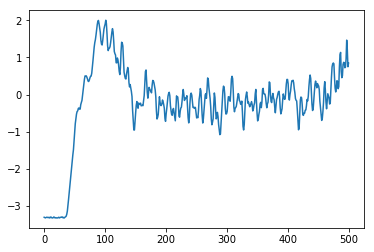

In [306]:
#compare synthetic data to this
plt.plot(df_1_tensor[:500,6])
# dummy2=dummy2.reshape((1,4075,features))
# plt.plot(dummy2[:,:,6])

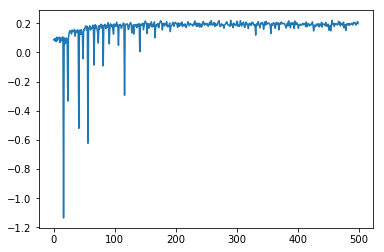

In [307]:
plt.plot(d[:500,6])

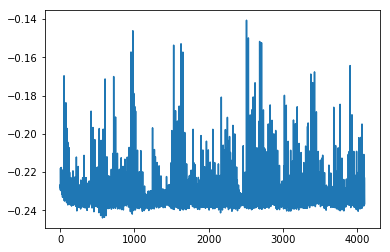

In [351]:
plt.plot(d[:4096,1])

In [279]:
print(d.shape,df_1_tensor.shape)

torch.Size([5000, 7]) torch.Size([4075, 7])


In [292]:
d=d.reshape((1,25000,features))

In [307]:
d=d.reshape((1000,25,7))

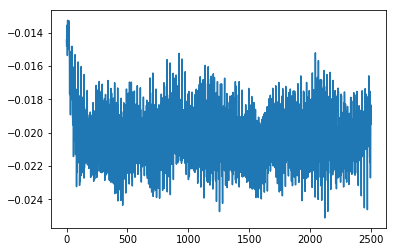

In [65]:
plt.plot(d[:4096,4])

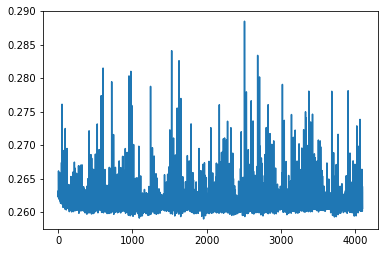

In [303]:
plt.plot(d[0,:4096,4])

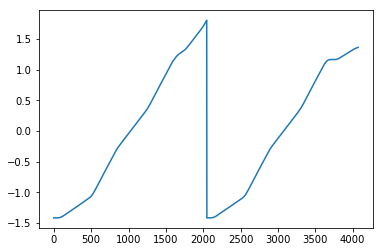

In [304]:
plt.plot(df_1_tensor[:,4])

In [296]:
print(dummy2.shape)

torch.Size([163, 25, 7])


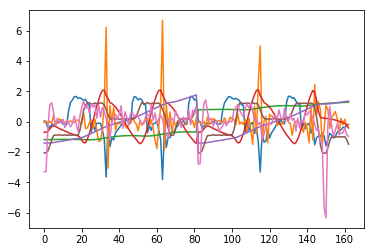

In [295]:
plt.plot(dummy2[:,6])

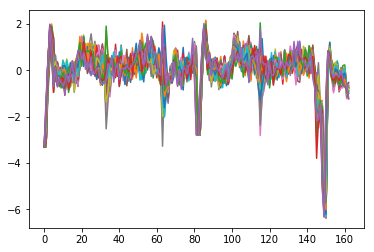

In [298]:
plt.plot(df_1_tensor[:,:,6])

In [299]:
df_1_tensor=df_1_tensor.reshape(4075,7)

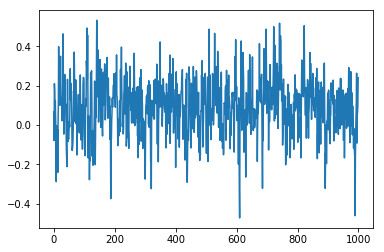

In [50]:
print(plt.plot(z[:,1,0]))

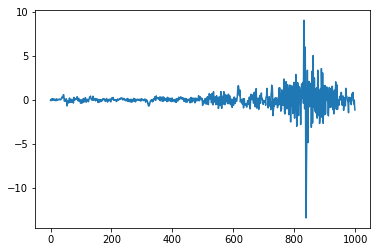

In [134]:
x=StandardScaler().fit_transform(df_1)
plt.plot(x[:1000,1])

In [254]:
for x in model.parameters():
    print(x.grad.shape)

torch.Size([40, 30])
torch.Size([40])
torch.Size([120, 7])
torch.Size([120, 30])
torch.Size([120])
torch.Size([120])
torch.Size([14, 37])
torch.Size([14])
torch.Size([120, 25])
torch.Size([120, 30])
torch.Size([120])
torch.Size([120])


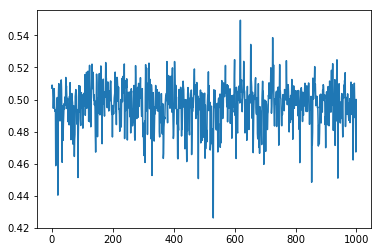

In [243]:
plt.plot(d[:,3,7])

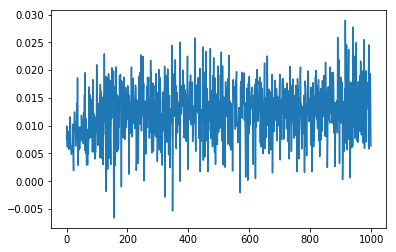

In [222]:
plt.plot(d[:1000,6])

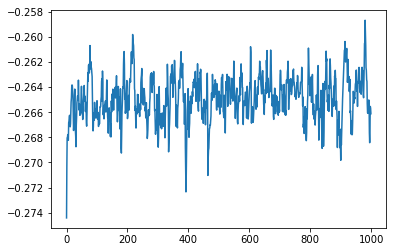

In [94]:
plt.plot(d[:,3,6])


Combined plots

IndexError: index 7 is out of bounds for dimension 2 with size 7

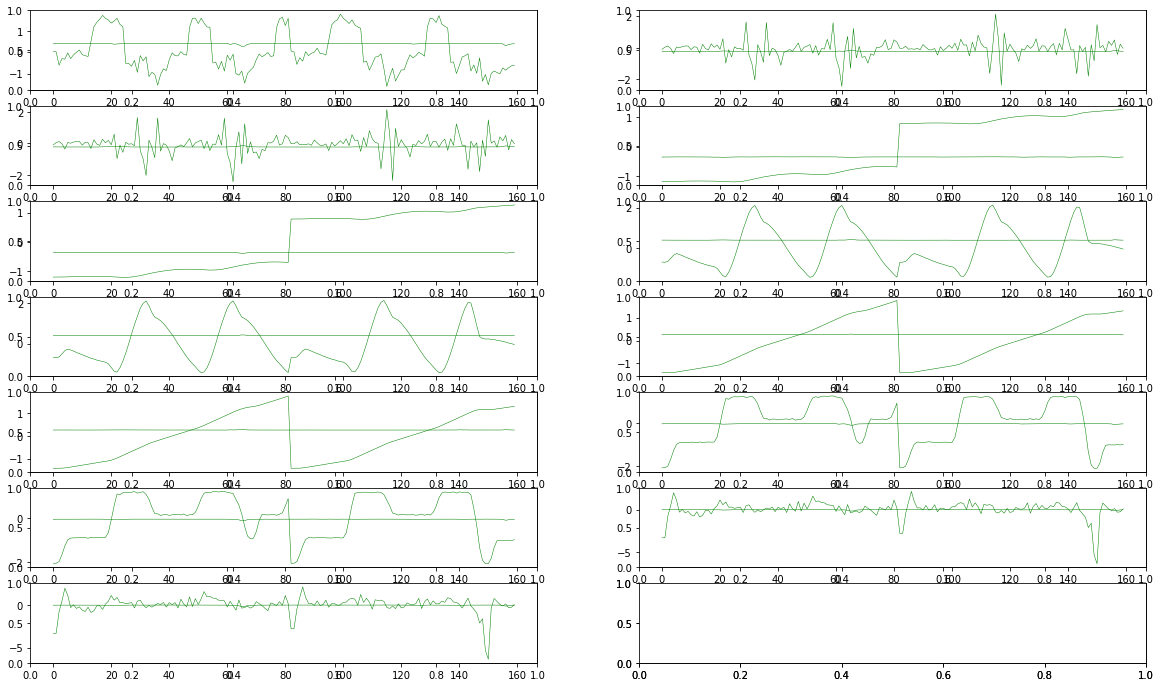

In [311]:
# suits the new dataset, 23 features
fig, axs=plt.subplots(7,2,figsize=(20,12))
feature_required=1
feat=0
for i in range(1,features*2+1):
    fig.add_subplot(7,2,i)
    plt.plot(d[:160,1,feat],  color='green', linewidth=0.5, markersize='0.3')

    fig.add_subplot(7,2,i)
    plt.plot(dummy2[:160,1,feat], color='green', linewidth=0.5, markersize='0.3')
    if(i%2==1):
        feat+=1

In [80]:
print(features)

7


In [79]:
model.parameters

<bound method Module.parameters of Test(
  (encoder): ModuleDict(
    (Linear): Linear(in_features=30, out_features=100, bias=True)
    (Lstm1): LSTM(7, 90)
    (Lstm2): LSTM(90, 60)
    (Lstm3): LSTM(60, 30)
  )
  (decoder): ModuleDict(
    (Linear): Linear(in_features=37, out_features=14, bias=True)
    (Lstm4): LSTM(50, 90)
    (Lstm5): LSTM(90, 60)
    (Lstm6): LSTM(60, 30)
  )
)>

In [273]:
def l2(mu2,logvar2,x):
    torch.pi = torch.acos(torch.zeros(1)).item() * 2
    torch.pi=torch.tensor(torch.pi)
    
    c=torch.log(2*torch.pi)
    b=logvar2
    a= torch.square(x-mu2)/torch.exp(logvar2)
    NLL=0.5*(a+b+c)
    NLL=torch.mean(NLL)
    
    return NLL

In [264]:
logvar1=torch.ones(1)
print(logvar1)
print(torch.square(logvar1))

tensor([1.])
tensor([1.])


In [217]:
for i in range(0,mu1.shape[1]):
    print(i)
#             if(i<5):
#                 #print(mu2[i,:],logvar2[i,:])
#                 KLD=-0.5*torch.mean(logvar1[0,i,:]+1-(torch.exp(logvar1[0,i,:])+torch.square(mu1[0,i,:])))
#                 c=torch.log(2*torch.pi)
#                 b=logvar2[0,i,:]
#                 a= torch.square(x[i,:]-mu2[0,i,:])/torch.exp(logvar2[0,i,:])
#                 NLL=0.5*(a+b+c)
#                 NLL_send+=torch.mean(NLL)+KLD
#             else:
#                 c=torch.log(2*torch.pi)
#                 b=logvar2[0,i,:]
#                 a= torch.square(x[i,:]-mu2[0,i,:])/torch.exp(logvar2[0,i,:])
#                 NLL=0.5*(a+b+c)
#                 NLL_send+=torch.mean(NLL)
                
#     return NLL_send

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


In [214]:
KLD=torch.mean(logvar1+mu1)
print(KLD)

tensor(1.)


In [ ]:
KLD=-0.5*torch.mean(logvar1[0,i,:]+1-(torch.exp(logvar1[0,i,:])+torch.square(mu1[0,i,:])))

In [164]:
mu=torch.zeros(25,7)

In [165]:
print(mu.shape[1])

7


In [219]:
print(df_1_tensor.shape)

torch.Size([4075, 7])


First point all four mu1,logvar1, mu2,logvar2 are important 
Second and Third point Only mu2 and logvar 2 imp as no need of KL divergence
shape[1] of both mu1,logvar1 and mu2,logvar2 will be same i.e., batch size(here 3)

In [123]:
for i in range(0,train_rows//bs):
    print(dummy[i,:,:],dummy[i,:,:].shape)
    print(df_1_tensor[i,:,:],df_1_tensor[i,:,:].shape)

tensor([[-0.0120, -0.0617, -1.1908, -0.7015, -1.4159, -2.0599, -3.3029],
        [ 1.2630,  1.0254, -0.8157,  2.4620, -1.6770, -2.0197,  0.0439],
        [ 1.5392,  1.2266,  0.1581,  0.2065,  1.0434,  0.7250, -1.2824],
        [-1.6442,  1.2057, -0.0817, -0.4334,  0.9340,  1.1890, -1.0088],
        [ 0.1952,  0.3794,  0.8276, -1.2262, -0.2531, -0.0486, -1.3195]]) torch.Size([5, 7])
tensor([[-0.0120, -0.0617, -1.1908, -0.7015, -1.4159, -2.0599, -3.3029],
        [ 0.0507, -0.0968, -1.1908, -0.6878, -1.4159, -2.0679, -3.3117],
        [-0.0202,  0.0439, -1.1908, -0.7070, -1.4159, -2.0518, -3.3206],
        [-0.0112,  0.0790, -1.1908, -0.7125, -1.4159, -2.0679, -3.3117],
        [-0.0630,  0.1142, -1.1908, -0.7070, -1.4159, -2.0639, -3.3029]]) torch.Size([5, 7])
tensor([[-0.0623,  0.1142, -1.1908, -0.7015, -1.4159, -2.0639, -3.3029],
        [-0.2839,  0.3481,  0.7877,  2.5403,  1.0639,  0.8114,  1.5532],
        [-0.9253, -0.4301,  1.3829, -0.0145, -0.6606,  0.2665,  0.2936],
        [-1

tensor([[ 1.5893,  0.0350, -1.1722, -0.8659, -1.1516, -0.8951,  0.2581],
        [ 0.8438, -1.6201, -0.7061, -0.0083,  0.9502, -0.7254, -0.7465],
        [ 0.0789,  0.9543, -1.0837, -0.3954, -1.1507,  0.1018, -0.3182],
        [-1.5624,  0.1022,  0.6463,  0.0034,  1.3287,  0.1369, -0.6848],
        [-0.7338, -0.6315, -1.9159, -1.0867,  0.2966,  0.8321, -0.1819]]) torch.Size([5, 7])
tensor([[ 1.5893,  0.0350, -1.1722, -0.8659, -1.1516, -0.8951,  0.2581],
        [ 1.6382, -0.0671, -1.1723, -0.8632, -1.1510, -0.8789,  0.3717],
        [ 1.5822,  0.0259, -1.1724, -0.8659, -1.1502, -0.8829,  0.3618],
        [ 1.6641, -0.1144, -1.1724, -0.8659, -1.1493, -0.8829,  0.3867],
        [ 1.7242, -0.2335, -1.1725, -0.8742, -1.1485, -0.8789,  0.3235]]) torch.Size([5, 7])
tensor([[ 1.6671, -0.0561, -1.1726, -0.8742, -1.1476, -0.8789,  0.1620],
        [ 0.5903,  0.8288,  0.2890,  0.7778, -1.3844, -1.4772, -0.8586],
        [ 0.0119,  1.4052,  0.8104, -0.2266, -1.4783, -0.2766,  1.3161],
        [-0

          9.0470e-01, -5.7315e-01]]) torch.Size([5, 7])
tensor([[-1.4586,  1.4888, -1.0722,  1.8415, -0.3347,  0.8238,  0.0688],
        [-0.2598,  0.5407, -0.1617,  0.7423,  1.0304,  0.8742, -0.3410],
        [-0.1150,  1.4045,  1.2206, -0.1945, -0.7483, -1.5911, -1.0385],
        [ 0.0060,  0.8825, -0.4362, -0.3692, -0.9086, -1.3726, -0.8959],
        [-0.7236, -0.4281,  1.4665, -0.9679,  0.5420,  0.6580, -0.2646]]) torch.Size([5, 7])
tensor([[-1.4586,  1.4888, -1.0722,  1.8415, -0.3347,  0.8238,  0.0688],
        [-1.1359,  0.2016, -1.0713,  1.8606, -0.3327,  0.8845, -0.0168],
        [-1.2725,  0.3661, -1.0704,  1.8360, -0.3304,  0.8076,  0.0287],
        [-1.4537,  0.6936, -1.0695,  1.8278, -0.3284,  0.8279,  0.3620],
        [-1.8363,  1.9692, -1.0687,  1.8442, -0.3264,  0.7915,  0.2001]]) torch.Size([5, 7])
tensor([[-1.3125, -0.3784, -1.0678,  1.8004, -0.3244,  0.8157,  0.6688],
        [-0.0647, -0.0054, -0.2589,  0.4595,  0.6097, -0.7319, -0.7844],
        [ 1.4913,  0.5587, -

        [-0.4955,  2.0471, -1.6430, -2.2852,  2.2515, -0.7483, -1.5304]]) torch.Size([5, 7])
tensor([[ 1.7022, -0.2972, -0.9394, -1.4387,  0.4185,  0.9694,  0.2715],
        [ 1.5257,  0.1053, -0.9397, -1.4579,  0.4208,  1.0018,  0.0405],
        [ 1.3642,  0.6109, -0.9400, -1.4469,  0.4228,  0.9735,  0.7101],
        [ 1.4507,  0.1980, -0.9402, -1.4359,  0.4251,  1.0260,  0.7579],
        [ 1.5804, -0.4282, -0.9404, -1.4579,  0.4274,  0.9735,  0.9335]]) torch.Size([5, 7])
tensor([[ 1.4023,  0.2485, -0.9407, -1.4633,  0.4294,  1.0301,  1.2287],
        [-0.0773,  1.7026, -0.6008, -0.7631,  0.0727,  0.2104,  1.8828],
        [ 0.6455,  0.4047, -1.0519,  1.0951, -1.6878,  0.5996, -1.1943],
        [-0.1688,  1.4667,  1.0146, -1.8406,  0.3306,  1.4390,  0.8050],
        [ 0.2941,  1.2051, -0.1813,  0.3440, -0.7607,  0.7944, -0.1115]]) torch.Size([5, 7])
tensor([[ 1.4023,  0.2485, -0.9407, -1.4633,  0.4294,  1.0301,  1.2287],
        [ 1.1531,  0.9331, -0.9410, -1.4606,  0.4317,  1.0058,  

        [ 0.9445,  0.3168, -0.3771,  1.0355, -0.8966,  1.4416,  0.3844]]) torch.Size([5, 7])
tensor([[-1.4011,  1.0250, -0.7529,  1.1427,  1.2521, -0.8101, -0.1244],
        [-0.9814, -0.6411, -0.7523,  1.1345,  1.2532, -0.8142, -0.1342],
        [-0.9977, -0.6407, -0.7516,  1.0961,  1.2541, -0.8304, -0.2829],
        [-0.9234, -0.5993, -0.7510,  1.1016,  1.2549, -0.8506, -0.1893],
        [-0.8241, -0.5390, -0.7504,  1.1153,  1.2558, -0.8546, -0.0051]]) torch.Size([5, 7])
tensor([[-0.4516, -1.4727, -0.7498,  1.1153,  1.2566, -0.8668,  0.1101],
        [ 0.4478, -0.7831, -1.3546,  0.5317, -0.9671, -0.8778,  0.3012],
        [-1.1411, -0.1327,  0.8972,  1.1533, -0.2254,  1.1044, -0.4631],
        [-0.2447, -2.1686, -0.1787, -0.0072,  0.2655, -1.4179, -1.2533],
        [ 0.7180, -0.6312,  0.3998,  0.3117, -0.1310,  1.3802,  0.6633]]) torch.Size([5, 7])
tensor([[-0.4516, -1.4727, -0.7498,  1.1153,  1.2566, -0.8668,  0.1101],
        [-1.0597,  0.6377, -0.7492,  1.0879,  1.2575, -0.8708,  

        [ 0.0473, -0.0265,  0.7858, -0.7015, -1.4162, -2.0679, -2.7789]]) torch.Size([5, 7])
tensor([[ 0.0356, -0.0265,  0.7858, -0.6933, -1.4162, -2.0639, -2.7789],
        [-1.3959, -0.8290, -0.8969, -0.2808, -0.1537, -0.0405, -1.5722],
        [-0.2242,  1.5105, -0.8644,  0.0079, -0.3845,  0.5470, -0.4270],
        [ 0.9894, -0.4408,  0.7878, -0.4276,  0.4357, -2.3298, -1.4227],
        [ 0.1121, -1.0974, -2.2140, -0.1310,  3.1656,  0.4333, -0.7053]]) torch.Size([5, 7])
tensor([[ 0.0356, -0.0265,  0.7858, -0.6933, -1.4162, -2.0639, -2.7789],
        [ 0.0548, -0.0617,  0.7858, -0.6988, -1.4162, -2.0639, -2.7789],
        [ 0.0163,  0.0087,  0.7858, -0.7043, -1.4162, -2.0679, -2.7789],
        [ 0.0513, -0.0265,  0.7858, -0.6988, -1.4162, -2.0679, -2.7789],
        [ 0.0030,  0.0087,  0.7858, -0.7043, -1.4162, -2.0639, -2.7878]]) torch.Size([5, 7])
tensor([[ 0.0368, -0.0265,  0.7858, -0.7015, -1.4162, -2.0679, -2.7789],
        [-0.4764, -0.8312, -1.5036,  0.8742, -0.7639, -1.3311, -

        [ 0.8307, -0.3130, -0.6721,  0.0116, -0.0960,  1.3754, -0.4492]]) torch.Size([5, 7])
tensor([[ 1.3593,  0.1747,  0.8055, -0.8331, -1.1680, -0.8829, -0.3059],
        [ 1.4230,  0.0081,  0.8054, -0.8276, -1.1671, -0.8829, -0.3247],
        [ 1.5303, -0.2650,  0.8053, -0.8276, -1.1662, -0.8910, -0.3530],
        [ 1.4449, -0.0514,  0.8053, -0.8413, -1.1654, -0.8991, -0.2209],
        [ 1.3996,  0.2334,  0.8053, -0.8468, -1.1645, -0.8910, -0.0718]]) torch.Size([5, 7])
tensor([[ 1.4236,  0.1272,  0.8052, -0.8385, -1.1637, -0.8910,  0.0603],
        [-1.5997,  0.3750,  0.0229, -0.1785, -1.1792,  1.9155, -1.1154],
        [ 1.5744,  1.1133,  1.7845, -0.8321,  0.3230, -0.7057, -0.1065],
        [-0.7075,  0.6530, -0.2733, -1.6700,  0.4148, -1.5072, -1.4824],
        [-0.6467,  0.5821,  0.2965, -0.3217, -0.0998,  0.9740,  0.3651]]) torch.Size([5, 7])
tensor([[ 1.4236,  0.1272,  0.8052, -0.8385, -1.1637, -0.8910,  0.0603],
        [ 1.5072, -0.1872,  0.8052, -0.8385, -1.1631, -0.8991,  

        [-0.1779, -0.1625,  0.8340,  1.7373, -0.5067,  1.2202,  0.6234]]) torch.Size([5, 7])
tensor([[-0.0928, -0.6500,  0.8349,  1.7154, -0.5044,  1.1797,  0.5372],
        [-0.9621, -0.4976, -1.6256,  0.5007, -2.6813,  0.1695,  0.5677],
        [ 0.4678, -0.4028, -0.2955,  1.2966, -0.3178, -0.9221,  0.9788],
        [-1.1930,  0.4112, -2.0124,  0.4930,  0.0938,  0.3427, -0.5173],
        [ 2.2324, -0.8390, -0.0626, -0.4951,  0.2224, -1.7411, -0.5413]]) torch.Size([5, 7])
tensor([[-0.0928, -0.6500,  0.8349,  1.7154, -0.5044,  1.1797,  0.5372],
        [-0.1980, -0.0031,  0.8357,  1.7647, -0.5021,  1.2202,  0.5345],
        [-0.2678, -0.2767,  0.8366,  1.7209, -0.4995,  1.1797,  0.5674],
        [-0.3154,  0.1887,  0.8374,  1.7538, -0.4972,  1.2242,  0.6535],
        [-0.8424,  1.2516,  0.8382,  1.7428, -0.4949,  1.2040, -0.0185]]) torch.Size([5, 7])
tensor([[-0.2470, -0.4894,  0.8391,  1.7894, -0.4927,  1.2121,  0.0143],
        [-0.1978, -1.1185, -1.0602,  1.4822, -0.8669,  1.5998, -

        [ 0.6739, -0.7827,  1.0541, -0.7399,  0.2179,  0.2010,  0.4100]]) torch.Size([5, 7])
tensor([[ 0.7379, -0.7736,  1.0540, -0.7563,  0.2193,  0.1767, -0.1608],
        [-0.0894, -1.5088,  0.4304,  1.5750, -0.1069, -0.1271, -0.5657],
        [-0.5712,  0.7449,  1.0343,  2.1158,  1.1901, -0.1203, -1.1605],
        [-1.4391, -1.2521,  0.2649,  1.0088, -0.7544, -1.2354,  0.5423],
        [-0.7070, -1.7098, -0.5209,  0.2988,  0.5947, -0.5740,  1.4142]]) torch.Size([5, 7])
tensor([[ 0.7379, -0.7736,  1.0540, -0.7563,  0.2193,  0.1767, -0.1608],
        [ 0.7846, -0.6109,  1.0540, -0.7673,  0.2211,  0.1727, -0.0850],
        [ 0.8698, -0.3617,  1.0540, -0.7673,  0.2225,  0.1686,  0.3117],
        [ 1.0728, -0.7230,  1.0540, -0.7700,  0.2242,  0.1524,  0.3964],
        [ 1.1910, -0.7069,  1.0539, -0.7810,  0.2256,  0.1727,  0.5623]]) torch.Size([5, 7])
tensor([[ 1.0617, -0.1658,  1.0539, -0.7920,  0.2274,  0.1807,  0.6305],
        [-0.5800,  0.1427, -0.0704,  0.2022, -1.0668,  1.4753, -

        [-0.3832, -1.1880,  1.1221,  2.0744,  1.0308,  1.1352,  0.6672]]) torch.Size([5, 7])
tensor([[-0.2300, -1.3269,  1.1230,  2.0744,  1.0331,  1.1150,  0.3621],
        [-0.2385,  0.4553, -0.4538, -0.6790,  0.3446, -1.2374,  0.1574],
        [ 1.0624, -0.7650, -2.5433, -1.4937, -2.1942,  0.0157, -0.5137],
        [ 1.5032, -1.1877,  0.5561,  0.2555,  0.1320, -0.8176,  0.0587],
        [-0.2211, -0.0659, -1.0748,  1.4784,  0.7216,  2.0448, -0.8095]]) torch.Size([5, 7])
tensor([[-0.2300, -1.3269,  1.1230,  2.0744,  1.0331,  1.1150,  0.3621],
        [-0.9626,  0.6923,  1.1240,  2.0086,  1.0354,  1.1150,  0.5669],
        [-0.1286, -1.3971,  1.1250,  2.0634,  1.0377,  1.0948,  0.4020],
        [-0.7892,  0.9600,  1.1259,  2.0579,  1.0400,  1.1029,  0.5945],
        [-0.9155,  0.8525,  1.1268,  2.0059,  1.0422,  1.1231, -0.3553]]) torch.Size([5, 7])
tensor([[-0.9264,  0.8207,  1.1278,  2.0278,  1.0445,  1.0503,  0.0032],
        [ 0.7047, -0.1592,  0.9861,  0.2182,  1.1341,  0.0549,  

        [-0.6236, -0.0679,  1.2611, -0.0384,  1.2928, -1.0124, -0.2215]]) torch.Size([5, 7])
tensor([[-0.9500,  0.9687,  1.2613, -0.0411,  1.2933, -1.0002, -0.2321],
        [ 0.5857,  1.8533,  1.1579, -0.1967, -0.6739,  0.5810,  2.1958],
        [ 0.2986, -0.2875, -1.0267,  0.0804, -1.2785,  0.4354, -1.6912],
        [ 0.8168,  2.3514,  0.7937, -1.7749,  0.7620,  0.6684, -0.4688],
        [ 0.2051, -0.6845, -1.7036, -0.2595,  0.8361, -0.2349,  0.7535]]) torch.Size([5, 7])
tensor([[-0.9500,  0.9687,  1.2613, -0.0411,  1.2933, -1.0002, -0.2321],
        [-0.9964,  0.8268,  1.2616, -0.0247,  1.2942, -1.0083, -0.1723],
        [-0.6812, -0.4430,  1.2618, -0.0356,  1.2951, -1.0002, -0.1208],
        [-0.6664, -0.5980,  1.2620, -0.0493,  1.2956, -0.9921, -0.1320],
        [-0.7880, -0.0254,  1.2622, -0.0493,  1.2965, -1.0083, -0.1426]]) torch.Size([5, 7])
tensor([[-0.7829,  0.1135,  1.2625, -0.0466,  1.2971, -1.0043, -0.2242],
        [-0.9947,  0.1467,  0.2178, -0.2040, -0.7954,  0.6584,  

Trying to check parts of the decoder to see why synthetic data is scalling down so much

In [542]:
x=torch.tensor([[1,3,4,5,6]])
print(x,x.shape)
z=x.reshape([1,1,5])
print(x,x.shape)
print(z,z.shape)

tensor([[1, 3, 4, 5, 6]]) torch.Size([1, 5])
tensor([[1, 3, 4, 5, 6]]) torch.Size([1, 5])
tensor([[[1, 3, 4, 5, 6]]]) torch.Size([1, 1, 5])


In [440]:
for x in df_1_tensor:
    print(x,x.shape)

tensor([[-0.0120, -0.0617, -1.1908,  ..., -1.4159, -2.0599, -3.3029],
        [ 0.0507, -0.0968, -1.1908,  ..., -1.4159, -2.0679, -3.3117],
        [-0.0202,  0.0439, -1.1908,  ..., -1.4159, -2.0518, -3.3206],
        ...,
        [-0.2903, -0.0943,  1.2799,  ...,  1.3636, -1.9547, -0.8204],
        [-0.3155, -0.0960,  1.2799,  ...,  1.3636, -1.9587, -0.8603],
        [-0.3339, -0.0274,  1.2799,  ...,  1.3636, -1.9709, -0.8643]]) torch.Size([4095, 7])


In [85]:
print(bot_nodes+noise)

25


In [848]:
print(d.shape)

torch.Size([1000, 5, 7])


In [290]:
plt.plot(d[:,30])

IndexError: index 30 is out of bounds for dimension 1 with size 5

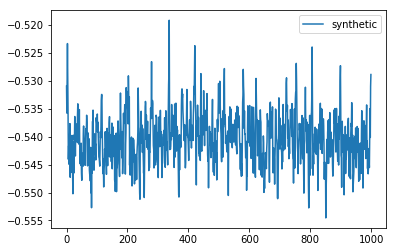

In [136]:
plt.plot(d[:,var ,0], label="synthetic")
plt.legend()

In [295]:
print(df_1_tensor.shape)
# plt.plot(df_1_tensor[1,:,0], label="real")
# plt.legend()

torch.Size([4095, 7])


Synthetic data values tensor(0.1830) tensor(-0.2988)
i/p scaled value tensor(1.9315) tensor(-5.0201)
Synthetic data values tensor(0.1590) tensor(-0.1555)
i/p scaled value tensor(7.3221) tensor(-11.8786)
Synthetic data values tensor(0.8045) tensor(-0.1663)
i/p scaled value tensor(1.2799) tensor(-1.2005)
Synthetic data values tensor(0.2615) tensor(-0.2343)
i/p scaled value tensor(2.1347) tensor(-1.4633)
Synthetic data values tensor(0.7637) tensor(-0.1300)
i/p scaled value tensor(1.7989) tensor(-1.4162)
Synthetic data values tensor(0.3278) tensor(-0.3526)
i/p scaled value tensor(1.2727) tensor(-2.0922)
Synthetic data values tensor(0.1815) tensor(-0.3012)
i/p scaled value tensor(2.1404) tensor(-6.3708)


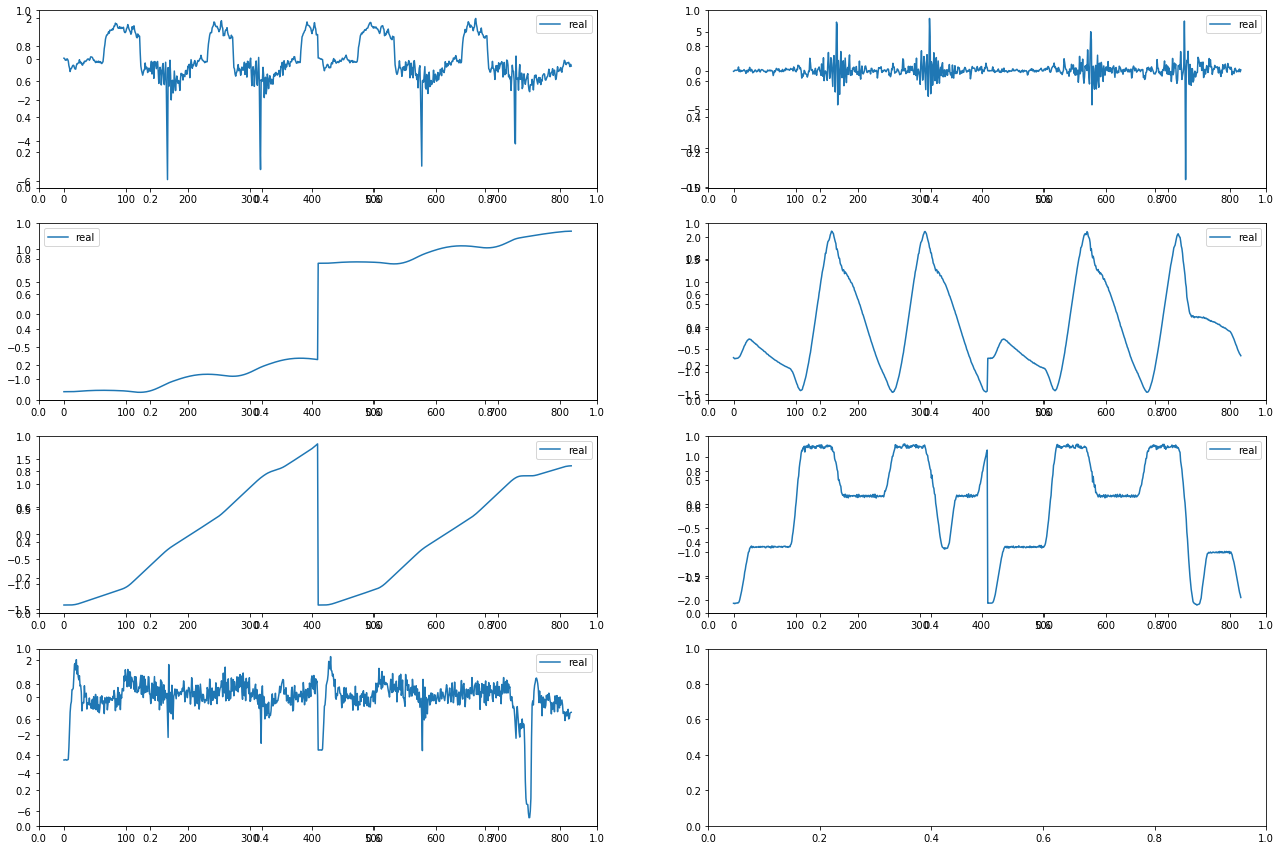

In [142]:
fig, axs=plt.subplots(4,2,figsize=(22,15))

for i in range(0,7):
    print("Synthetic data values",torch.max(d[:,0,i]), torch.min(d[:,0,i]))
    print("i/p scaled value",torch.max(df_1_tensor[:,0,i]), torch.min(df_1_tensor[:,0,i]))
    fig.add_subplot(4,2,i+1)
#     plt.plot(d[:,0,i], label="synthetic")
#     plt.legend()
    plt.plot(df_1_tensor[:,1,i], label="real")
    plt.legend()

Got some generative time series data
By using only part 1

In [158]:
#Not bad but then data doesnt go as a batch in the neural network
for j in range(0, x.shape[0]):
            
            print(j)
            print(x[j,:].shape,x[j,:])
            
            if(j==0):
                mu2,logvar2,mu1,logvar1=model(x)
                loss=loss_function(mu2,logvar2,mu1,logvar1,x)
                train_loss+=loss.item()
                loss.backward()
                optimizer.step()
                #lossses.append(train_loss)
            elif(j==1 or j==2):
                mu2,logvar2,mu1,logvar1=model(x)
                loss=l2(mu2,logvar2,x)
                train_loss+=loss.item()
                loss.backward()
                optimizer.step()
                #lossses.append(train_loss)

0
torch.Size([7]) tensor([-0.2903, -0.0943,  1.2799, -0.6495,  1.3636, -1.9547, -0.8204])
1
torch.Size([7]) tensor([-0.3155, -0.0960,  1.2799, -0.6577,  1.3636, -1.9587, -0.8603])
2
torch.Size([7]) tensor([-0.3339, -0.0274,  1.2799, -0.6632,  1.3636, -1.9709, -0.8643])


Big issue needs to be solved, assignment of one tensor to another....and then when we make change to the second tensor first one shouldnt change...solved this using numpy---working with single dimensions atleast, yes higher too actually

In [737]:
x=torch.tensor([[1,2,3],[3,4,6]])
print(x)
x_num=x.numpy()
print(x_num)

tensor([[1, 2, 3],
        [3, 4, 6]])


In [739]:
y=torch.tensor(x_num)
print(y)

tensor([[1, 2, 3],
        [3, 4, 6]])


In [308]:
print(df_1_tensor.shape)

torch.Size([819, 5, 7])


In [322]:
#tensor with variable size
x=torch.zeros([163,5,7])
y=torch.ones([1,5,7])
for i in range(0,x.shape[0]):
    x[i,:,:]=y

In [323]:
print(x.shape,x)

torch.Size([163, 5, 7]) tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        ...,

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1

# Play around with data

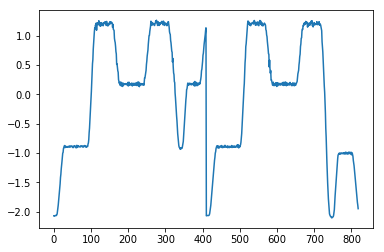

In [321]:
plt.plot(df_1_tensor[:,1,5])
#5 points of the zeroth feature value

In [740]:
x[0]=torch.tensor([0,0,0.])
print("x",x,"y\n",y)

x tensor([[0, 0, 0],
        [3, 4, 6]]) y
 tensor([[1, 2, 3],
        [3, 4, 6]])


Now trying for the bigger tensor---This defnitely works, the two are in no way related to each other---will try to variables one with and one without noise

In [755]:
print(df_1_tensor,df_1_tensor.shape)

tensor([[[-0.0120, -0.0617, -1.1908,  ..., -1.4159, -2.0599, -3.3029],
         [-0.2550,  0.5078, -0.1327,  ...,  1.0565, -0.6561,  1.1402],
         [ 0.7857,  1.6182, -1.8499,  ..., -0.9583,  1.1355, -0.3579],
         [-1.3136, -0.9168, -1.5300,  ...,  0.3006, -1.2662,  0.1421],
         [ 0.9138,  0.9545,  0.6509,  ..., -2.8167,  0.4986,  0.2764]],

        [[-0.0623,  0.1142, -1.1908,  ..., -1.4159, -2.0639, -3.3029],
         [-0.7628,  1.0313, -0.4294,  ..., -0.5231,  1.4509, -1.9403],
         [ 1.1798, -1.2915, -0.0193,  ..., -0.1877, -1.6987, -0.4174],
         [-1.4933,  0.8581,  2.4090,  ...,  0.1104, -0.3349, -0.3508],
         [-0.7932, -0.1725, -0.8220,  ..., -0.5116,  0.5397, -2.3169]],

        [[-0.0083,  0.0439, -1.1908,  ..., -1.4159, -2.0639, -3.3117],
         [ 0.0548,  1.1812,  1.3330,  ..., -0.2233,  0.2342, -0.9133],
         [-0.5180,  2.1139,  0.4509,  ..., -2.1210, -0.7823, -0.6751],
         [-1.3560, -0.1789, -1.2314,  ..., -0.9348,  0.7375, -1.4596],
  

In [756]:
df1num=np.array(df_1_tensor)
print(df1num,df1num.shape)

[[[-0.01204835 -0.06166188 -1.1908271  ... -1.4158878  -2.05986
   -3.3028686 ]
  [-0.2550272   0.5077894  -0.13273987 ...  1.0565128  -0.6561487
    1.1401693 ]
  [ 0.78571564  1.6182418  -1.8499067  ... -0.9583181   1.1354827
   -0.35791275]
  [-1.3136399  -0.9167991  -1.529979   ...  0.30064577 -1.2662476
    0.14210711]
  [ 0.91383845  0.9545339   0.650876   ... -2.8166695   0.49862787
    0.27641383]]

 [[-0.06232953  0.11421632 -1.1908271  ... -1.4158878  -2.0639043
   -3.3028686 ]
  [-0.76277024  1.0312669  -0.4293691  ... -0.52310395  1.4509197
   -1.9403043 ]
  [ 1.1797528  -1.2915188  -0.01925105 ... -0.18771075 -1.698677
   -0.41741306]
  [-1.4932879   0.85806686  2.4090157  ...  0.11037698 -0.33489394
   -0.35079578]
  [-0.7932342  -0.17247912 -0.82200855 ... -0.5115598   0.539686
   -2.3169143 ]]

 [[-0.00830996  0.04386504 -1.1908271  ... -1.4158878  -2.0639043
   -3.3117447 ]
  [ 0.05479927  1.1811948   1.3329774  ... -0.22332743  0.23418112
   -0.9132689 ]
  [-0.517996 

In [757]:
df1mod=torch.tensor(df1num)

In [758]:
print(df1mod,df1mod.shape)

tensor([[[-0.0120, -0.0617, -1.1908,  ..., -1.4159, -2.0599, -3.3029],
         [-0.2550,  0.5078, -0.1327,  ...,  1.0565, -0.6561,  1.1402],
         [ 0.7857,  1.6182, -1.8499,  ..., -0.9583,  1.1355, -0.3579],
         [-1.3136, -0.9168, -1.5300,  ...,  0.3006, -1.2662,  0.1421],
         [ 0.9138,  0.9545,  0.6509,  ..., -2.8167,  0.4986,  0.2764]],

        [[-0.0623,  0.1142, -1.1908,  ..., -1.4159, -2.0639, -3.3029],
         [-0.7628,  1.0313, -0.4294,  ..., -0.5231,  1.4509, -1.9403],
         [ 1.1798, -1.2915, -0.0193,  ..., -0.1877, -1.6987, -0.4174],
         [-1.4933,  0.8581,  2.4090,  ...,  0.1104, -0.3349, -0.3508],
         [-0.7932, -0.1725, -0.8220,  ..., -0.5116,  0.5397, -2.3169]],

        [[-0.0083,  0.0439, -1.1908,  ..., -1.4159, -2.0639, -3.3117],
         [ 0.0548,  1.1812,  1.3330,  ..., -0.2233,  0.2342, -0.9133],
         [-0.5180,  2.1139,  0.4509,  ..., -2.1210, -0.7823, -0.6751],
         [-1.3560, -0.1789, -1.2314,  ..., -0.9348,  0.7375, -1.4596],
  

In [760]:
df1mod[0,0,2]=1
print(df1mod,df_1_tensor)

tensor([[[ 1.0000, -0.0617,  1.0000,  ..., -1.4159, -2.0599, -3.3029],
         [-0.2550,  0.5078, -0.1327,  ...,  1.0565, -0.6561,  1.1402],
         [ 0.7857,  1.6182, -1.8499,  ..., -0.9583,  1.1355, -0.3579],
         [-1.3136, -0.9168, -1.5300,  ...,  0.3006, -1.2662,  0.1421],
         [ 0.9138,  0.9545,  0.6509,  ..., -2.8167,  0.4986,  0.2764]],

        [[-0.0623,  0.1142, -1.1908,  ..., -1.4159, -2.0639, -3.3029],
         [-0.7628,  1.0313, -0.4294,  ..., -0.5231,  1.4509, -1.9403],
         [ 1.1798, -1.2915, -0.0193,  ..., -0.1877, -1.6987, -0.4174],
         [-1.4933,  0.8581,  2.4090,  ...,  0.1104, -0.3349, -0.3508],
         [-0.7932, -0.1725, -0.8220,  ..., -0.5116,  0.5397, -2.3169]],

        [[-0.0083,  0.0439, -1.1908,  ..., -1.4159, -2.0639, -3.3117],
         [ 0.0548,  1.1812,  1.3330,  ..., -0.2233,  0.2342, -0.9133],
         [-0.5180,  2.1139,  0.4509,  ..., -2.1210, -0.7823, -0.6751],
         [-1.3560, -0.1789, -1.2314,  ..., -0.9348,  0.7375, -1.4596],
  

In [203]:
x=torch.tensor([2,3,4])
print(x)
g=torch.tensor([7,8,9])
g=torch.stack((x,g))
print(g)
g=g.reshape()

tensor([2, 3, 4])
tensor([[2, 3, 4],
        [7, 8, 9]])


In [193]:
x = torch.Tensor(46, 300)
print(x.size()) #torch.Size([46, 300])

first_half = x[0:20, :]
second_half = x[20:, :]
new_row = torch.Tensor(1, 300)
new_x = torch.cat(first_half, new_row, second_half)

print(new_x.size())

torch.Size([46, 300])


TypeError: cat() received an invalid combination of arguments - got (Tensor, Tensor, Tensor), but expected one of:
 * (tuple of Tensors tensors, name dim, *, Tensor out)
 * (tuple of Tensors tensors, int dim, *, Tensor out)


In [219]:
# x=torch.tensor([2,3,4])
# g=torch.tensor([7,8,9])
# h=torch.tensor([10,11,12])
# mu1=torch.stack((x,g))
# print(mu1)
print(mu1[0])


tensor([2, 3, 4])


In [278]:
z=torch.randn([2,2048,7])
d,_=model.decoder['Lstm'](z)
d=model.decoder['Linear'](d)
mu2=d[:,:,0:features]
logvar2=d[:,:,features:features*2]
d=model.getsample(mu2,logvar2)
print(d,d.shape)

tensor([[[ 0.0720,  0.0498, -0.1134,  ..., -0.0675, -0.0026,  0.1664],
         [ 0.1150,  0.0621, -0.0257,  ...,  0.0689,  0.0421,  0.2440],
         [ 0.0323,  0.0420, -0.0845,  ..., -0.0130,  0.0537,  0.1601],
         ...,
         [ 0.0288,  0.0369, -0.0566,  ...,  0.0241,  0.0227,  0.1735],
         [ 0.1110,  0.0536, -0.0079,  ...,  0.1281,  0.1259,  0.2676],
         [ 0.0956,  0.0871, -0.1268,  ..., -0.0339,  0.0532,  0.2148]],

        [[ 0.0418,  0.0469, -0.1356,  ..., -0.1297, -0.0650,  0.1256],
         [ 0.1225,  0.1214, -0.0322,  ...,  0.1111,  0.0899,  0.2368],
         [ 0.0321,  0.0427, -0.0315,  ...,  0.0966,  0.0690,  0.1854],
         ...,
         [ 0.0015,  0.0277, -0.0783,  ..., -0.0150, -0.0299,  0.1684],
         [ 0.0833,  0.0535, -0.0227,  ...,  0.1046,  0.1154,  0.2368],
         [ 0.1375,  0.1049, -0.0900,  ..., -0.0105,  0.0602,  0.2379]]],
       grad_fn=<SliceBackward>) torch.Size([2, 2048, 7])


torch.Size([1, 1500, 7])
tensor(0.6700) tensor(-0.8003)
tensor(0.2219) tensor(-0.2105)
tensor(1.0735) tensor(-1.5043)
tensor(1.0019) tensor(-0.9701)
tensor(1.2065) tensor(-1.8157)
tensor(1.0333) tensor(-1.7283)
tensor(0.4212) tensor(-0.7463)


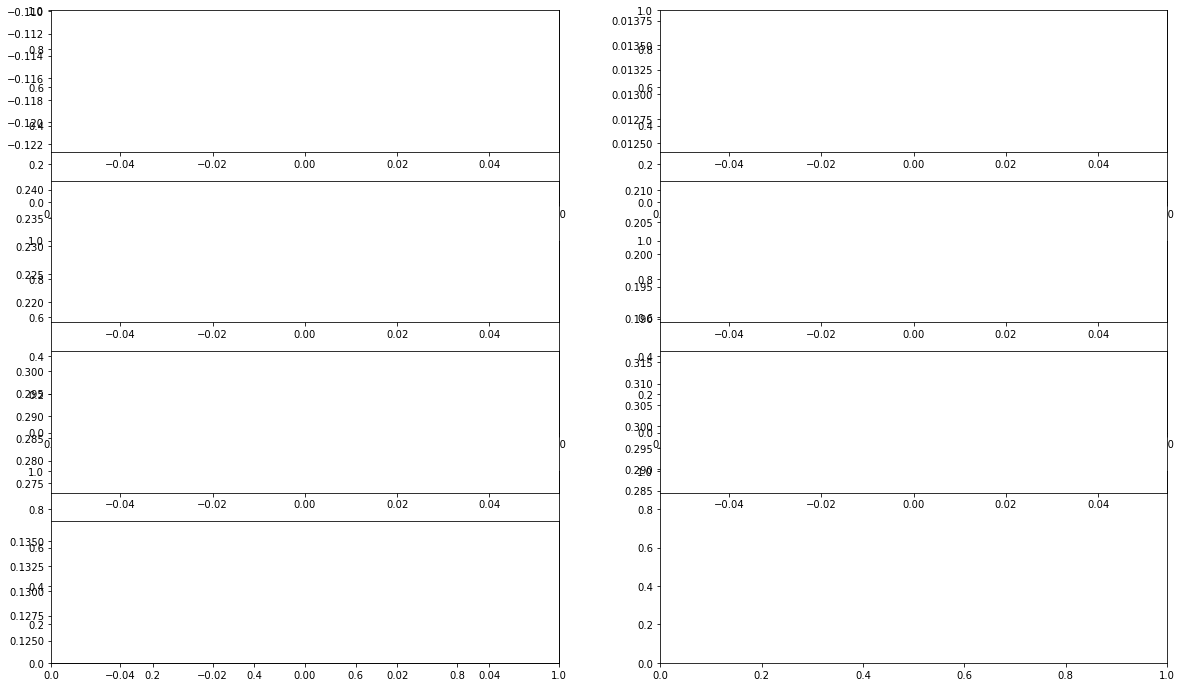

In [602]:
#plt.plot(d[0,:,3].detach().numpy())
print(d.shape)
fig, axs=plt.subplots(3,2,figsize=(20,12))
print(torch.max(d[0,:,0]), torch.min(d[0,:,0]))
print(torch.max(d[0,:,1]), torch.min(d[0,:,1]))
print(torch.max(d[0,:,2]), torch.min(d[0,:,2]))
print(torch.max(d[0,:,3]), torch.min(d[0,:,3]))
print(torch.max(d[0,:,4]), torch.min(d[0,:,4]))
print(torch.max(d[0,:,5]), torch.min(d[0,:,5]))
print(torch.max(d[0,:,6]), torch.min(d[0,:,6]))
fig.add_subplot(4,2,1)
plt.plot(d[:,0,0].detach().numpy())

fig.add_subplot(4,2,2)
plt.plot(d[:,0,1].detach().numpy())

fig.add_subplot(4,2,3)
plt.plot(d[:,0,2].detach().numpy())

fig.add_subplot(4,2,4)
plt.plot(d[:,0,3].detach().numpy())
fig.add_subplot(4,2,5)
plt.plot(d[:,0,4].detach().numpy())
fig.add_subplot(4,2,6)
plt.plot(d[:,0,5].detach().numpy())
fig.add_subplot(4,2,7)
plt.plot(d[:,0,6].detach().numpy())

In [1319]:
x = torch.arange(4.0)
x.requires_grad_(True)
# x.grad
print(x)

tensor([0., 1., 2., 3.], requires_grad=True)


In [1322]:
y = 2 * torch.dot(x, x)#after differentiation 2x^3 becomes 6x^2
print(y)

tensor(28., grad_fn=<MulBackward0>)


In [1298]:
y.backward()
print(x.grad)

RuntimeError: Trying to backward through the graph a second time, but the saved intermediate results have already been freed. Specify retain_graph=True when calling backward the first time.

In [1297]:
print(x.detach())

tensor([0., 1., 2., 3.])


In [1287]:
p=x+2
print(p.detach())

tensor([2., 3., 4., 5.])


In [ ]:
x=torch.tensor([1,2,3])
y=torch.tensor([4,5,6])

In [1315]:
z=x+y
print(z)
z=torch.sum(x+y) #use in loss functions to find gradient
print(z)

tensor([[71.9880, 71.9383, 70.8089, 71.2986, 70.5846, 69.9415, 68.7006],
        [72.0507, 71.9031, 70.8089, 71.3123, 70.5846, 69.9334, 68.6917]],
       grad_fn=<AddBackward0>)
tensor(990.5453, grad_fn=<SumBackward0>)


Now using the list of scal_objs that I made in phase 2 to rescale the synthetic data

In [ ]:
fig, axs=plt.subplots(3,2,figsize=(20,12))

y_inv=y1.inverse_transform(y)
print(y_inv)
fig.add_subplot(4,2,1)
plt.plot(d[0,:,0].detach().numpy())

fig.add_subplot(4,2,2)
plt.plot(d[0,:,1].detach().numpy())

fig.add_subplot(4,2,3)
plt.plot(d[0,:,2].detach().numpy())

fig.add_subplot(4,2,4)
plt.plot(d[0,:,3].detach().numpy())
fig.add_subplot(4,2,5)
plt.plot(d[0,:,4].detach().numpy())
fig.add_subplot(4,2,6)
plt.plot(d[0,:,5].detach().numpy())
fig.add_subplot(4,2,7)
plt.plot(d[0,:,6].detach().numpy())

In [331]:
print(d,d.shape)

tensor([[[0.7418, 0.6198, 0.4753,  ..., 0.4379, 0.6147, 0.7446],
         [0.7461, 0.6252, 0.4817,  ..., 0.4691, 0.6341, 0.7654],
         [0.7464, 0.6212, 0.4867,  ..., 0.4567, 0.6263, 0.7496],
         ...,
         [0.7463, 0.6202, 0.4702,  ..., 0.4577, 0.6225, 0.7381],
         [0.7522, 0.6169, 0.4855,  ..., 0.4546, 0.6274, 0.7521],
         [0.7519, 0.6183, 0.4739,  ..., 0.4392, 0.6221, 0.7438]],

        [[1.0129, 0.8047, 0.6787,  ..., 0.5703, 0.8750, 0.9742],
         [0.9726, 0.7844, 0.6702,  ..., 0.5440, 0.8429, 0.9444],
         [0.9986, 0.7998, 0.6151,  ..., 0.5927, 0.8274, 0.9391],
         ...,
         [1.0114, 0.8284, 0.6476,  ..., 0.5542, 0.8433, 0.9721],
         [1.0185, 0.8150, 0.6870,  ..., 0.5534, 0.8681, 0.9584],
         [1.0068, 0.8226, 0.6757,  ..., 0.5376, 0.8626, 0.9653]]]) torch.Size([2, 2048, 7])


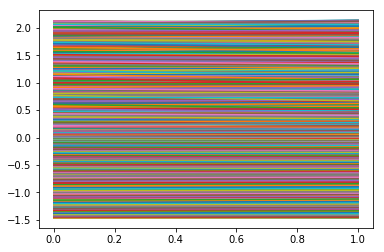

In [765]:
for x in df_1_tensor:
    plt.plot(x[:10,3])

In [277]:
print(df_1_tensor.shape)

torch.Size([2, 2048, 7])


In [570]:
-----not using because shouldnt include in the main function directly
def loss_function2(mu2,logvar2,mu1,logvar1,x,z,seq_len):
    torch.pi = torch.acos(torch.zeros(1)).item() * 2
    torch.pi=torch.tensor(torch.pi)
#     BCE=nn.functional.nll_loss( #trying MSE loss
#         x_hat, x.view(-1,7), reduction='sum'
#     )
#     Log probability: 
#         log(p(x | \mu, \sigma)) = -0.5 (\log(2\pi) + (x-mu)^2/\sigma^2 + \log(\sigma^2))
##using my custom negative log likelihood funciton
    KLD= 0.5 * torch.sum(logvar1.exp() - logvar1 - 1 + mu1.pow(2)) ## the KL divergence is wrt a Normal distribution ~N(0,1)
    NLL=-0.5*torch.sum(torch.log(2*torch.pi) + torch.square(x-mu2)/logvar2.exp()+logvar2)
    MSE=torch.sum((x-z)**2)/4096 ##MSE & L1 cant be calculated when dimension of bottleneck and i/p different?? # try mean squred error b/w o/p and i/p
    L1=torch.sum(x-z)/4096##MSE & L1 cant be calculated when dimension of bottleneck and i/p different??
    
    return NLL+KLD+MSE+L1

In [841]:
##making an LSTM to understand
##Made the whole thing, atleast I can say that I embedded an LSTM into the network somehow with a linear layer using dictionaries
class Test_linear(nn.Module):
    def __init__(self,n_features, var, bottleneck_nodes):
        super().__init__()

        self.n_features, self.var=n_features,var
        self.bot_nodes=bottleneck_nodes
        ##took me a fill evenings and frustration, LSTM always takes 3 dimesions, let the first one be 1
        self.encoder=nn.ModuleDict({
            'Lstm':nn.LSTM(
                input_size=self.n_features,
                hidden_size=self.var,
            ),
            #'Linear':nn.Linear(self.var, self.bot_nodes*2)# Can vary the bottle neck
            'Linear':nn.Linear(self.n_features, self.bot_nodes*2) 
        })
        
        
        self.decoder=nn.ModuleDict({
            'Lstm':nn.LSTM(
                input_size=self.bot_nodes,
                hidden_size=self.var*2
            ),
            #'Linear':nn.Linear(self.var*2,self.n_features*2),
            'Linear':nn.Linear(self.bot_nodes,self.n_features*2),
            'Logsoftmax':nn.LogSoftmax(dim=1),
            'Relu':nn.ReLU()
        })
    def getsample(self, mu, logvar):
        if self.training: #inbuilt object which according to me is inherited from nn.Module
            stan_dev=logvar.mul(0.5).exp_()
            eps = stan_dev.data.new(stan_dev.size()).normal_() #acually epsilon is form normal dis table, sample is the whole Mew+X*sigma
            return eps.mul(stan_dev).add_(mu) #Mew+X*sigma
        else:
            return mu
        
    def forward(self,x):
        length=x.shape[0]  #to get seq_len
##         x=x.reshape((1, length, self.n_features))# batch sends the whole things, not using SGD,
##         x,_=self.encoder['Lstm'](x)
        mu_logvar=self.encoder['Linear'](x)
        #a leap of faith, for knowing how mu is [:0:] and logvar[:1:], actually just a bunch of the outputs 
        #taken as mean and variance
#        mu1=mu_logvar[:, 0:self.bot_nodes]# dimension at mu_logvar1/bottleneck               
#        logvar1 = mu_logvar[:, self.bot_nodes:self.bot_nodes*2]
        mu1=torch.zeros([length, self.bot_nodes])
        logvar1=torch.zeros([length, self.bot_nodes])
        z=self.getsample(mu1,logvar1)#need to feed this to the decoder
        sample=z
        #reshape it into (hidden_dim x features)
#        z=z.reshape((1, length, self.n_features)) #dont need the reshape anymore
##        z,_=self.decoder['Lstm'](z)
#         #z=z.reshape((1, self,self.var*2))
        z=self.decoder['Linear'](z)
#         ##tried log softmax as it woud
##         mu2=z[:,:,0:self.n_features]
##         logvar2=z[:,:,self.n_features:self.n_features*2]
        mu2=z[:,0:self.n_features]
        logvar2=z[:,self.n_features:self.n_features*2]
#       z=self.getsample(mu1,logvar1)----no need to remove sample frm here, just train your model for now
        return mu2,logvar2,mu1,logvar1,sample
#mu2,logvar2,mu1,logvar1
#if problem
#1) Put relu b/w LSTM and linear---actually didnt need this

In [129]:
learn_rate=1e-2

optimizer=torch.optim.Adam(
    model.parameters(), lr=learn_rate
)

In [692]:
x=torch.randn([1,4096,7])
print(x,x.shape)

tensor([[[ 0.8588,  0.1028,  1.3900,  ...,  1.6402, -0.9904, -0.9302],
         [-0.0924, -0.5425, -0.3662,  ..., -0.9536,  2.0797,  0.1030],
         [-0.7861, -0.2490, -0.2844,  ..., -0.8047, -0.9104, -0.3121],
         ...,
         [ 1.6608,  0.1600,  0.4497,  ...,  0.7742,  0.1854,  1.5732],
         [ 1.4374,  0.4375,  0.0625,  ..., -1.3812, -0.0793, -0.5508],
         [-0.3060,  0.5479, -1.4583,  ..., -0.2024, -0.4486,  1.2817]]]) torch.Size([1, 4096, 7])


In [274]:
---warning----Data augmentation
test_tensor=torch.cat((test_tensor,test_tensor),dim=1)
print(test_tensor.shape)

torch.Size([1, 4096, 7])


# Loss function

# Optimizer

In [452]:
torch.save(model.state_dict(),'Models/LSTM_gen.pt')

In [455]:
model=torch.load('Models/LSTM_gen.pt')
print(model)

OrderedDict([('encoder.Linear.weight', tensor([[-0.3197, -0.2717, -0.3059, -0.2254,  0.0132],
        [-0.2364, -0.3116, -0.2791,  0.4120,  0.1102],
        [ 0.3762,  0.0054,  0.2408, -0.0485, -0.0199],
        [ 0.4124, -0.3436,  0.0556,  0.2716,  0.2324],
        [-0.1121,  0.1758,  0.4116, -0.1358,  0.4241],
        [-0.4115, -0.2806,  0.0482, -0.0103,  0.1019],
        [-0.2244, -0.0009,  0.2842,  0.3408, -0.2466],
        [ 0.3682,  0.0309, -0.0557,  0.0273,  0.0714],
        [-0.1451,  0.3588,  0.0457, -0.0834, -0.3380],
        [ 0.3133,  0.4334, -0.1484, -0.2797,  0.2486],
        [-0.1441,  0.4166, -0.2707, -0.0372,  0.1374],
        [-0.1468, -0.4193,  0.1953,  0.3919,  0.1772],
        [-0.2775, -0.1315,  0.2390,  0.0790, -0.2139],
        [ 0.1555,  0.3611,  0.3226,  0.1593,  0.2905]])), ('encoder.Linear.bias', tensor([-0.4409,  0.4342, -0.1692,  0.4274,  0.2394, -0.1468, -0.4197, -0.3479,
         0.3317, -0.2691, -0.0605, -0.1479,  0.3612, -0.1262])), ('encoder.Lstm.weig

###Rough functions down here to try things-------------------------

In [336]:
z=model(train_tensor)
# print(z[0][1])
# print(z[0][2])
print(z)

tensor([[[-0.0687,  0.0013, -0.0810, -0.1751,  0.1277, -0.0199,  0.0486],
         [-0.1124,  0.0316, -0.1189, -0.2254,  0.1410, -0.0015,  0.1574]]],
       grad_fn=<AddBackward0>)


In [417]:
input = torch.randn(3, 5, requires_grad=True)
print("input",input,"\ntarget",target)
# each element in target has to have 0 <= value < C
target = torch.tensor([1, 0, 4])
for i in range(0,10):
    m = nn.LogSoftmax(dim=1)
    loss = nn.NLLLoss()
    # input is of size N x C = 3 x 5
    output = loss(m(input), target)
    output.backward()
    print(output)

input tensor([[-0.5259, -1.6496, -0.2864, -0.1286,  0.5365],
        [ 0.8059,  1.3167, -0.6429, -0.8907,  1.3061],
        [ 0.1449, -0.3187, -0.0588, -0.4818,  0.7496]], requires_grad=True) 
target tensor([1, 0, 4])
tensor(1.8623, grad_fn=<NllLossBackward>)
tensor(1.8623, grad_fn=<NllLossBackward>)
tensor(1.8623, grad_fn=<NllLossBackward>)
tensor(1.8623, grad_fn=<NllLossBackward>)
tensor(1.8623, grad_fn=<NllLossBackward>)
tensor(1.8623, grad_fn=<NllLossBackward>)
tensor(1.8623, grad_fn=<NllLossBackward>)
tensor(1.8623, grad_fn=<NllLossBackward>)
tensor(1.8623, grad_fn=<NllLossBackward>)
tensor(1.8623, grad_fn=<NllLossBackward>)


In [613]:
test_tensor.add

TypeError: add() received an invalid combination of arguments - got (), but expected (Tensor other, *, Number alpha)

In [290]:
adder1=torch.randn([1,2048,7])
adder2=torch.randn([1,2048,7])

In [292]:
loss=nn.MSELoss(size_average=None, reduce=None, reduction: str = 'mean')
x=loss(adder1,adder2)

SyntaxError: invalid syntax (<ipython-input-292-3a2e44abc981>, line 1)

In [617]:
a=torch.tensor([1,1,1])
b=torch.tensor([2,2,2])

In [629]:
for i in range(0,a.shape[0]):
    x=nn.L1Loss(a[i],b[i],reduction='mean')
    print(x.zero_grad)

<bound method Module.zero_grad of L1Loss()>
<bound method Module.zero_grad of L1Loss()>
<bound method Module.zero_grad of L1Loss()>


In [755]:
mu1=torch.zeros([4096,7])
mu2=torch.zeros([4096,7])
print(mu1,mu2)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]) tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


In [627]:
x=torch.sum()

TypeError: sum() received an invalid combination of arguments - got (), but expected one of:
 * (Tensor input, *, torch.dtype dtype)
 * (Tensor input, tuple of names dim, bool keepdim, *, torch.dtype dtype, Tensor out)
 * (Tensor input, tuple of ints dim, bool keepdim, *, torch.dtype dtype, Tensor out)


In [316]:
a=torch.tensor([3,4,5])
b=torch.tensor([2,90,5])

In [317]:
print(torch.sum(a-b))

tensor(-85)


In [458]:
model.items()

odict_items([('encoder.Linear.weight', tensor([[-0.3197, -0.2717, -0.3059, -0.2254,  0.0132],
        [-0.2364, -0.3116, -0.2791,  0.4120,  0.1102],
        [ 0.3762,  0.0054,  0.2408, -0.0485, -0.0199],
        [ 0.4124, -0.3436,  0.0556,  0.2716,  0.2324],
        [-0.1121,  0.1758,  0.4116, -0.1358,  0.4241],
        [-0.4115, -0.2806,  0.0482, -0.0103,  0.1019],
        [-0.2244, -0.0009,  0.2842,  0.3408, -0.2466],
        [ 0.3682,  0.0309, -0.0557,  0.0273,  0.0714],
        [-0.1451,  0.3588,  0.0457, -0.0834, -0.3380],
        [ 0.3133,  0.4334, -0.1484, -0.2797,  0.2486],
        [-0.1441,  0.4166, -0.2707, -0.0372,  0.1374],
        [-0.1468, -0.4193,  0.1953,  0.3919,  0.1772],
        [-0.2775, -0.1315,  0.2390,  0.0790, -0.2139],
        [ 0.1555,  0.3611,  0.3226,  0.1593,  0.2905]])), ('encoder.Linear.bias', tensor([-0.4409,  0.4342, -0.1692,  0.4274,  0.2394, -0.1468, -0.4197, -0.3479,
         0.3317, -0.2691, -0.0605, -0.1479,  0.3612, -0.1262])), ('encoder.Lstm.weig

In [337]:
test_tensor.shape[2]

7

In [606]:
print(3//2)

1


# Concatenation(Not used actually)

Concatenation, not using now but will be useful incase I ever need to concatenate tensors to increase size

In [291]:
adder=torch.cat((adder1,adder1),dim=1)

In [272]:
print(adder.shape)

torch.Size([1, 4096, 7])


In [285]:
x=torch.randn(1,4,3)##the one has a lot of significance as  it is a 3 dimensional Tensor
print(x)
#x=x.reshape(1,4,3)
#print(x)

tensor([[[ 0.2084,  1.7558,  0.6296],
         [-0.6103,  0.7239,  1.1318],
         [ 0.0538,  1.2048, -1.6739],
         [ 0.1474, -1.4424, -0.4023]]])


In [359]:
print(scal_objs.)

[MinMaxScaler(), MinMaxScaler(), MinMaxScaler(), MinMaxScaler(), MinMaxScaler(), MinMaxScaler(), MinMaxScaler()]


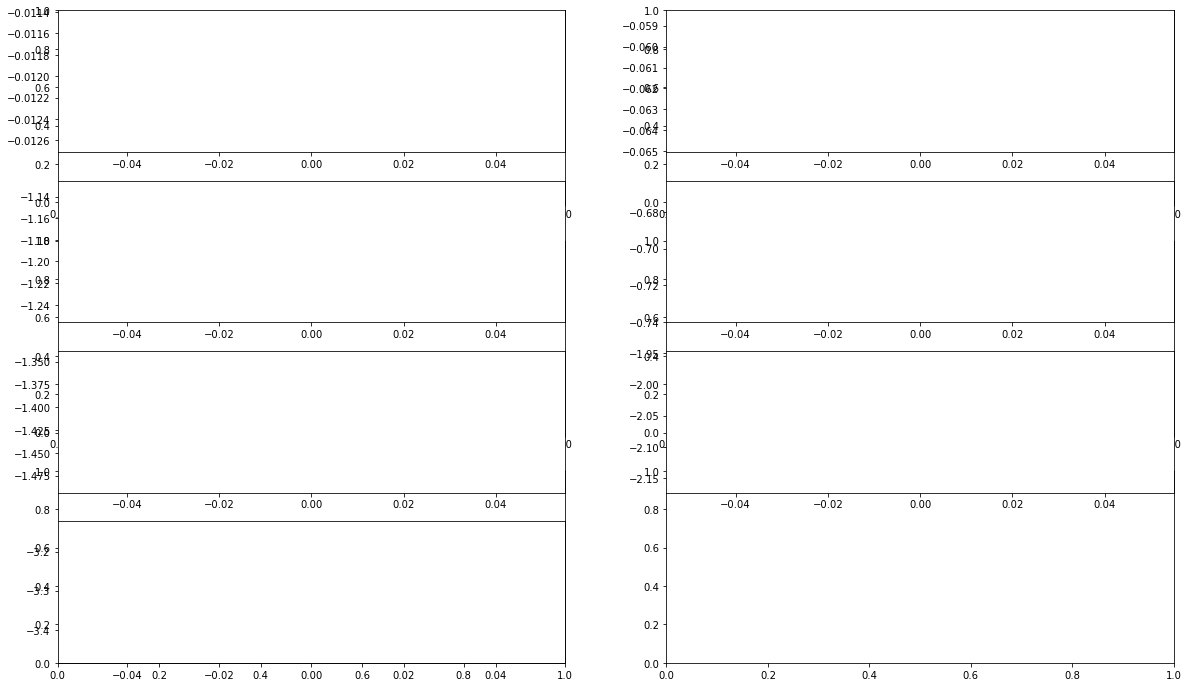

In [574]:
fig, axs=plt.subplots(3,2,figsize=(20,12))
feat=0
for i in range(0,features):
    fig.add_subplot(4,2,i+1)
    plt.plot(df_1_tensor[:,:,i].detach().numpy())

In [35]:
##really important to understand High dimensionality
#list actually overcomplicated it, directly used z on top
print(l)
print(l[0].dtype)
print(l[0])
print(l[0][0])
print(l[0][0][1])


NameError: name 'l' is not defined

In [255]:
bottleneck_mean=model(train_tensor)
print(bottleneck_mean[0][1])
print(bottleneck_mean[0][2])
print(bottleneck_mean.names)
print("Mean",bottleneck_mean[:,0,:])
print("Variance",bottleneck_mean[:,4095,:])

tensor([-0.0276, -0.0186,  0.0936, -0.1690,  0.1912, -0.0704, -0.2337,  0.1290,
         0.1438, -0.0458, -0.0356,  0.0442,  0.0015, -0.1157],
       grad_fn=<SelectBackward>)
tensor([-0.0273, -0.0185,  0.0940, -0.1688,  0.1913, -0.0700, -0.2336,  0.1289,
         0.1441, -0.0455, -0.0353,  0.0437,  0.0014, -0.1156],
       grad_fn=<SelectBackward>)
(None, None, None)
Mean tensor([[-0.0275, -0.0187,  0.0939, -0.1688,  0.1914, -0.0702, -0.2337,  0.1289,
          0.1439, -0.0456, -0.0355,  0.0440,  0.0016, -0.1157]],
       grad_fn=<SliceBackward>)
Variance tensor([[ 0.0033, -0.0168,  0.0801, -0.1584,  0.1670, -0.0886, -0.2380,  0.1754,
          0.1718, -0.0418, -0.0440,  0.0560,  0.0481, -0.1019]],
       grad_fn=<SliceBackward>)


In [34]:
for i in train_tensor:
    print(i)
    print(i.dtype)

tensor([[7.4550e-01, 6.3154e-01, 3.9015e-03,  ..., 8.9023e-05, 1.3142e-02,
         3.5996e-01],
        [7.5343e-01, 6.3009e-01, 3.9015e-03,  ..., 8.9023e-05, 1.0753e-02,
         3.5892e-01],
        [7.4447e-01, 6.3589e-01, 3.9015e-03,  ..., 8.9023e-05, 1.5532e-02,
         3.5788e-01],
        ...,
        [7.1033e-01, 6.3019e-01, 9.9997e-01,  ..., 8.6335e-01, 4.4206e-02,
         6.5050e-01],
        [7.0714e-01, 6.3012e-01, 9.9997e-01,  ..., 8.6335e-01, 4.3011e-02,
         6.4583e-01],
        [7.0482e-01, 6.3295e-01, 1.0000e+00,  ..., 8.6335e-01, 3.9427e-02,
         6.4536e-01]])
torch.float32


In [100]:
model.parameters

<bound method Module.parameters of Test(
  (encoder): ModuleDict(
    (Linear): Linear(in_features=16, out_features=14, bias=True)
    (Lstm): LSTM(7, 16)
  )
  (decoder): ModuleDict(
    (Linear): Linear(in_features=32, out_features=7, bias=True)
    (Lstm): LSTM(7, 32)
  )
)>

In [148]:
print(z[0][1][2])

tensor(0.0936, grad_fn=<SelectBackward>)


# Entire bottleneck process for a VAE

In [347]:
#Bottleneck, mean, std and sampling of the VAE with random Tensors of length 14
mu=torch.randn(7)
logvar=torch.randn(7)
print("mean",mu)
print("logvar",logvar)
stan_dev=logvar.mul(0.5).exp_()
eps = stan_dev.data.new(stan_dev.size()).normal_()
print("std.deviation",stan_dev,"\nepsillon",eps)
sum=mu+eps*stan_dev
print("Sample pulled out of distribution",sum)

mean tensor([ 1.9738, -0.3994, -0.6998, -0.1716, -2.1173,  0.9715,  0.1703])
logvar tensor([-0.3228, -0.0289, -0.3645, -2.1334,  0.5896,  1.9579,  0.5470])
std.deviation tensor([0.8509, 0.9857, 0.8334, 0.3441, 1.3428, 2.6616, 1.3145]) 
epsillon tensor([-0.3892, -1.9107, -0.4698, -0.6540,  0.5055,  1.0373,  0.5472])
Sample pulled out of distribution tensor([ 1.6426, -2.2828, -1.0914, -0.3966, -1.4384,  3.7325,  0.8896])


In [267]:
pop=torch.randn(5)
print(pop)
stan_dev=pop.exponential_()
print(stan_dev)

tensor([ 0.7745, -0.7294, -0.6278, -0.4570, -0.8289])
tensor([0.2581, 0.1500, 1.5715, 1.9526, 0.6016])


# Negative log likelihood

In [380]:
y=torch.randn([5,7])
y_pred=torch.ones([5,7])
def loss_function(y_pred, y):
    NLL_fun=nn.functional.nll_loss(y_pred,y)
    NLL=nn.NLLLoss(y_pred,y)
    return NLL_fun,NLL
NLL_fun, NLL=loss_function(y_pred,y)
print(NLL_fun)
print(NLL)
# x_hat=torch.randn(5)
# print("x",x,"\nx_hat",x_hat)
# loss=nn.functional.nll_loss()
#print(x+torch.tensor([1,1,1,1,1]))----actually works

RuntimeError: 1D target tensor expected, multi-target not supported

In [1049]:
x=torch.normal(torch.arange(0.1,5), torch.arange(.5,5))
print(x)

tensor([ 0.1435,  1.9455,  2.1788, -1.7878,  2.4764])


In [1015]:
pop=torch.Size([22])

In [1016]:
print(pop)

torch.Size([22])


In [281]:
target = torch.tensor([[1,0,4],[3,2,1]])
print(target,target.shape)

tensor([[1, 0, 4],
        [3, 2, 1]]) torch.Size([2, 3])


In [399]:
print(train_tensor)
print(train_tensor[0][0])###onlly use this at the moment for loss funtion

tensor([[[7.4550e-01, 6.3154e-01, 3.9015e-03,  ..., 8.9023e-05,
          1.3142e-02, 3.5996e-01],
         [7.5343e-01, 6.3009e-01, 3.9015e-03,  ..., 8.9023e-05,
          1.0753e-02, 3.5892e-01],
         [7.4447e-01, 6.3589e-01, 3.9015e-03,  ..., 8.9023e-05,
          1.5532e-02, 3.5788e-01],
         ...,
         [7.1033e-01, 6.3019e-01, 9.9997e-01,  ..., 8.6335e-01,
          4.4206e-02, 6.5050e-01],
         [7.0714e-01, 6.3012e-01, 9.9997e-01,  ..., 8.6335e-01,
          4.3011e-02, 6.4583e-01],
         [7.0482e-01, 6.3295e-01, 1.0000e+00,  ..., 8.6335e-01,
          3.9427e-02, 6.4536e-01]]])
tensor([7.4550e-01, 6.3154e-01, 3.9015e-03, 2.1157e-01, 8.9023e-05, 1.3142e-02,
        3.5996e-01])
tensor([7.5343e-01, 6.3009e-01, 3.9015e-03, 2.1537e-01, 8.9023e-05, 1.0753e-02,
        3.5892e-01])


In [1120]:
x=torch.normal(torch.tensor(0.),torch.tensor(1))
print(x)

tensor(1.7876)


In [1121]:
z=torch.tensor(0.2)**torch.tensor(2)
print(z)

tensor(0.0400)


In [1123]:
print(x.detach())

tensor(1.7876)


In [584]:
mean=torch.arange(.1, 20)
print(mean)

tensor([ 0.1000,  1.1000,  2.1000,  3.1000,  4.1000,  5.1000,  6.1000,  7.1000,
         8.1000,  9.1000, 10.1000, 11.1000, 12.1000, 13.1000, 14.1000, 15.1000,
        16.1000, 17.1000, 18.1000, 19.1000])


In [625]:
m = nn.Sigmoid()
#input = torch.randn(2, 3)
print(input)
output = m(input)
print(output)

tensor([[ 0.7653,  1.0187,  0.1215],
        [ 1.7187,  1.0850, -0.1006]])
tensor([[0.6825, 0.7347, 0.5303],
        [0.8480, 0.7474, 0.4749]])


In [685]:
l=dict(mew=list(), dob=list())
s=1
l.update([12,'dasd'])

TypeError: cannot convert dictionary update sequence element #0 to a sequence

# Old approach to try and tackle 2)

In [ ]:

#         mu2,mu1=[],[]
#         logvar1,logvar2=[],[]
#         for j in range(0, x.shape[0]):
#             if(j==0):
#                 x=x.reshape((1, 1, self.n_features))# batch sends the whole things, not using SGD,
#                 x,_=self.encoder['Lstm'](x)
#                 mu_logvar=self.encoder['Linear'](x)
#                 #a leap of faith, for knowing how mu is [:0:] and logvar[:1:], actually just a bunch of the outputs 
#                 #taken as mean and variance
#                 mu1=mu_logvar[:, :, 0:self.bot_nodes]# dimension at mu_logvar1/bottleneck               
#                 logvar1 = mu_logvar[:,:, self.bot_nodes:self.bot_nodes*2]
#                 z=self.getsample(mu1,logvar1)#need to feed this to the decoder, not used actually
#                 #reshape it into (hidden_dim x features)
#         #        z=z.reshape((1, length, self.n_features)) #dont need the reshape anymore
#         #        z=z+torch.randn([1,2,7]) #added some noise in decoder to try and train with some noise
#                 d,_=self.decoder['Lstm'](z)
#         #        d=torch.sum(d+self.x1_cap)
#         #         #z=z.reshape((1, self,self.var*2))
#                 m = nn.Dropout(p=0.2)
#                 d=m(d)
#                 d=self.decoder['Linear'](d)
#                 mu2=mu2.append(d[:,:,0:self.n_features])
#                 logvar2=logvar2.append(d[:,:,self.n_features:self.n_features*2])
#             else:
#                 x=x.reshape((1, 1, self.n_features))# batch sends the whole things, not using SGD,
#                 x,_=self.encoder['Lstm'](x)
#                 mu_logvar=self.encoder['Linear'](x)
#                 #a leap of faith, for knowing how mu is [:0:] and logvar[:1:], actually just a bunch of the outputs 
#                 #taken as mean and variance
#                 mu1=mu_logvar[:, :, 0:self.bot_nodes]# dimension at mu_logvar1/bottleneck               
#                 logvar1 = mu_logvar[:,:, self.bot_nodes:self.bot_nodes*2]
#                 z=self.getsample(mu1,logvar1)#need to feed this to the decoder, not used actually
#                 #reshape it into (hidden_dim x features)
#         #        z=z.reshape((1, length, self.n_features)) #dont need the reshape anymore
#         #        z=z+torch.randn([1,2,7]) #added some noise in decoder to try and train with some noise
#                 d,_=self.decoder['Lstm'](z)
#         #        d=torch.sum(d+self.x1_cap)
#         #         #z=z.reshape((1, self,self.var*2))
#                 m = nn.Dropout(p=0.2)
#                 d=m(d)
#                 d=self.decoder['Linear'](d)
#                 mu2=torch.stack(mu2,d[:,:,0:self.n_features])
#                 logvar2=d[:,:,self.n_features:self.n_features*2]
                
                
                
        
# #         self.x1_cap=self.getsample(mu2.detach(),logvar2.detach())
# #         print("x1_cap",self.x1_cap)
#         return mu2,logvar2,mu1,logvar1#dhi,self.x1_cap,sample
# #mu2,logvar2,mu1,logvar1
# #if problem
# #1) Put relu b/w LSTM and linear---actually didnt need this'''

In [358]:
x=np.array([0,1,2])
#print(x)
dataset=[torch.tensor(s, dtype=torch.float32) for s in x]
dataset[1].mul(dataset[2]).add(dataset[2])
#print(dataset)
#converted numpies to tensors

tensor(4.)

In [ ]:
#actually quite flawed cz its time series and time series data has to be in sequence
''''for f in range(1,4):
    string=f'df_{f}'
    print(string)
    string=pd.DataFrame()
    string=pd.read_csv(f'Datasets/Rapid Component degradation Vega/NewBlade00{f}.csv')
    print(string)
#    exec(string%pd.read_csv(f'Datasets/Rapid Component degradation Vega/NewBlade00{f}.csv'))
#tried automation but time series so cant compile together from what I understand
''for f in range(1,4):
    if(f==1):
        df_ano=pd.read_csv(f'Datasets/Rapid Component degradation Vega/WornBlade00{f}.csv')
    else:
        df1=pd.read_csv(f'Datasets/Rapid Component degradation Vega/WornBlade00{f}.csv')
        df_ano=df_ano.append(df1)''''''

In [ ]:
#variable to control the no. of nodes
##oldest VAE model without LSTM, but made less sense cz no time dependencies
d=20
class VAE(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.encoder=nn.Sequential(
            nn.Linear(7,d**2),
            nn.ReLU(),
            nn.Linear(d**2,d*2)
        )
        
        self.decoder=nn.Sequential(
            nn.Linear(d,d**2),
            nn.ReLU(),
            nn.Linear(d**2,7),
            nn.ReLU()
        )
        
    def getsample(self, mu, logvar):
        if self.training: #inbuilt object which according to me is inherited from nn.Module
            stan_dev=logvar.mul(0.5).exp_()
            eps = stan_dev.data.new(stan_dev.size()).normal_() #sample that you pull out of the normal distribution i think
            return eps.mul(stan_dev).add_(mu)
        else:
            return mu
        
    def forward(self,x):
        length=x.shape[0]
        mu_logvar=self.encoder(x.view(-1,length)).view(-1,2,d)##i am considering each of the 7 features being sent
        #separate mean and variance
        mu=mu_logvar[:,0,:]
        logvar = mu_logvar[:,1,:]
        #get a sample out of the encoder to feed to the 
        z=self.getsample(mu, logvar)
        return self.decoder(z), mu, logvar
model=VAE()